In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import calendar

df=pd.read_csv('../Data/energydata_complete.csv',index_col='date',header=0)
df['datetime'] = df.index
df['datetime'] = pd.to_datetime(df['datetime'])
df['day_of_week']=df['datetime'].dt.strftime('%w').astype('int64')
df['month']=df['datetime'].dt.strftime('%m').astype('int64')
df['hour']=df['datetime'].dt.hour
df['day_number']=df['datetime'].dt.day
df['Week_no'] = df['datetime'].dt.strftime('%W').astype('int64')
df['min'] = df['datetime'].dt.minute
df['day_of_week']=df['day_of_week'].apply(str)
df['hour']=df['hour'].apply(str)
df['min']=df['min'].apply(str)
df['period']=df[['day_of_week','hour','min']].apply(lambda x:''.join(x),axis=1)

phase = df.groupby(['date','month','day_of_week','hour','day_number','min','datetime','period']).mean()
phase["Total"]=phase["Appliances"] + phase["lights"]
phase = phase.reset_index()
phase.set_index('date', inplace=True)
phase['day_of_week']=phase['day_of_week'].apply(int)
phase['hour']=phase['hour'].apply(int)
phase['min']=phase['min'].apply(int)
phase['period']=phase['period'].apply(int)

In [2]:
phase

,month,day_of_week,hour,day_number,min,datetime,period,Appliances,lights,T1,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Week_no,Total
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,1,1,17,11,0,2016-01-11 17:00:00,1170,60,30,19.890000,...,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,2,90
2016-01-11 17:10:00,1,1,17,11,10,2016-01-11 17:10:00,11710,60,30,19.890000,...,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,2,90
2016-01-11 17:20:00,1,1,17,11,20,2016-01-11 17:20:00,11720,50,30,19.890000,...,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,2,80
2016-01-11 17:30:00,1,1,17,11,30,2016-01-11 17:30:00,11730,50,40,19.890000,...,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,2,90
2016-01-11 17:40:00,1,1,17,11,40,2016-01-11 17:40:00,11740,60,40,19.890000,...,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,2,100
2016-01-11 17:50:00,1,1,17,11,50,2016-01-11 17:50:00,11750,50,40,19.890000,...,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,2,90
2016-01-11 18:00:00,1,1,18,11,0,2016-01-11 18:00:00,1180,60,50,19.890000,...,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,2,110
2016-01-11 18:10:00,1,1,18,11,10,2016-01-11 18:10:00,11810,60,50,19.856667,...,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,2,110
2016-01-11 18:20:00,1,1,18,11,20,2016-01-11 18:20:00,11820,60,40,19.790000,...,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,2,100


/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


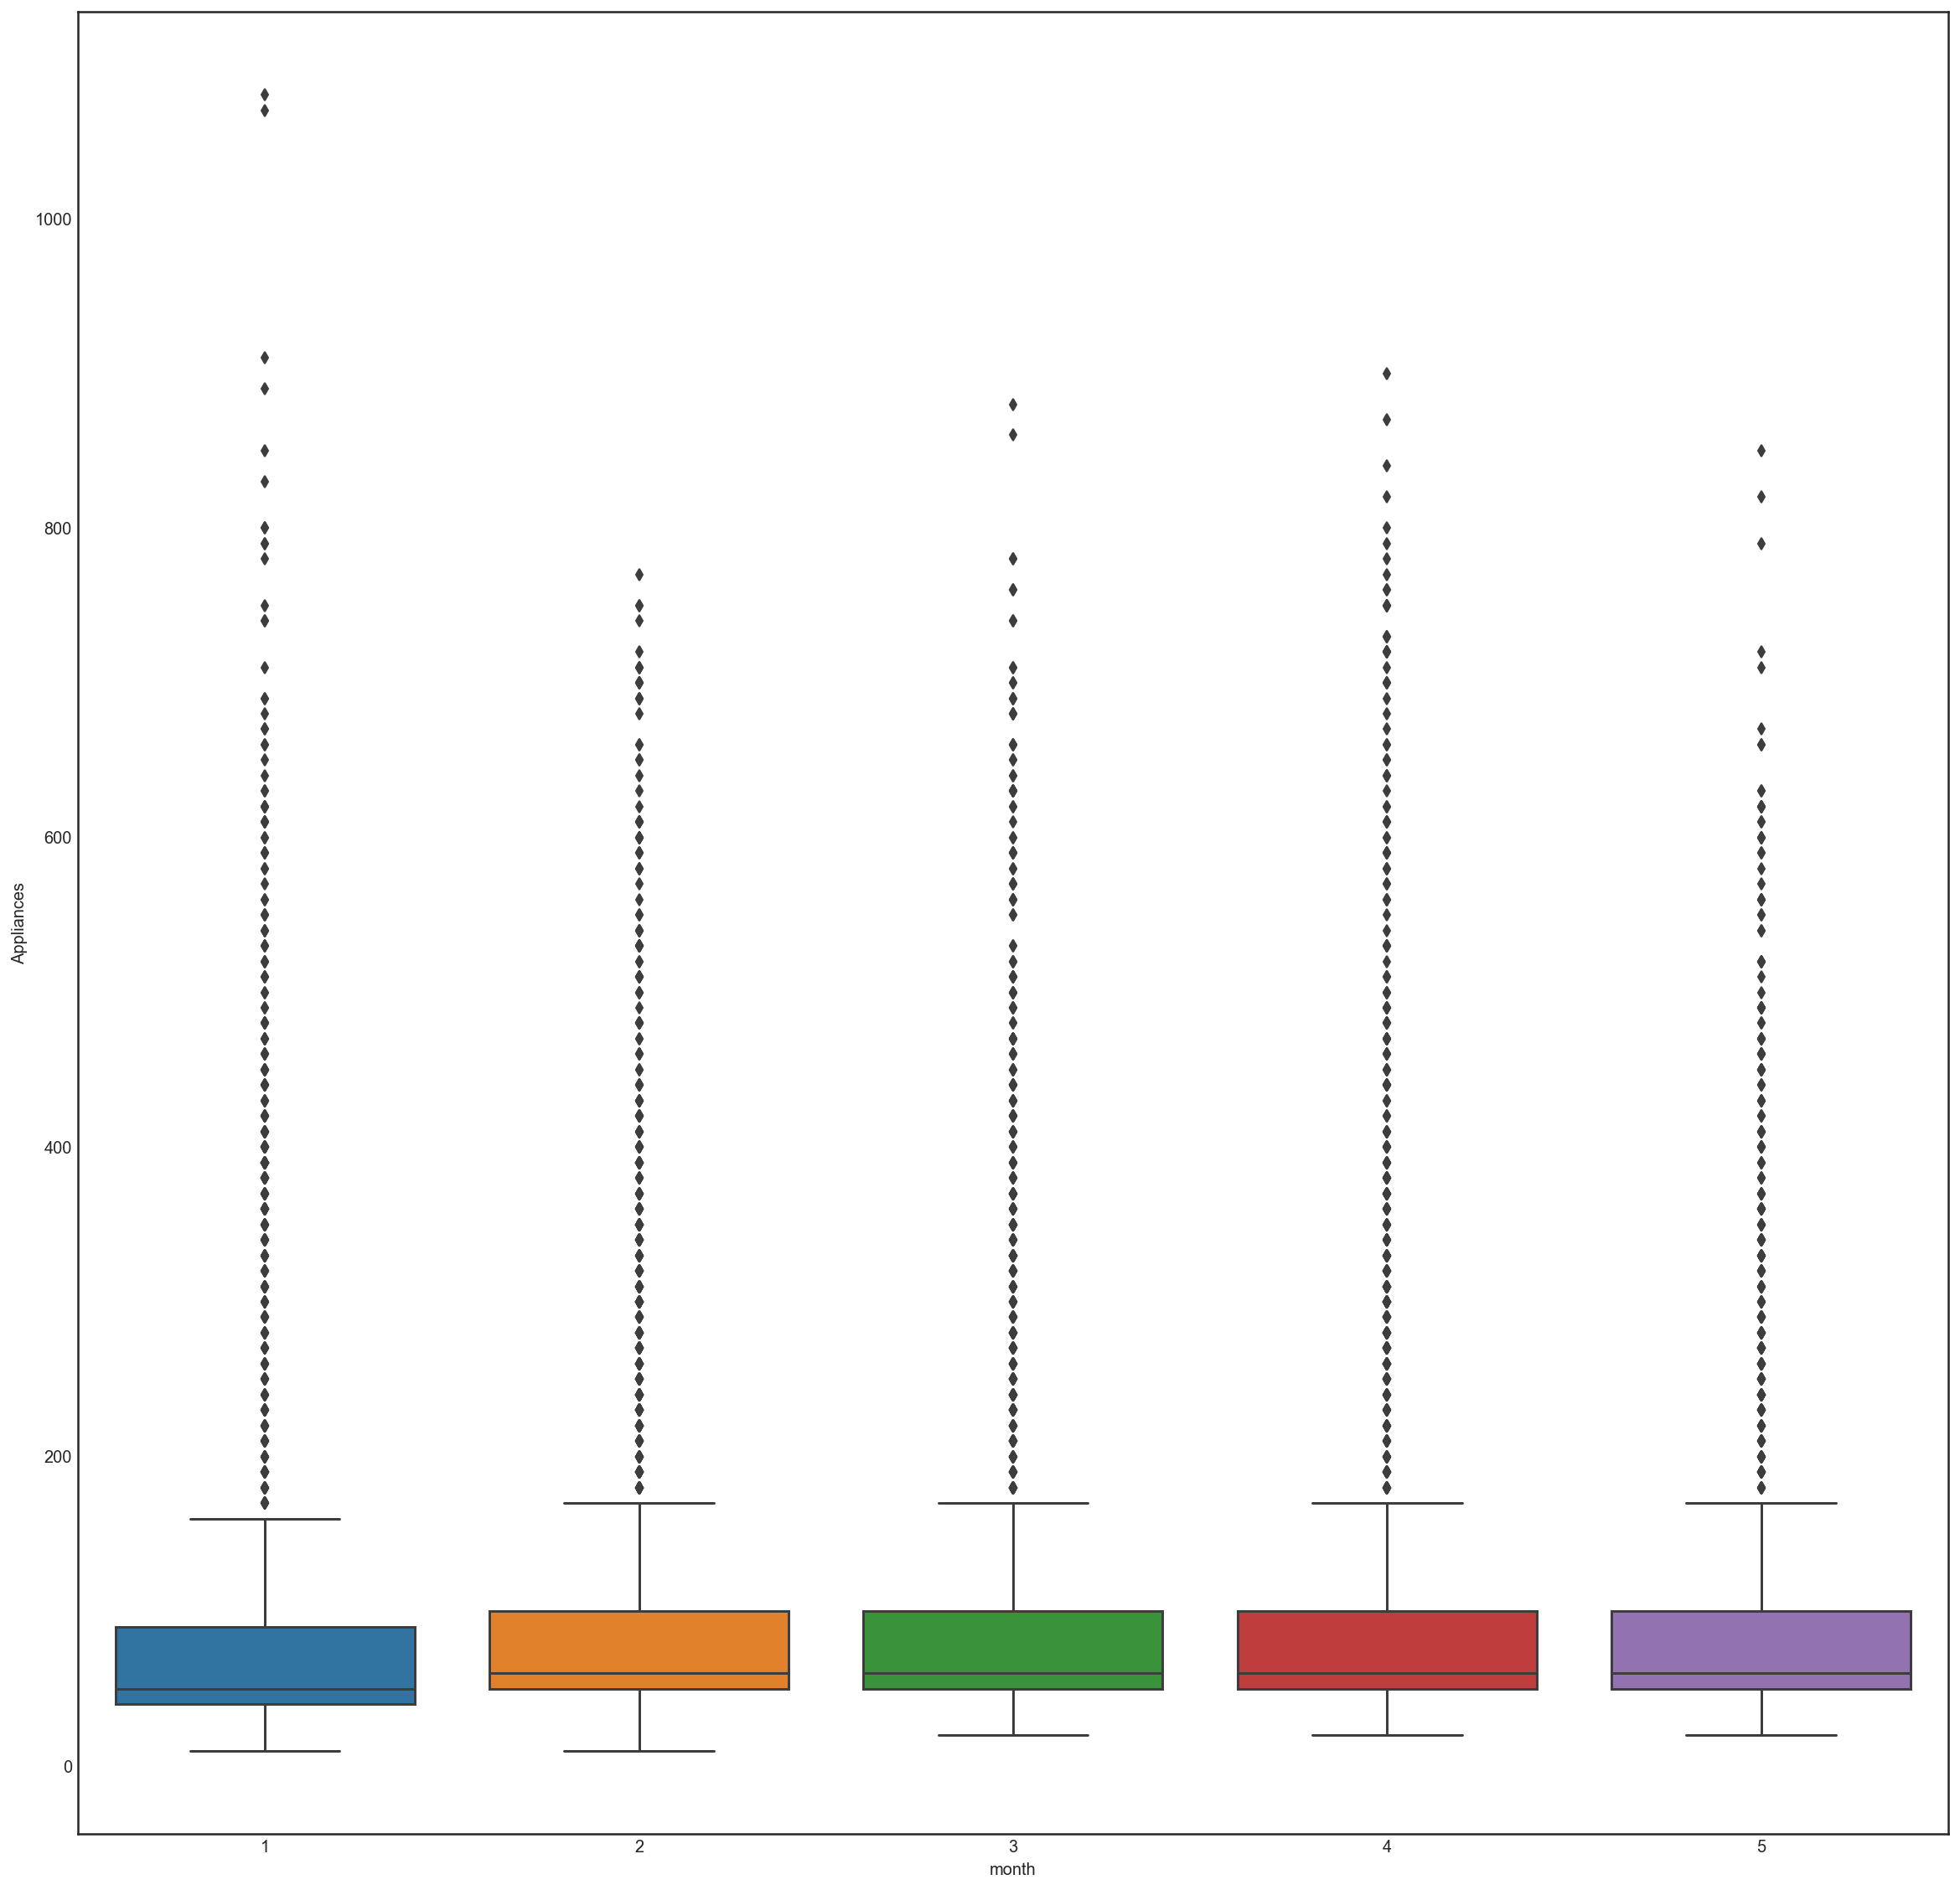

In [3]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax = sns.boxplot(x="month", y="Appliances", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


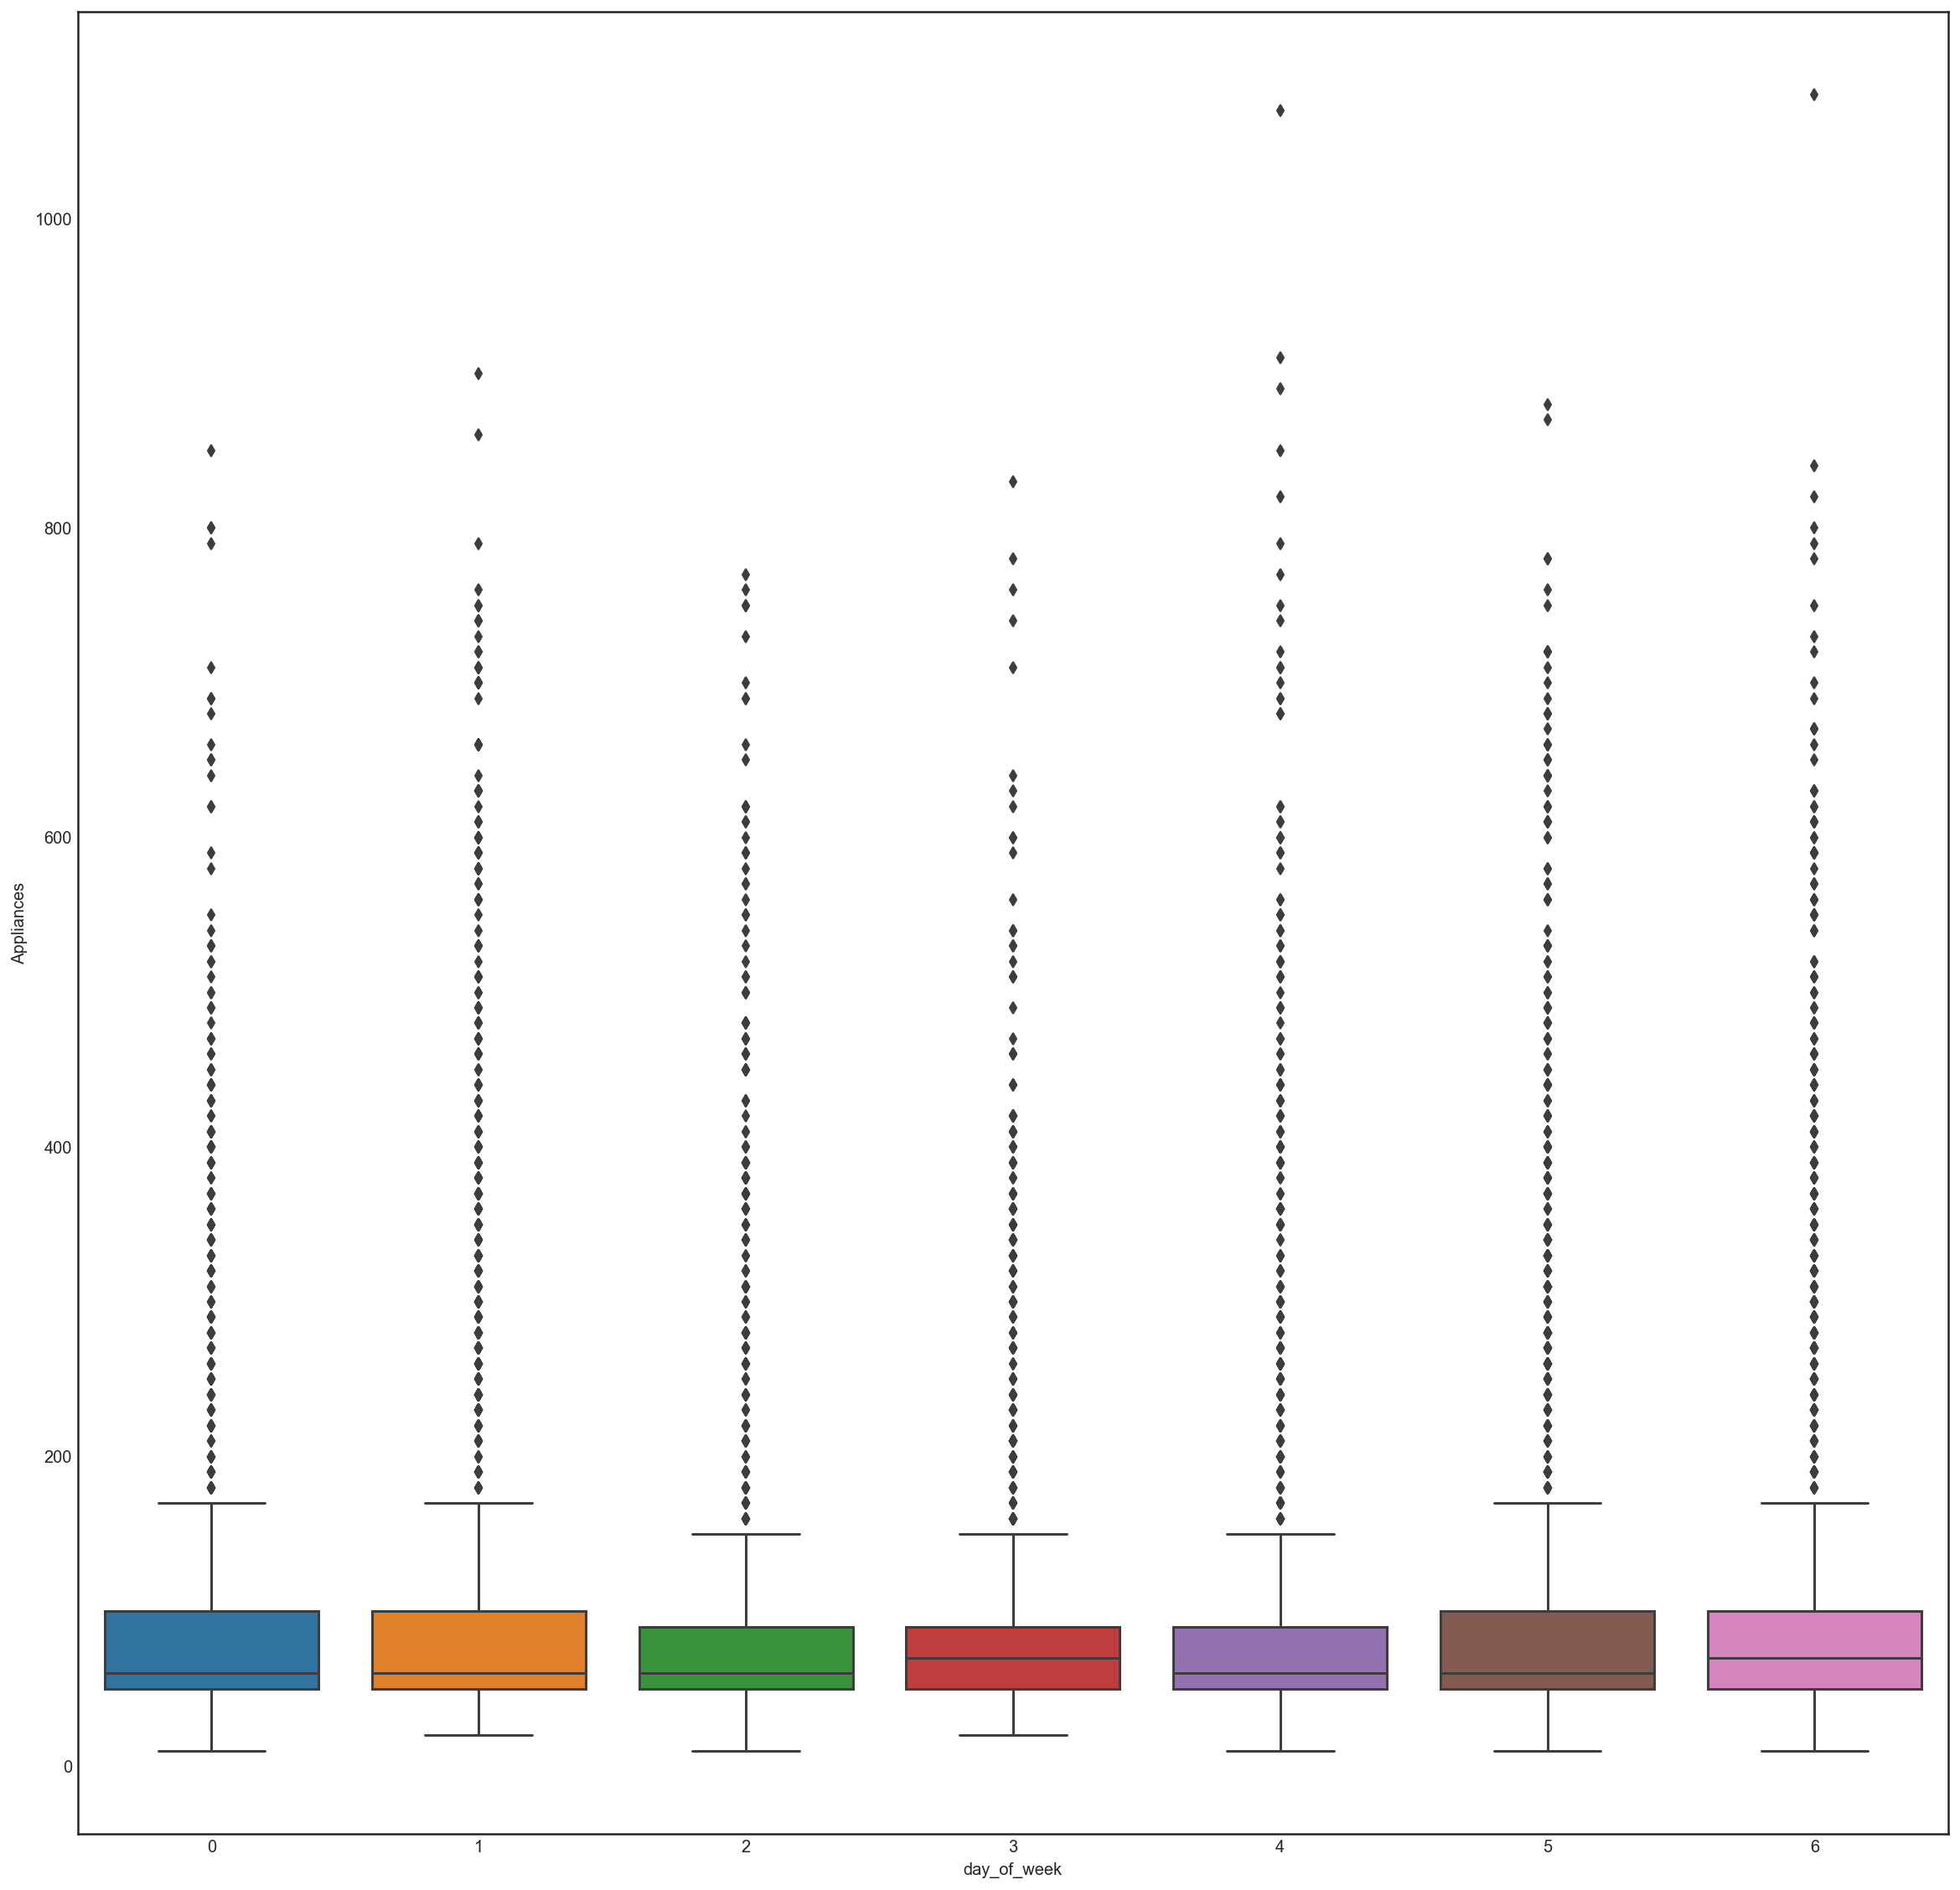

In [4]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax1 = sns.boxplot(x="day_of_week", y="Appliances", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


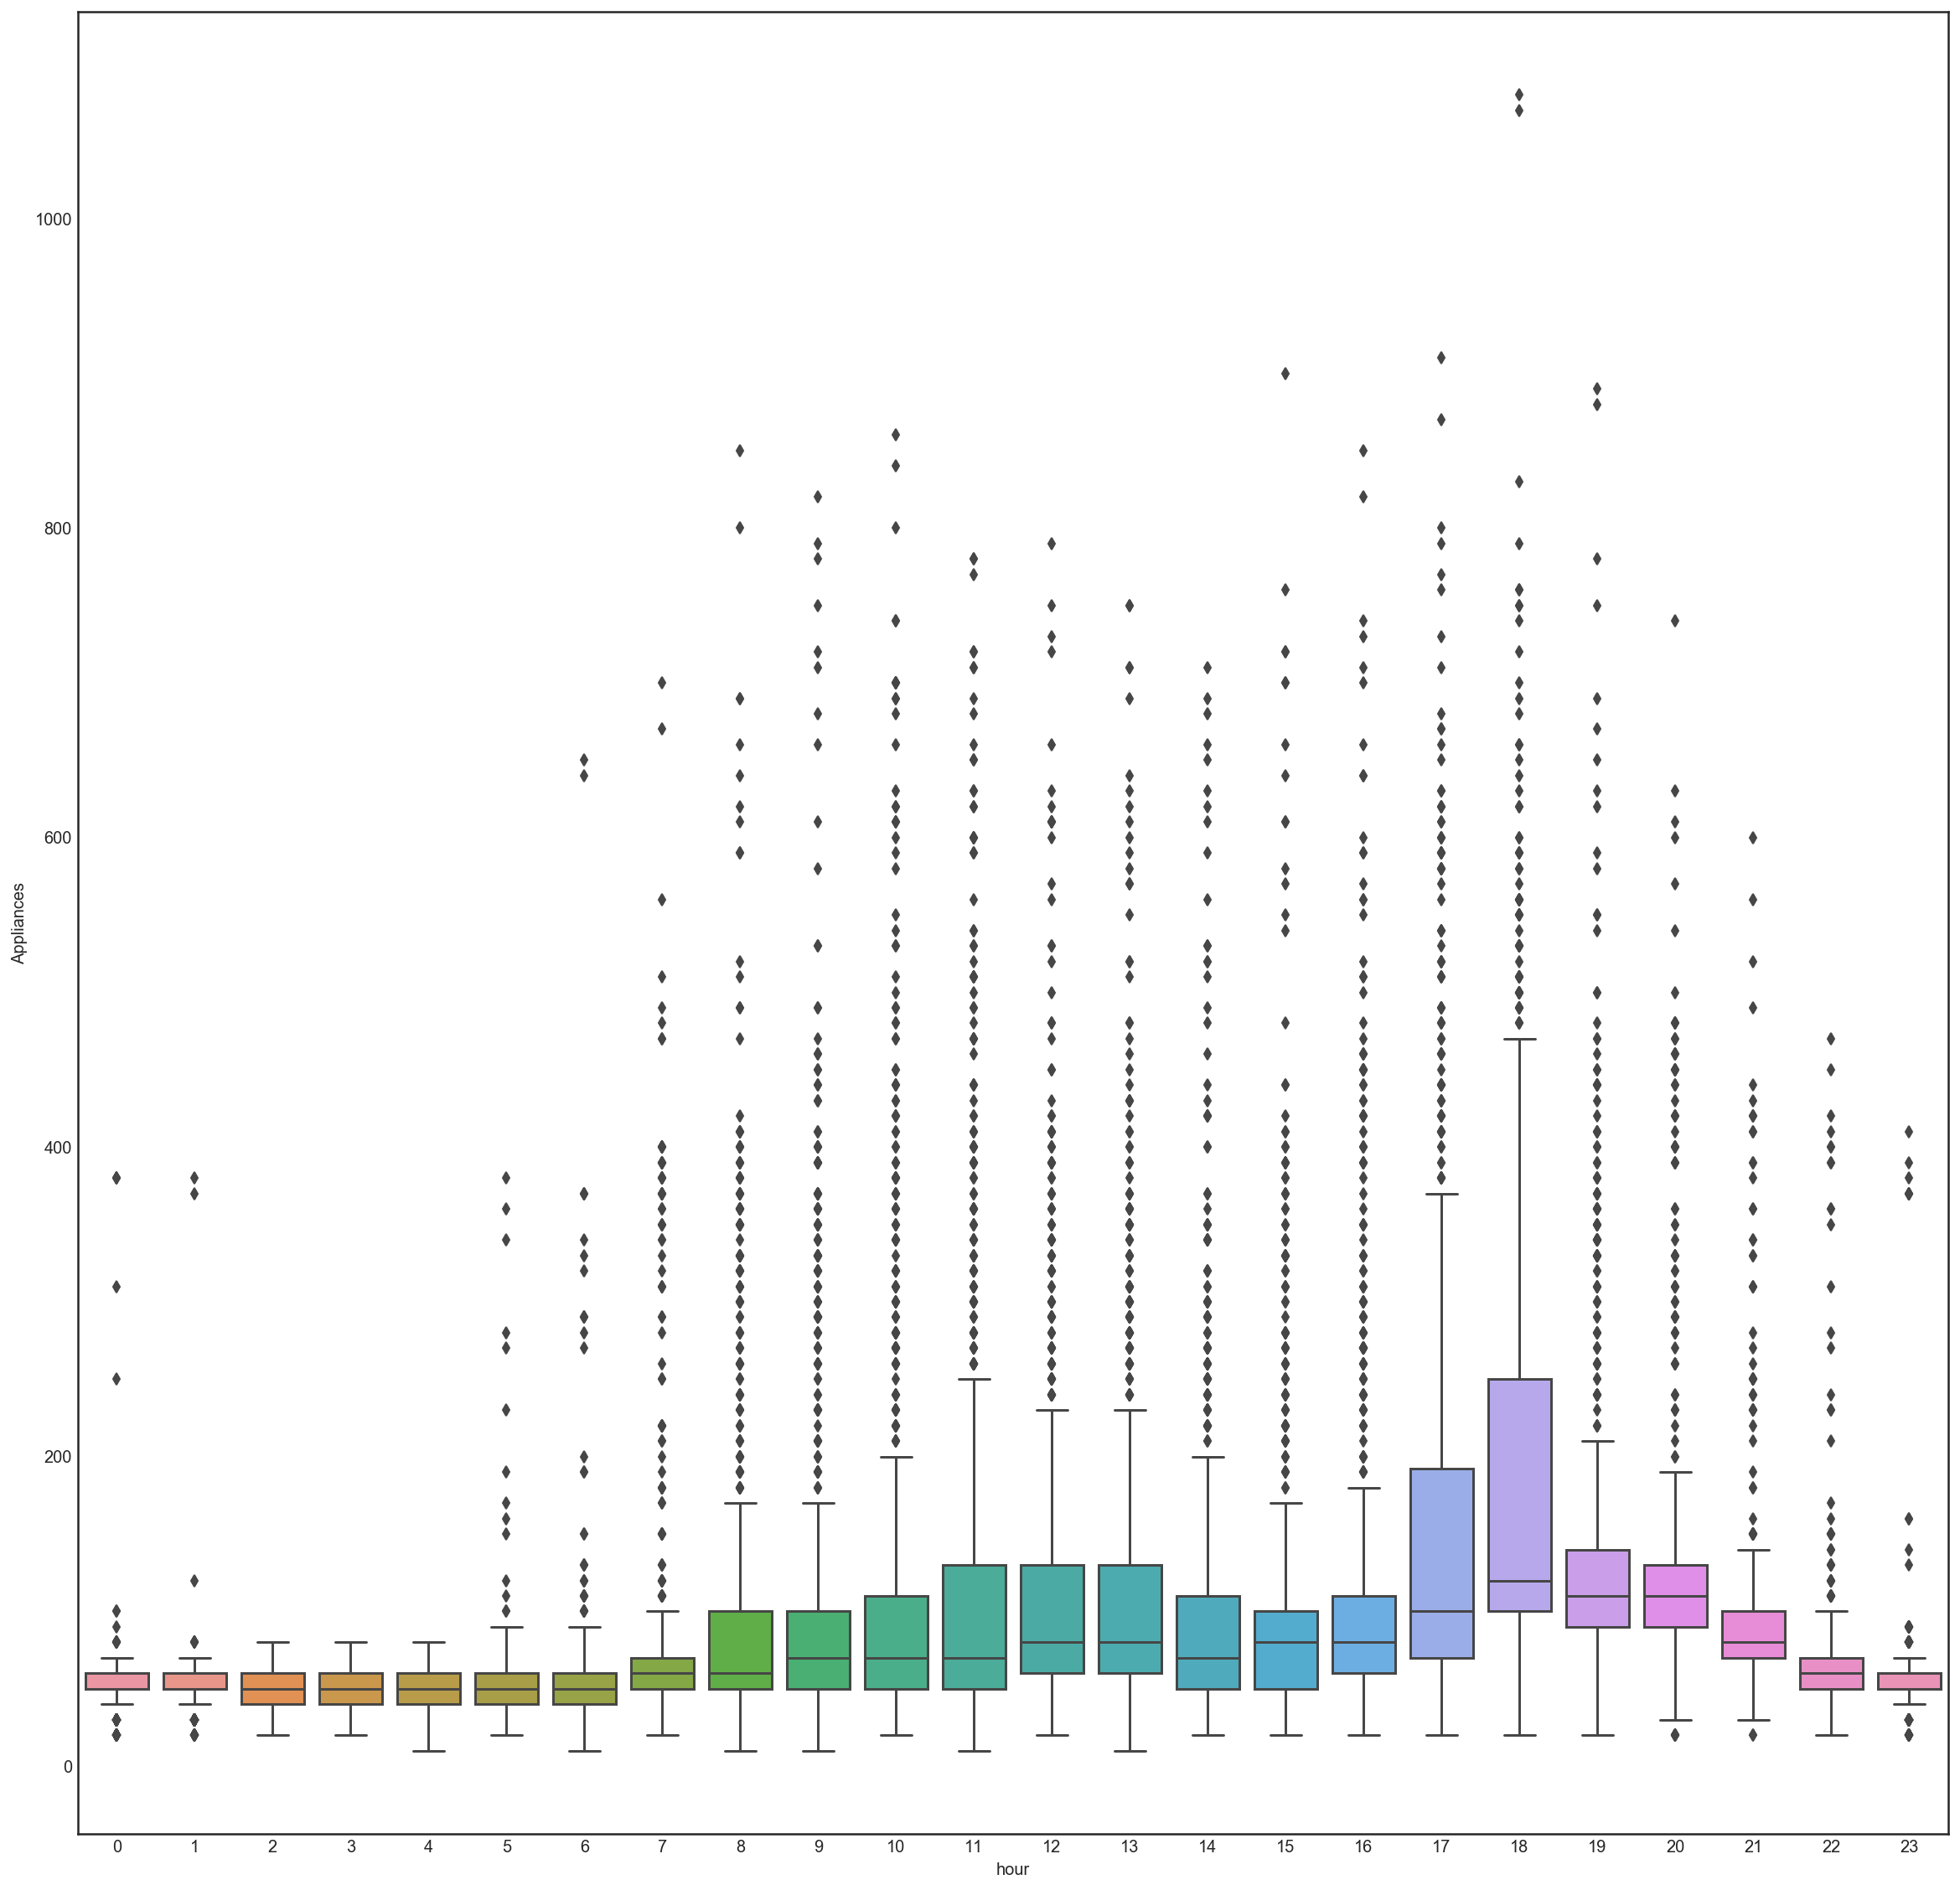

In [5]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax = sns.boxplot(x="hour", y="Appliances", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


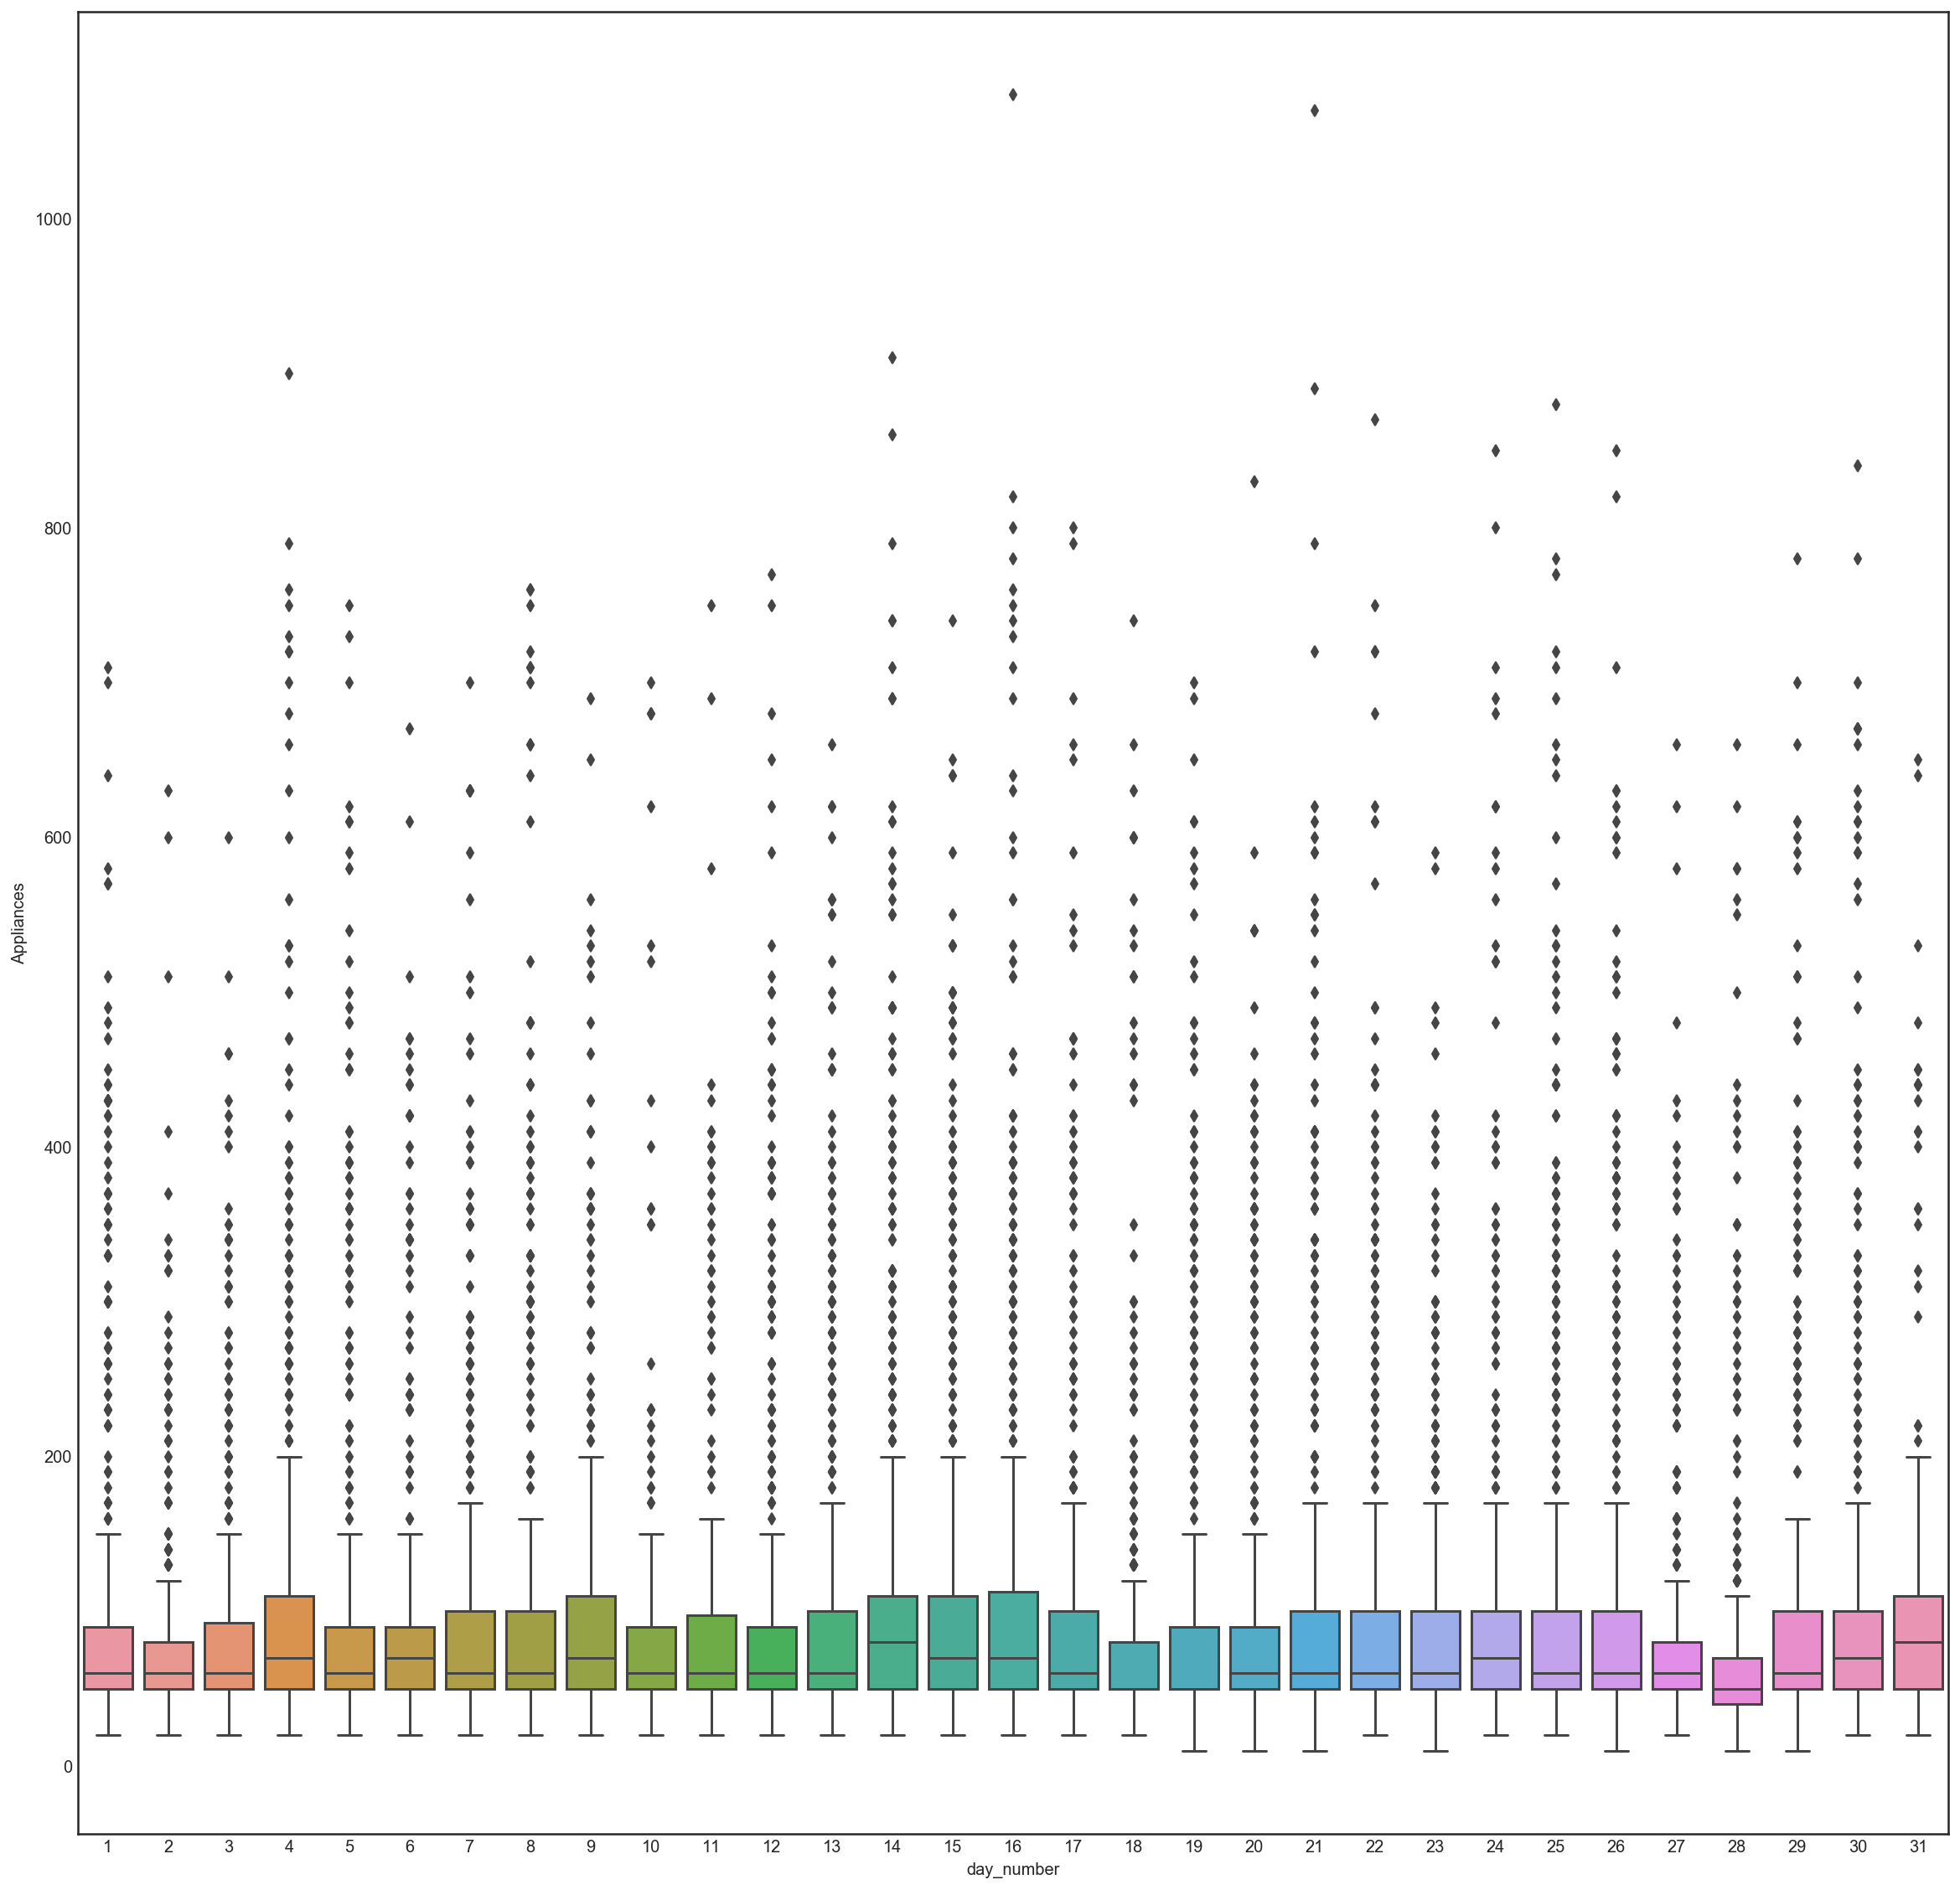

In [6]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax = sns.boxplot(x="day_number", y="Appliances", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


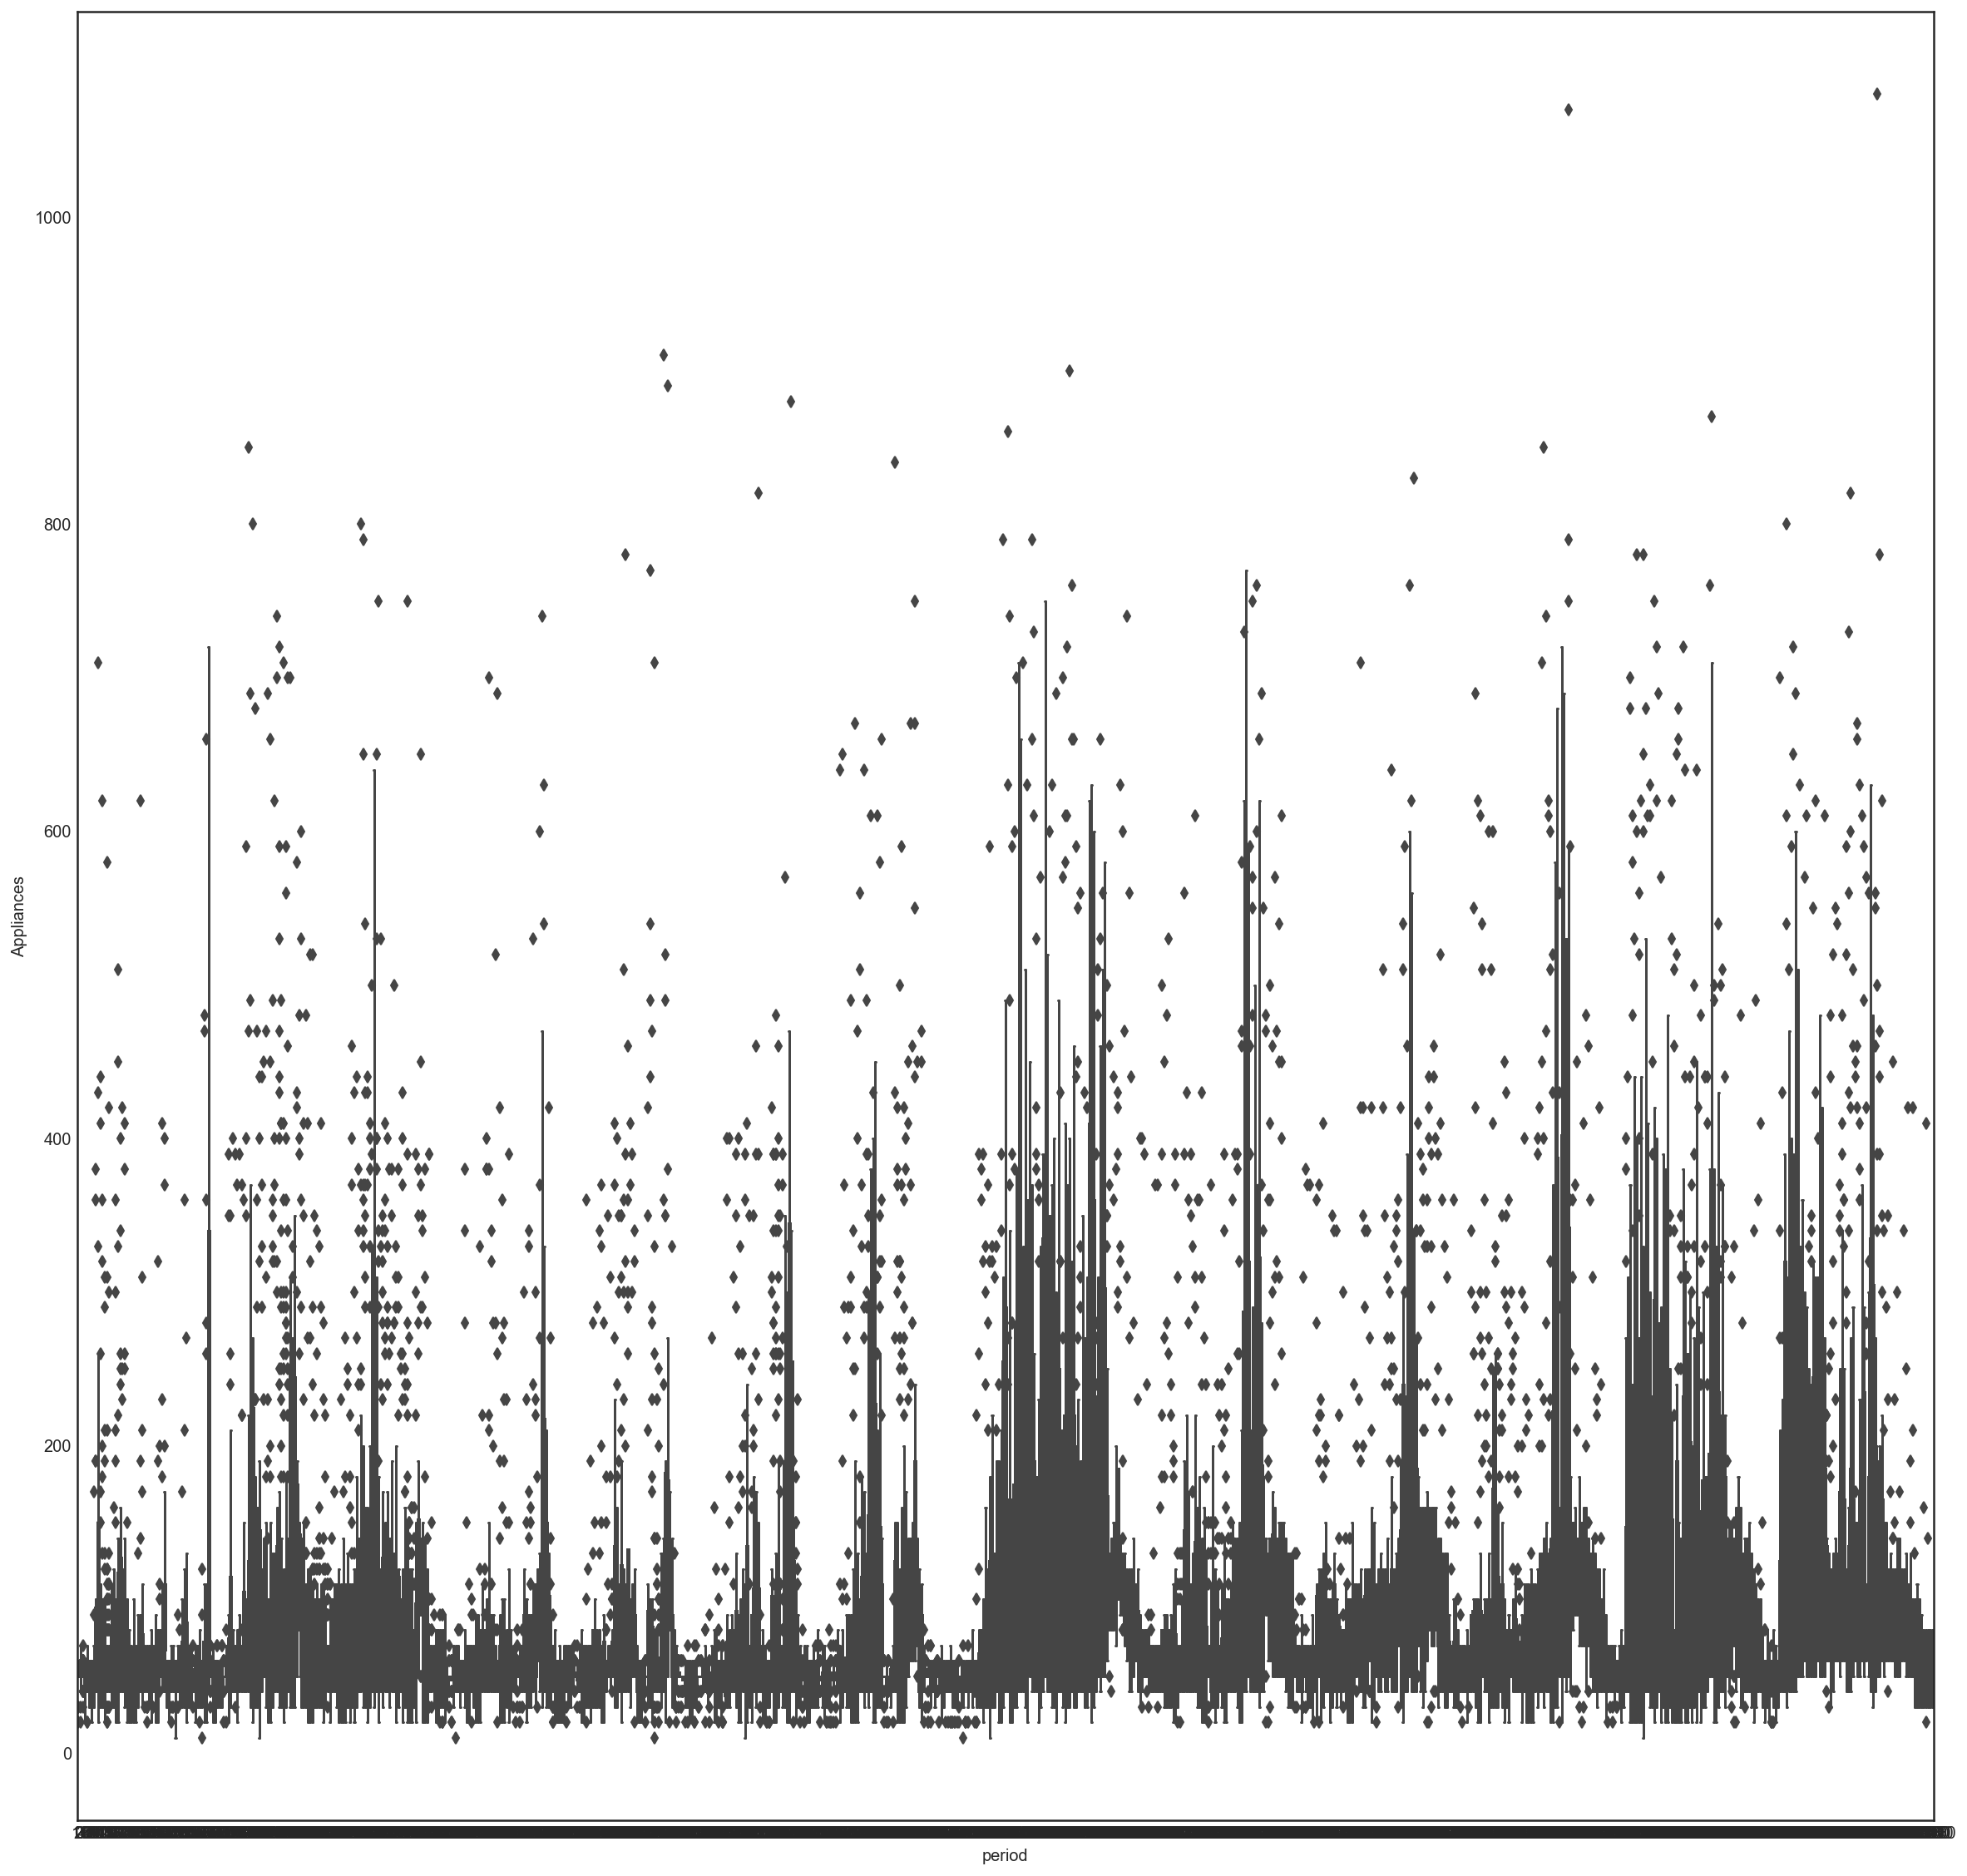

In [7]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax = sns.boxplot(x="period", y="Appliances", data=phase)

### Transformation

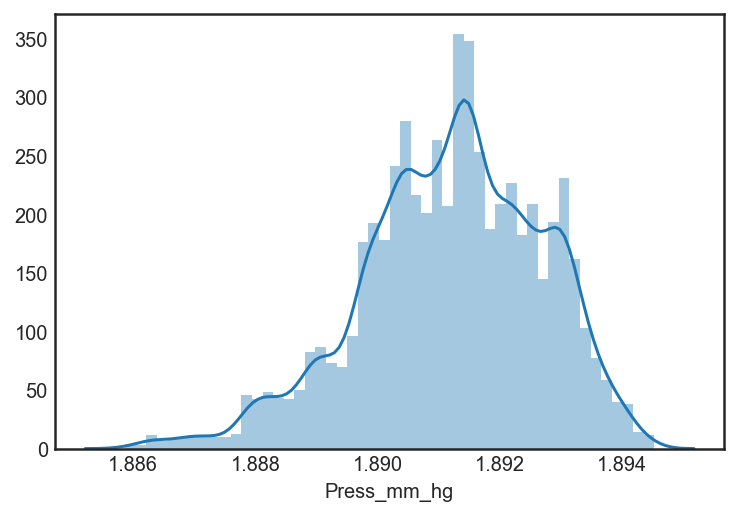

In [11]:
import numpy as np
phase['Press_mm_hg'] = np.log(phase['Press_mm_hg'])
sns.distplot(phase['Press_mm_hg'])

In [47]:
import numpy as np
phase['Visibility'] = np.log(phase['Visibility'])

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [48]:
phase.describe()

,month,day_of_week,hour,day_number,min,period,Appliances,lights,T1,RH_1,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Week_no,Total
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19530.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,3.101647,3.006790,11.502002,16.057411,24.998733,16952.790474,97.694958,3.801875,21.686571,40.259739,...,7.411665,1.891206,79.750418,4.039752,-1.450337,3.760707,24.988033,24.988033,11.393615,101.496833
std,1.339200,1.981713,6.921953,8.450998,17.079178,19971.418560,102.524891,7.935988,1.606066,3.979299,...,5.317409,0.001482,14.901088,2.451221,0.323414,4.194648,14.496634,14.496634,5.657985,104.380829
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,0.000000,16.790000,27.023333,...,-5.000000,1.885870,24.000000,0.000000,-5.448443,-6.600000,0.005322,0.005322,2.000000,10.000000
25%,2.000000,1.000000,6.000000,9.000000,10.000000,2050.000000,50.000000,0.000000,20.760000,37.333333,...,3.666667,1.890294,70.333333,2.000000,-1.639839,0.900000,12.497889,12.497889,6.000000,50.000000
50%,3.000000,3.000000,12.000000,16.000000,20.000000,5610.000000,60.000000,0.000000,21.600000,39.656667,...,6.916667,1.891329,83.666667,3.666667,-1.322567,3.433333,24.897653,24.897653,11.000000,60.000000
75%,4.000000,5.000000,17.000000,23.000000,40.000000,31540.000000,100.000000,0.000000,22.600000,43.066667,...,10.408333,1.892290,91.666667,5.500000,-1.322567,6.566667,37.583769,37.583769,16.000000,100.000000
max,5.000000,6.000000,23.000000,31.000000,50.000000,62350.000000,1080.000000,70.000000,26.260000,63.360000,...,26.100000,1.894523,100.000000,14.000000,-1.023031,15.500000,49.996530,49.996530,21.000000,1110.000000


## 1.3 Correlation Matrix

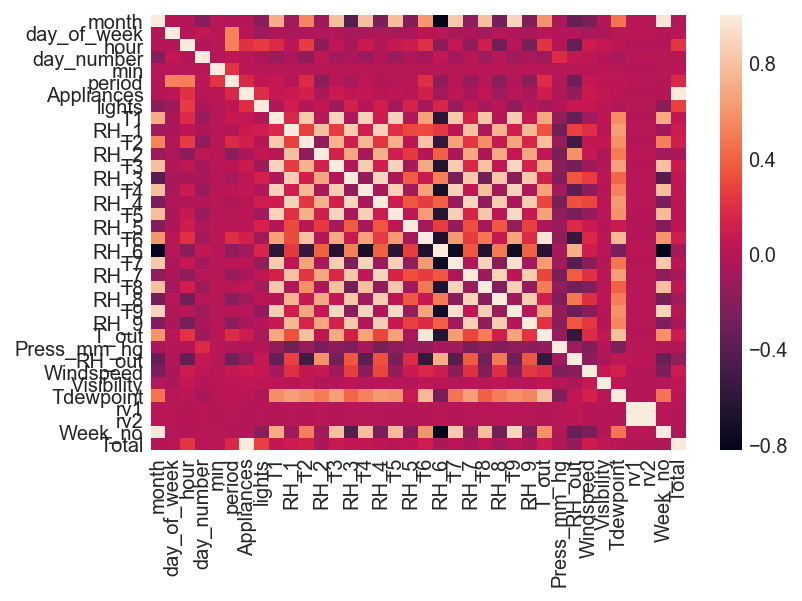

In [14]:
corr = phase.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [16]:
recent_corr = phase.corr().loc['Appliances'].drop(['Appliances','Total'])                                              

In [17]:
def conditional_bar(series, bar_colors=None, color_labels=None, figsize=(13,24),
                   xlabel=None, by=None, ylabel=None, title=None):
    fig, ax  = plt.subplots(figsize=figsize)
    if not bar_colors:
        bar_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color'][0]
    plt.barh(range(len(series)),series.values, color=bar_colors)
    plt.xlabel('' if not xlabel else xlabel);
    plt.ylabel('' if not ylabel else ylabel)
    plt.yticks(range(len(series)), series.index.tolist())
    plt.title('' if not title else title);
    plt.ylim([-1,len(series)]);
    if color_labels:
        for col, lab in color_labels.items():
            plt.plot([], linestyle='',marker='s',c=col, label= lab);
        lines, labels = ax.get_legend_handles_labels();
        ax.legend(lines[-len(color_labels.keys()):], labels[-len(color_labels.keys()):], loc='upper right');
    plt.close()
    return fig

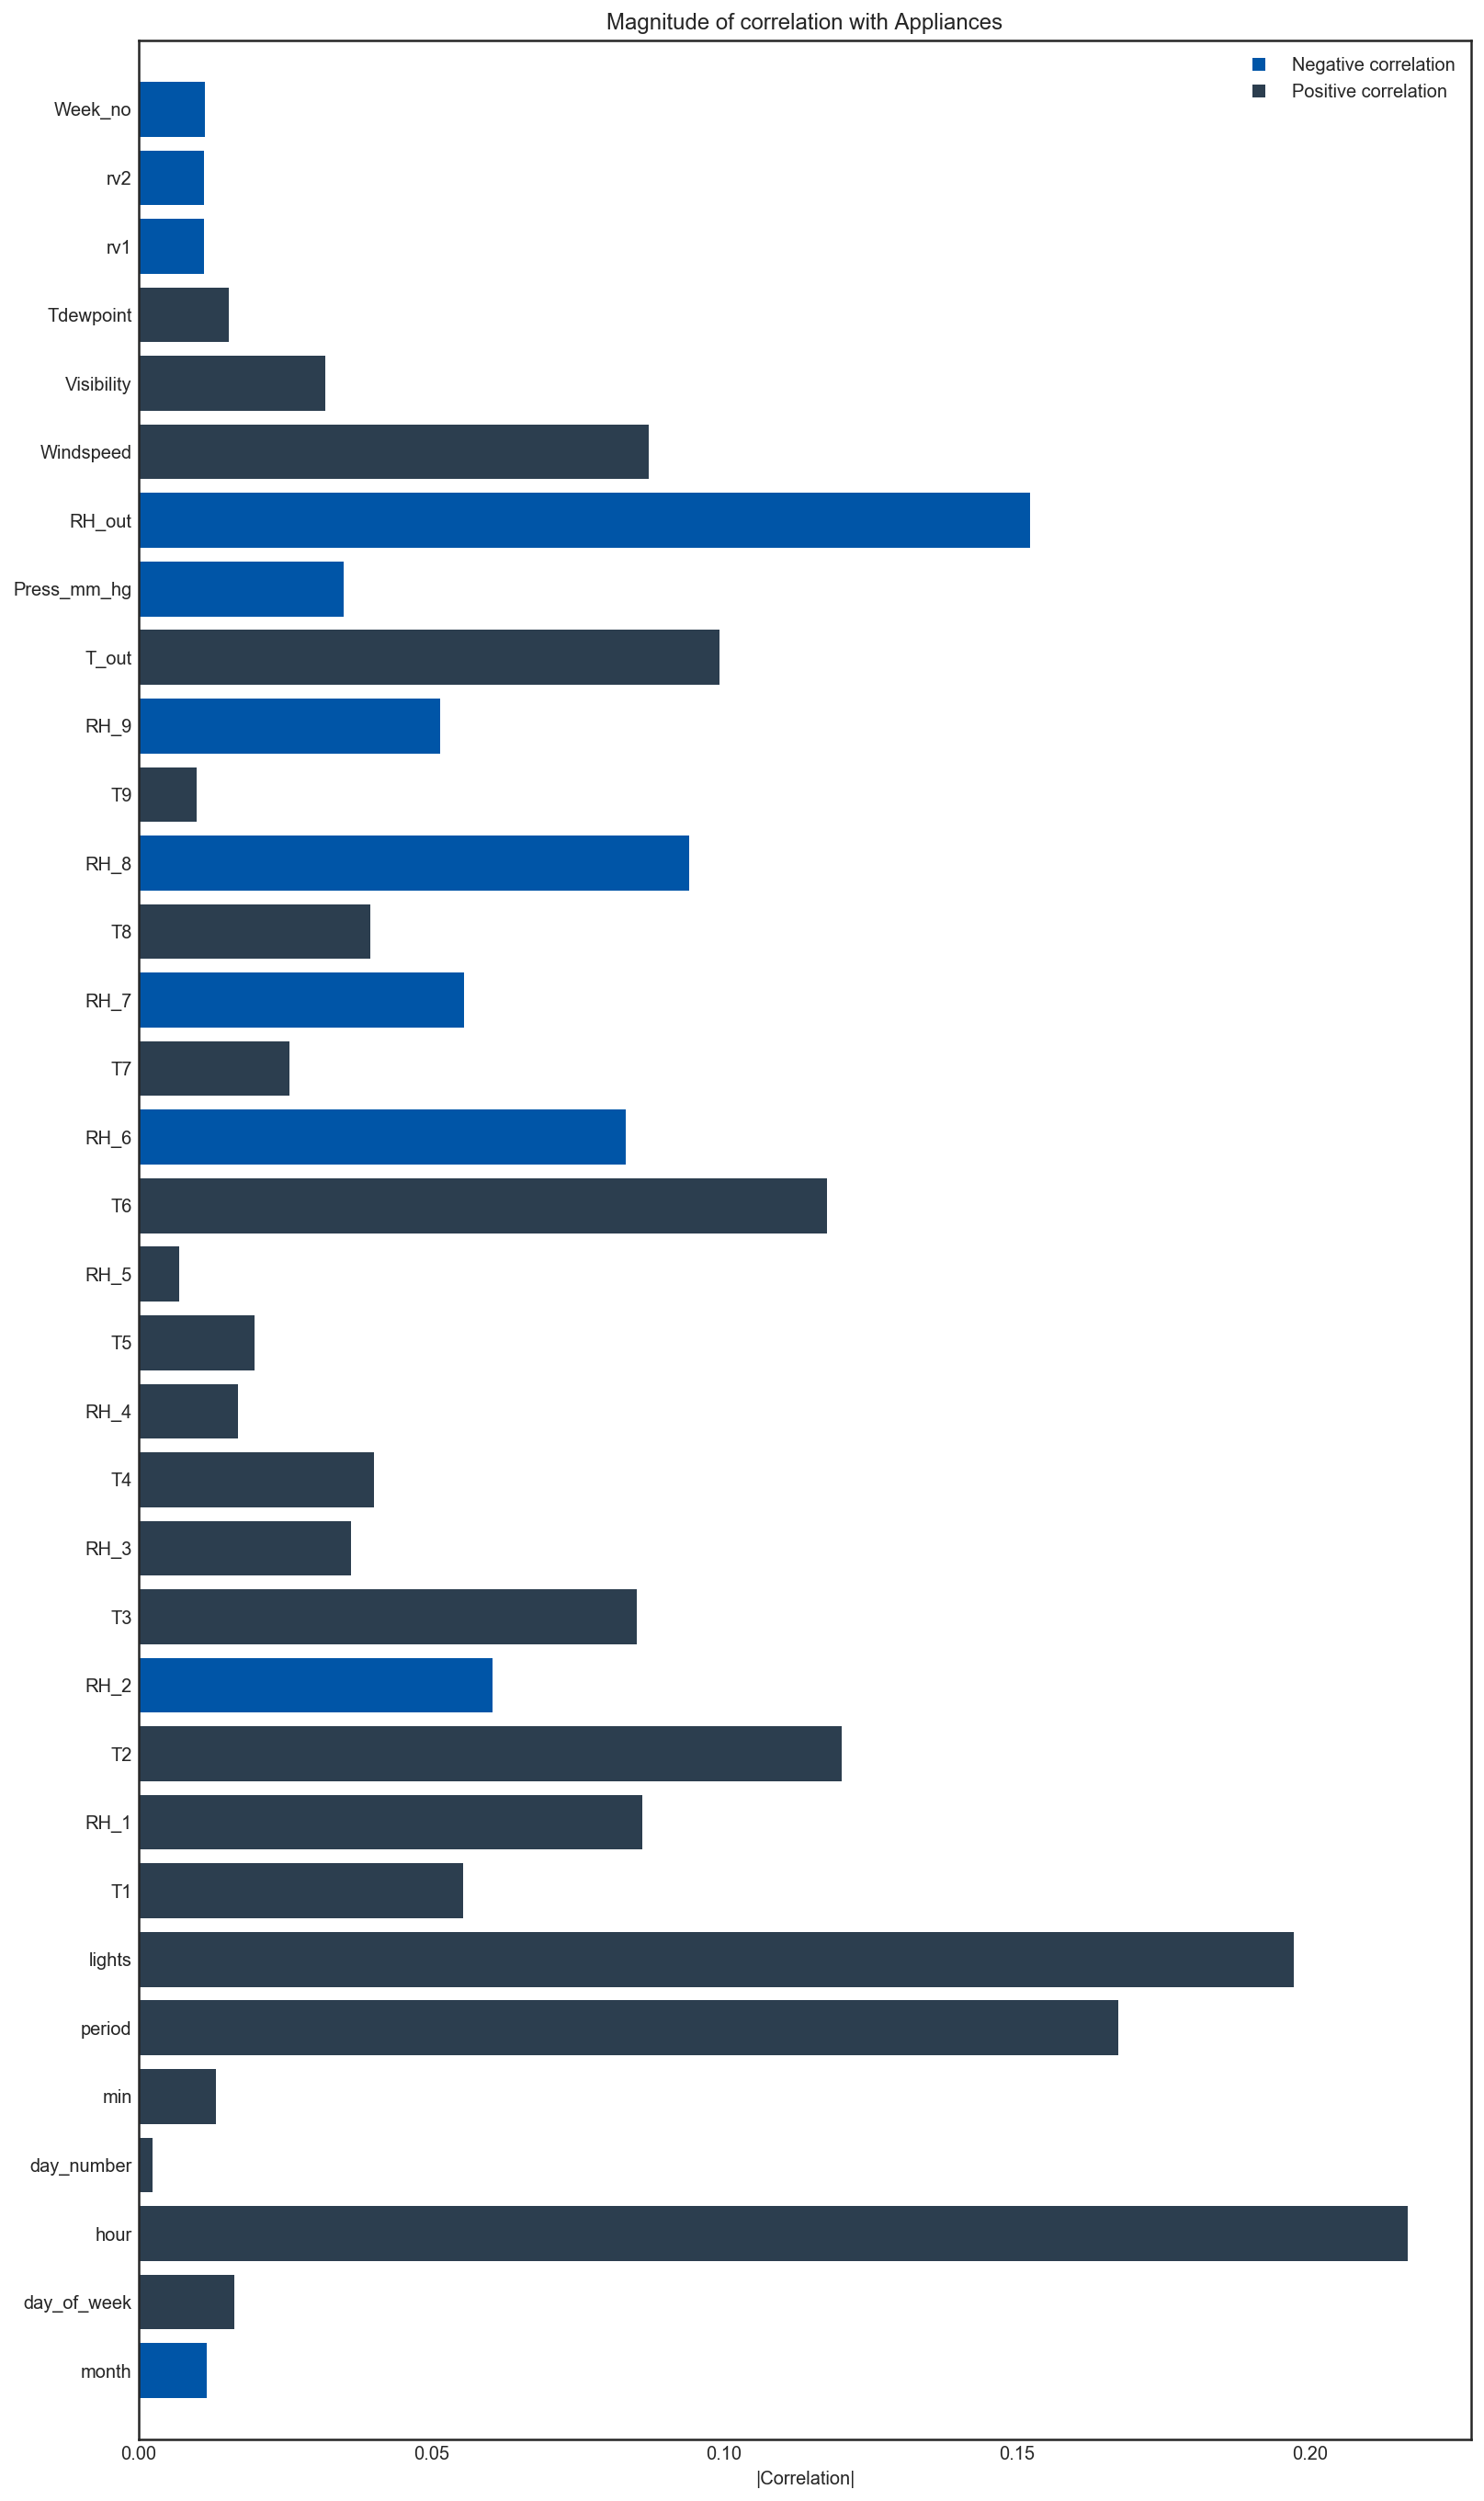

In [18]:
bar_colors = ['#0055A7' if x else '#2C3E4F' for x in list(recent_corr.values < 0)]
color_labels = {'#0055A7':'Negative correlation', '#2C3E4F':'Positive correlation'}

conditional_bar(recent_corr.apply(np.abs), bar_colors, color_labels,
               title='Magnitude of correlation with Appliances',
               xlabel='|Correlation|')

In [19]:
phase.corr()

,month,day_of_week,hour,day_number,min,period,Appliances,lights,T1,RH_1,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Week_no,Total
month,1.000000,-0.007974,-0.007396,-0.204535,-0.000105,-0.007101,-0.011606,-0.179452,0.706305,-0.094048,...,0.595751,-0.060207,-0.340481,-0.260337,-0.021254,0.470633,-0.002686,-0.002686,0.977385,-0.025043
day_of_week,-0.007974,1.000000,-0.004984,0.043796,-0.000075,0.525132,0.016341,-0.113965,-0.042686,-0.047753,...,0.004029,-0.017282,-0.006618,-0.052547,-0.059366,-0.001111,0.010717,0.010717,-0.011700,0.007386
hour,-0.007396,-0.004984,1.000000,-0.004574,-0.000070,0.511719,0.216792,0.255346,0.178858,0.018594,...,0.219802,-0.006234,-0.347705,0.095850,0.054912,0.024467,-0.013185,-0.013185,-0.008285,0.232351
day_number,-0.204535,0.043796,-0.004574,1.000000,-0.000096,0.020788,0.002366,-0.041895,-0.127088,-0.041397,...,-0.103677,0.181031,0.065657,0.034168,-0.007293,-0.061629,0.013826,0.013826,0.000960,-0.000861
min,-0.000105,-0.000075,-0.000070,-0.000096,1.000000,0.219852,0.013216,-0.003348,0.000510,-0.001172,...,0.000048,0.000261,-0.000090,-0.000105,0.011486,-0.000004,-0.005246,-0.005246,-0.000126,0.012727
period,-0.007101,0.525132,0.511719,0.020788,0.219852,1.000000,0.167314,0.036599,0.068648,-0.012916,...,0.188035,-0.019123,-0.291100,0.067353,0.018140,0.023773,-0.001269,-0.001269,-0.009546,0.167122
Appliances,-0.011606,0.016341,0.216792,0.002366,0.013216,0.167314,1.000000,0.197278,0.055447,0.086031,...,0.099155,-0.035098,-0.152282,0.087122,0.031836,0.015353,-0.011145,-0.011145,-0.011356,0.997218
lights,-0.179452,-0.113965,0.255346,-0.041895,-0.003348,0.036599,0.197278,1.000000,-0.023528,0.106968,...,-0.074424,-0.011067,0.068543,0.060281,0.021394,-0.036322,0.000521,0.000521,-0.186486,0.269799
T1,0.706305,-0.042686,0.178858,-0.127088,0.000510,0.068648,0.055447,-0.023528,1.000000,0.164006,...,0.682846,-0.148913,-0.345481,-0.087654,0.019270,0.571309,-0.006203,-0.006203,0.694857,0.052673
RH_1,-0.094048,-0.047753,0.018594,-0.041397,-0.001172,-0.012916,0.086031,0.106968,0.164006,1.000000,...,0.340767,-0.293277,0.274126,0.204932,0.005239,0.639106,-0.000699,-0.000699,-0.100089,0.092634


## 1.4 Missing Values Analysis

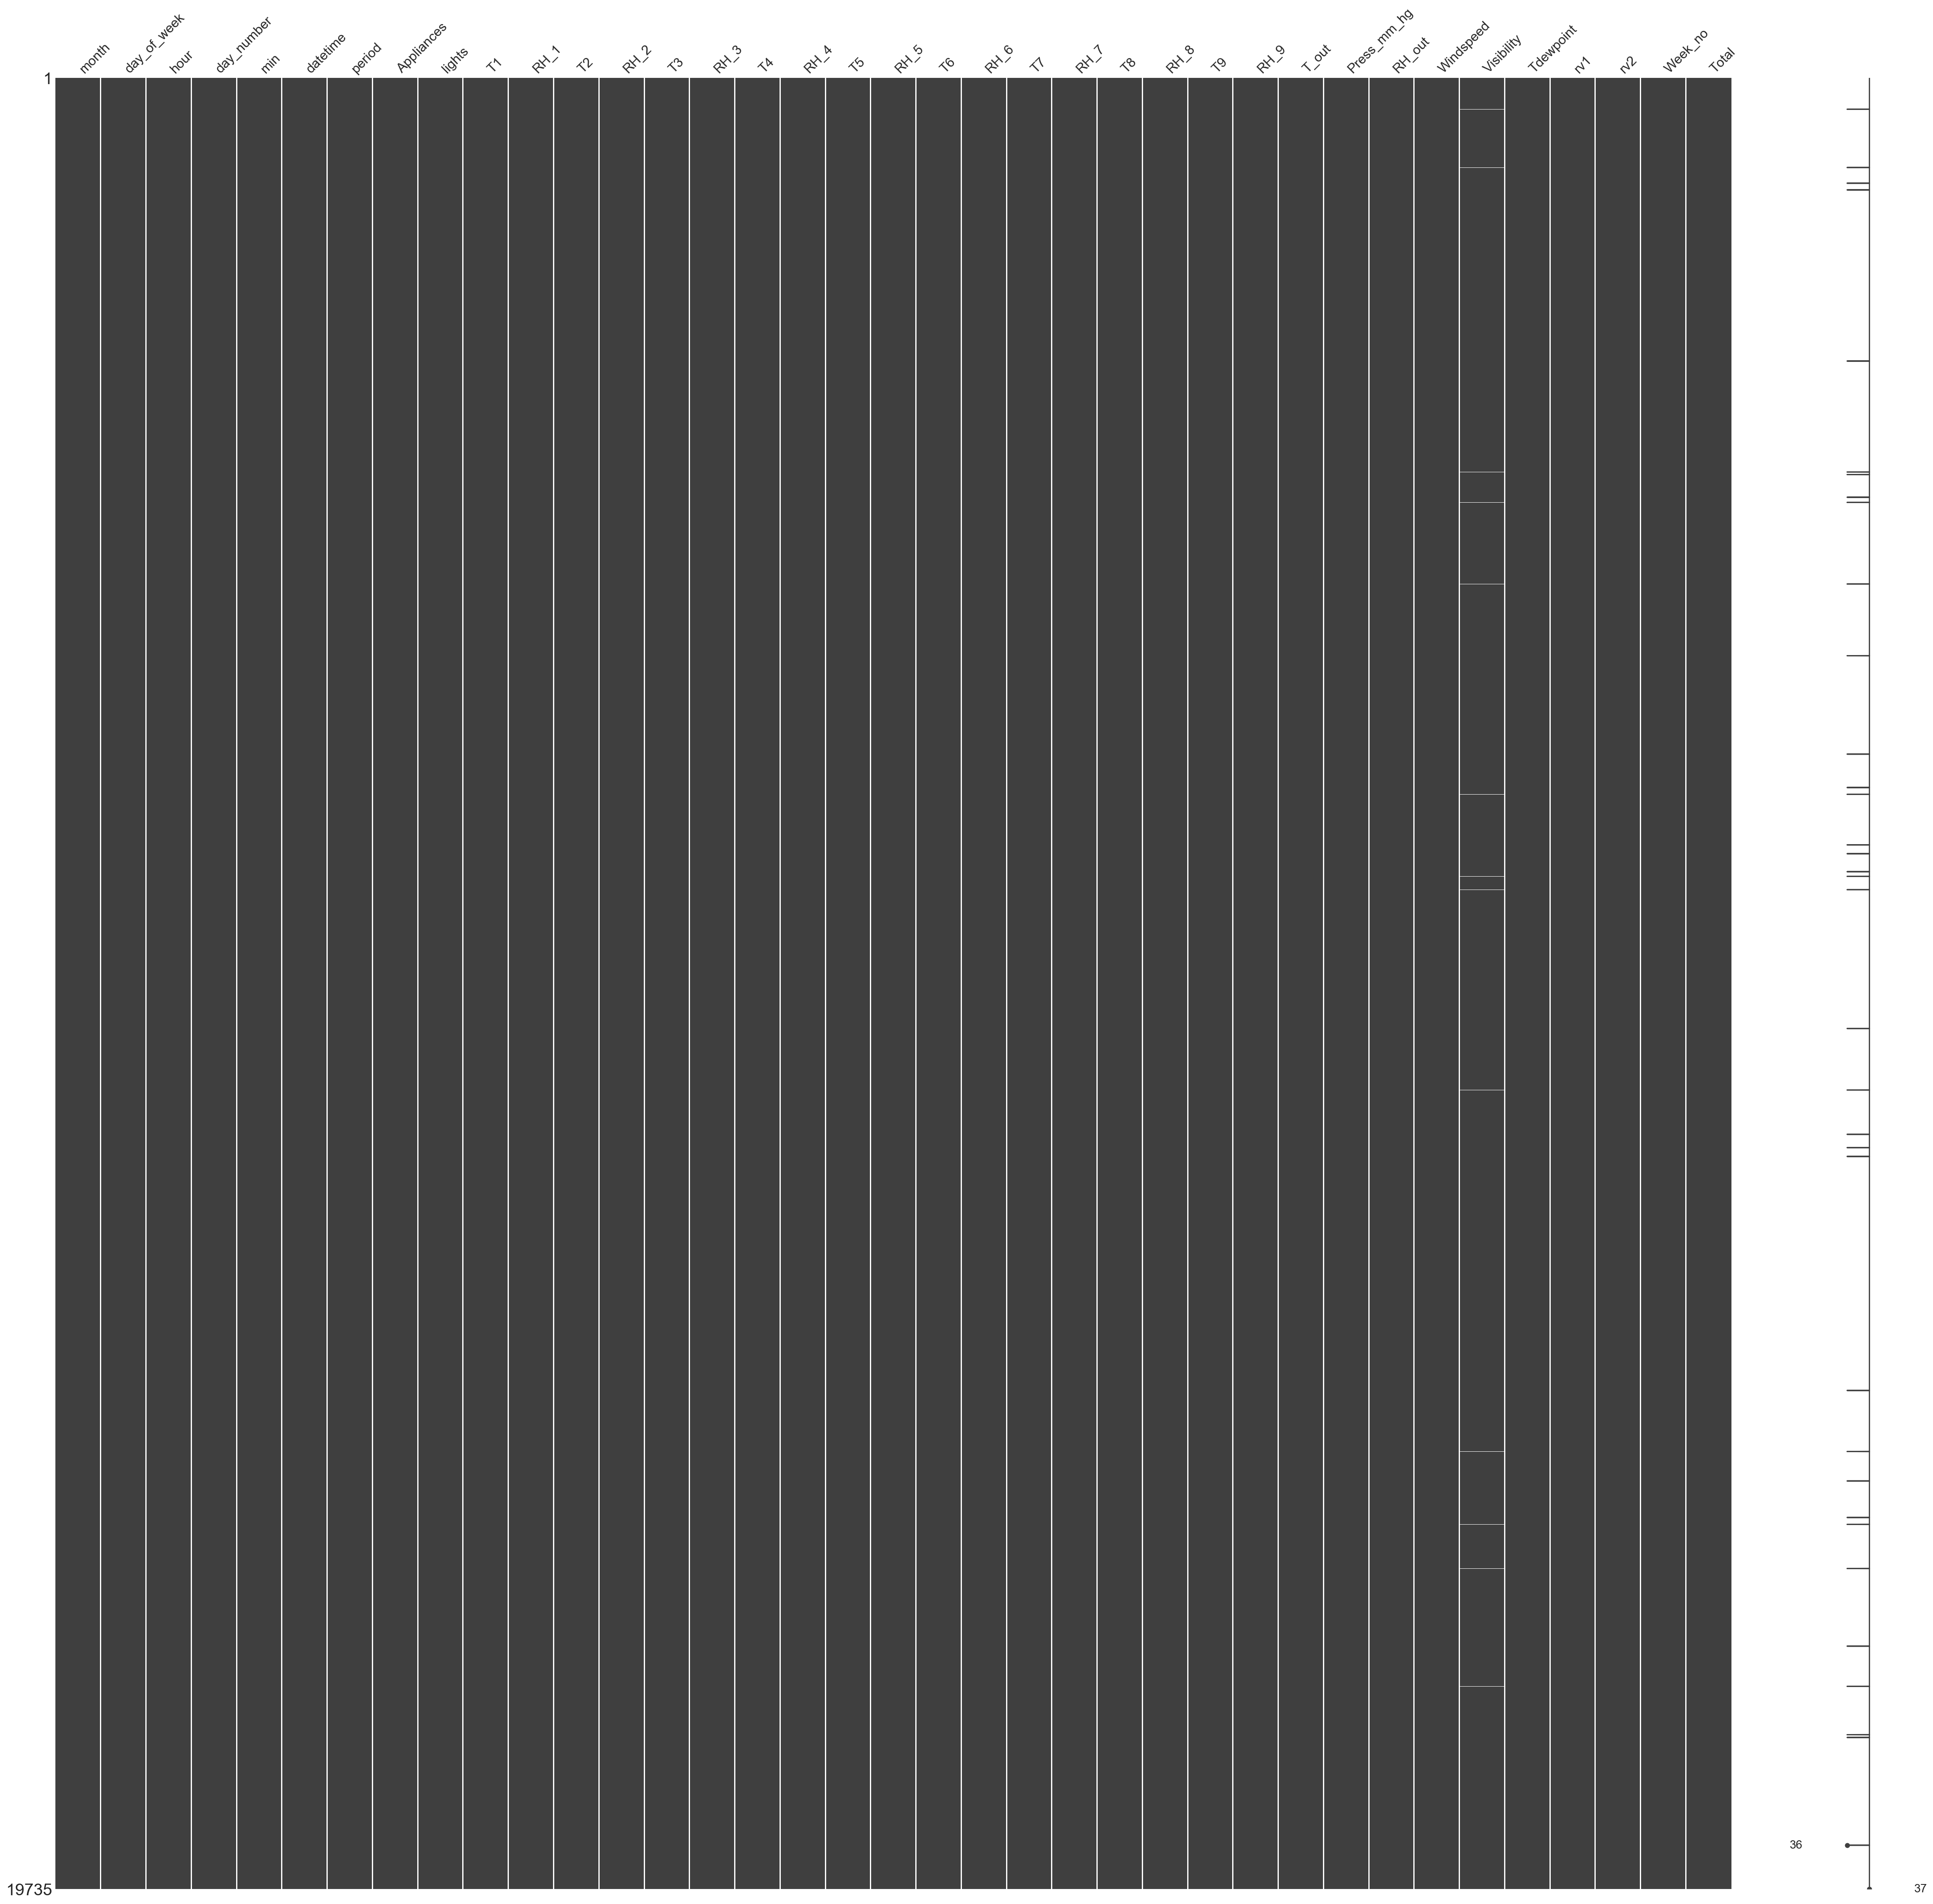

In [20]:
import missingno as msno
msno.matrix(phase.sample(19735),
            figsize=(40,40),
            width_ratios=(15, 1))
plt.show()

In [21]:
phase.isnull().sum()

month           0
day_of_week     0
hour            0
day_number      0
min             0
datetime        0
period          0
Appliances      0
lights          0
T1              0
RH_1            0
T2              0
RH_2            0
T3              0
RH_3            0
T4              0
RH_4            0
T5              0
RH_5            0
T6              0
RH_6            0
T7              0
RH_7            0
T8              0
RH_8            0
T9              0
RH_9            0
T_out           0
Press_mm_hg     0
RH_out          0
Windspeed       0
Visibility     35
Tdewpoint       0
rv1             0
rv2             0
Week_no         0
Total           0
dtype: int64

## 1.5 Outlier Detection

### Appliances

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


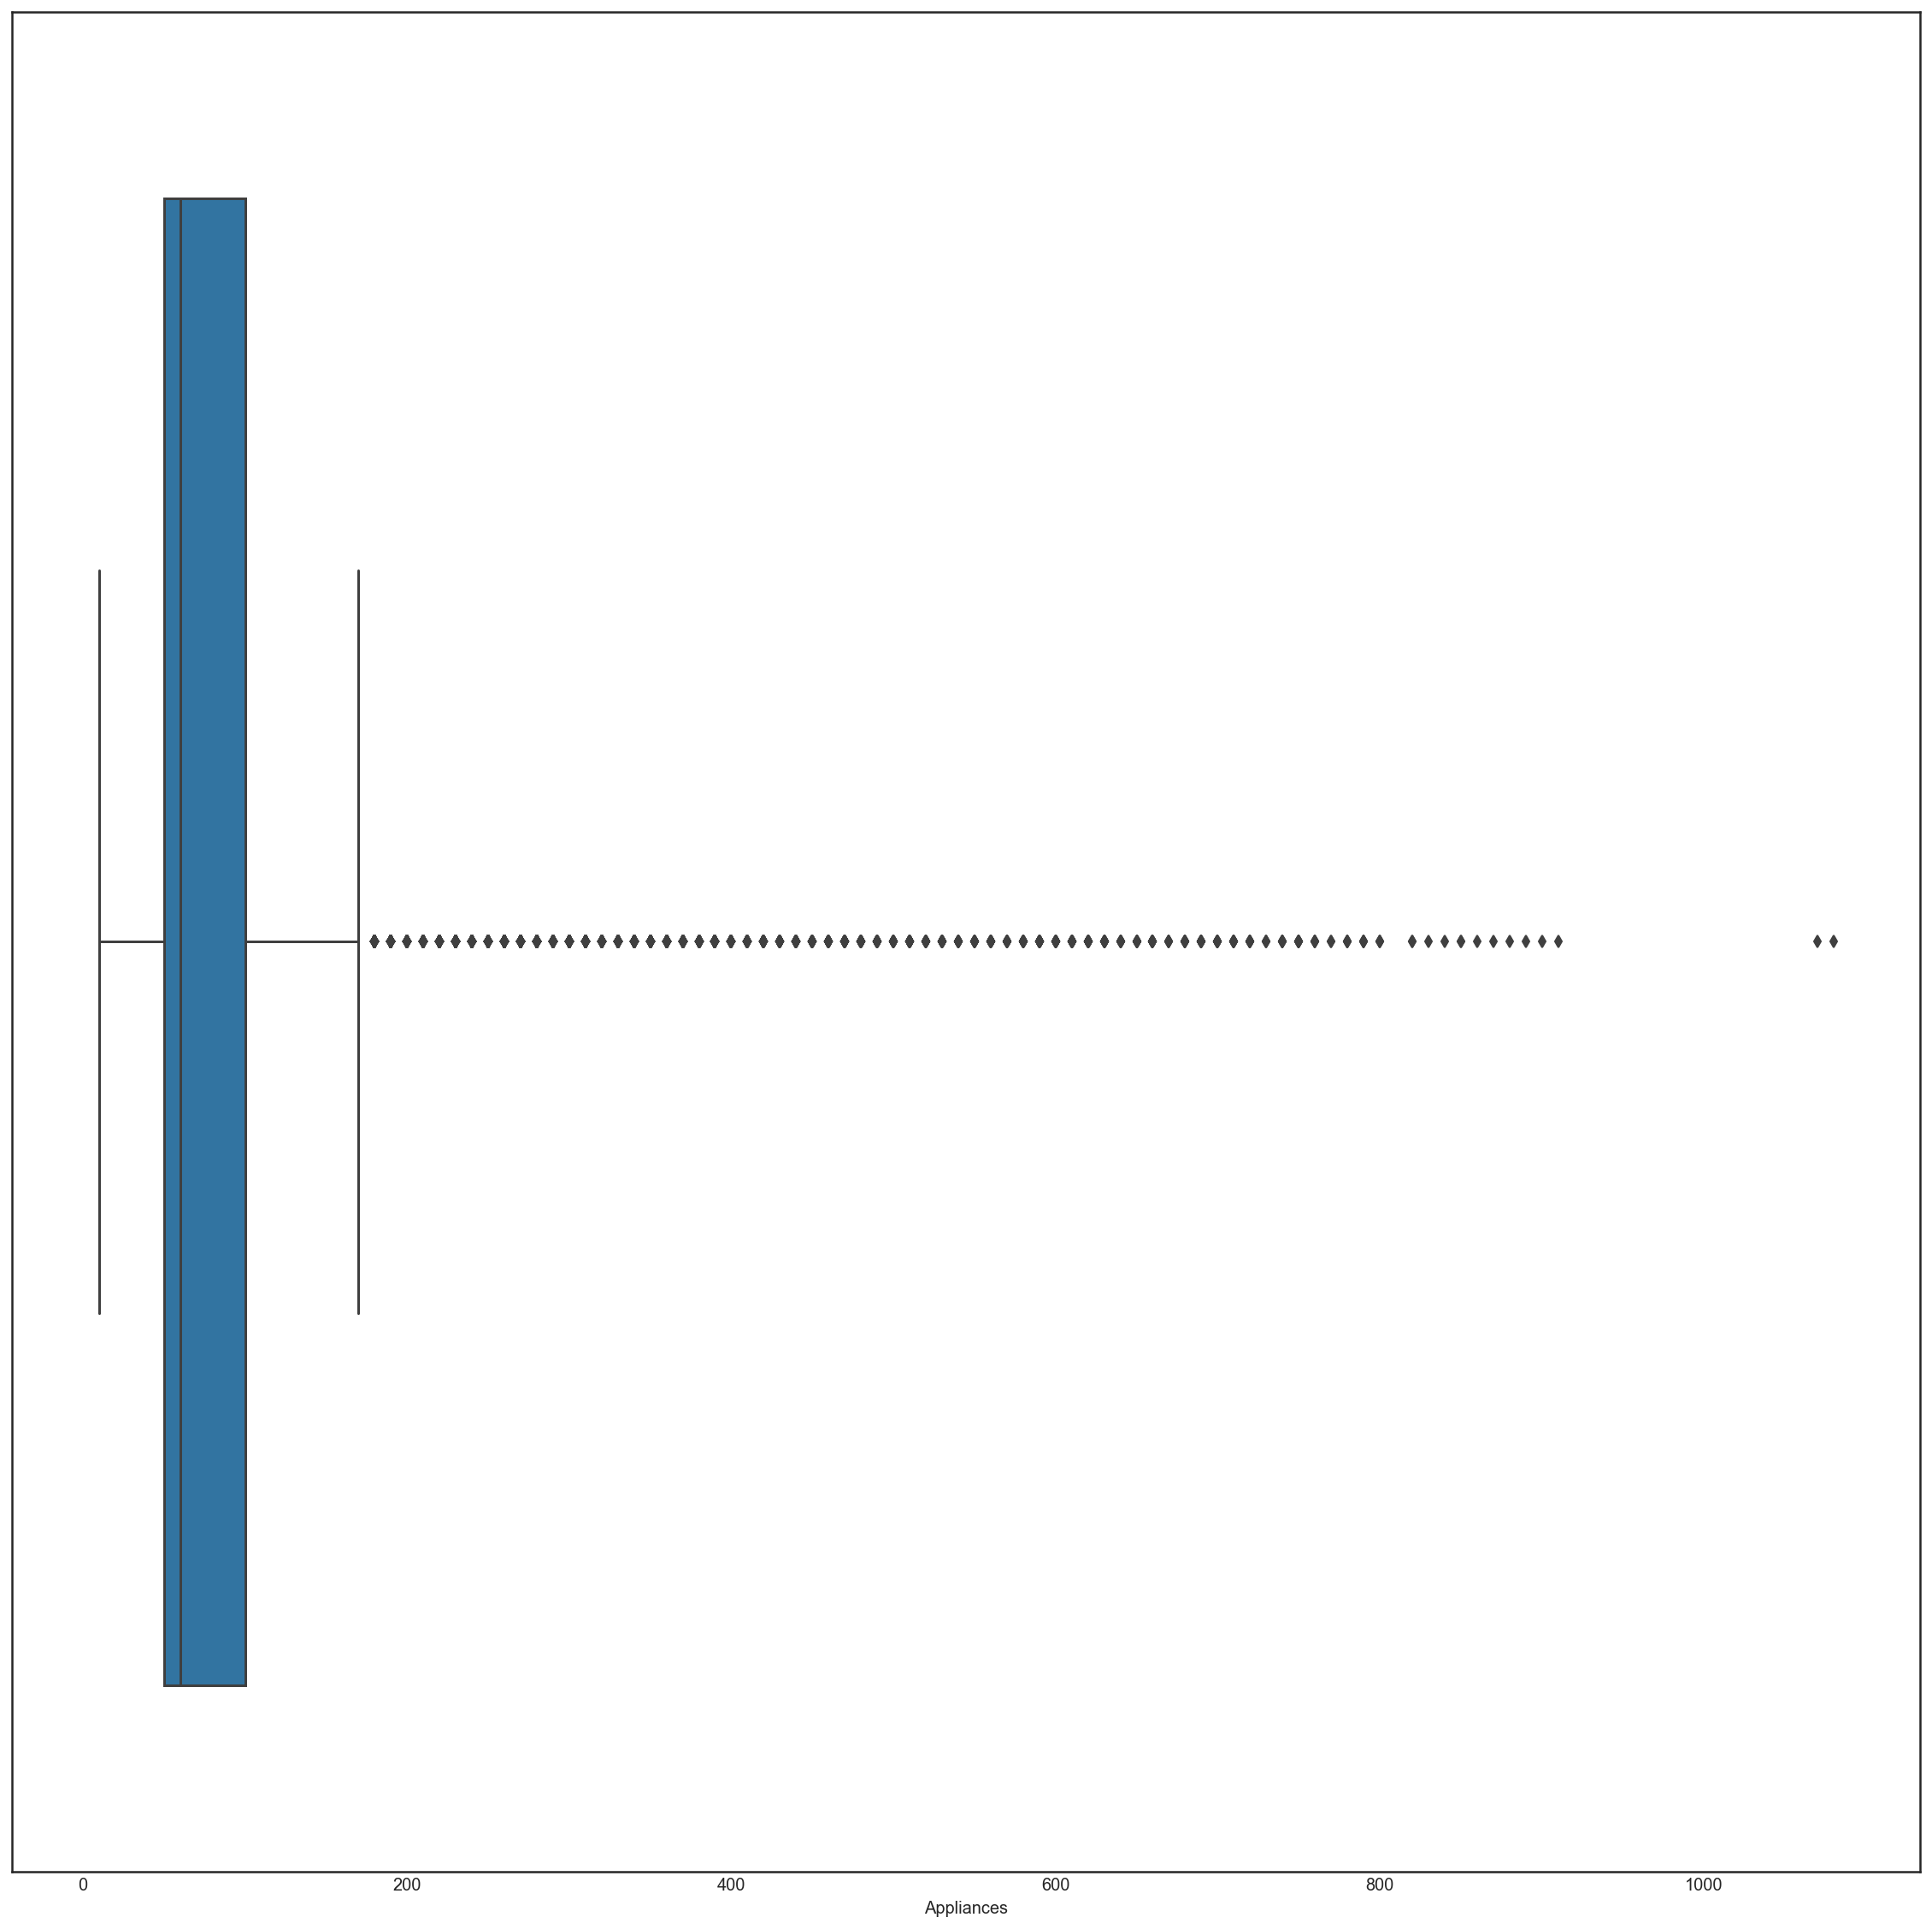

In [22]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax1 = sns.boxplot(x="Appliances", data=phase)

### T1 RH_1

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


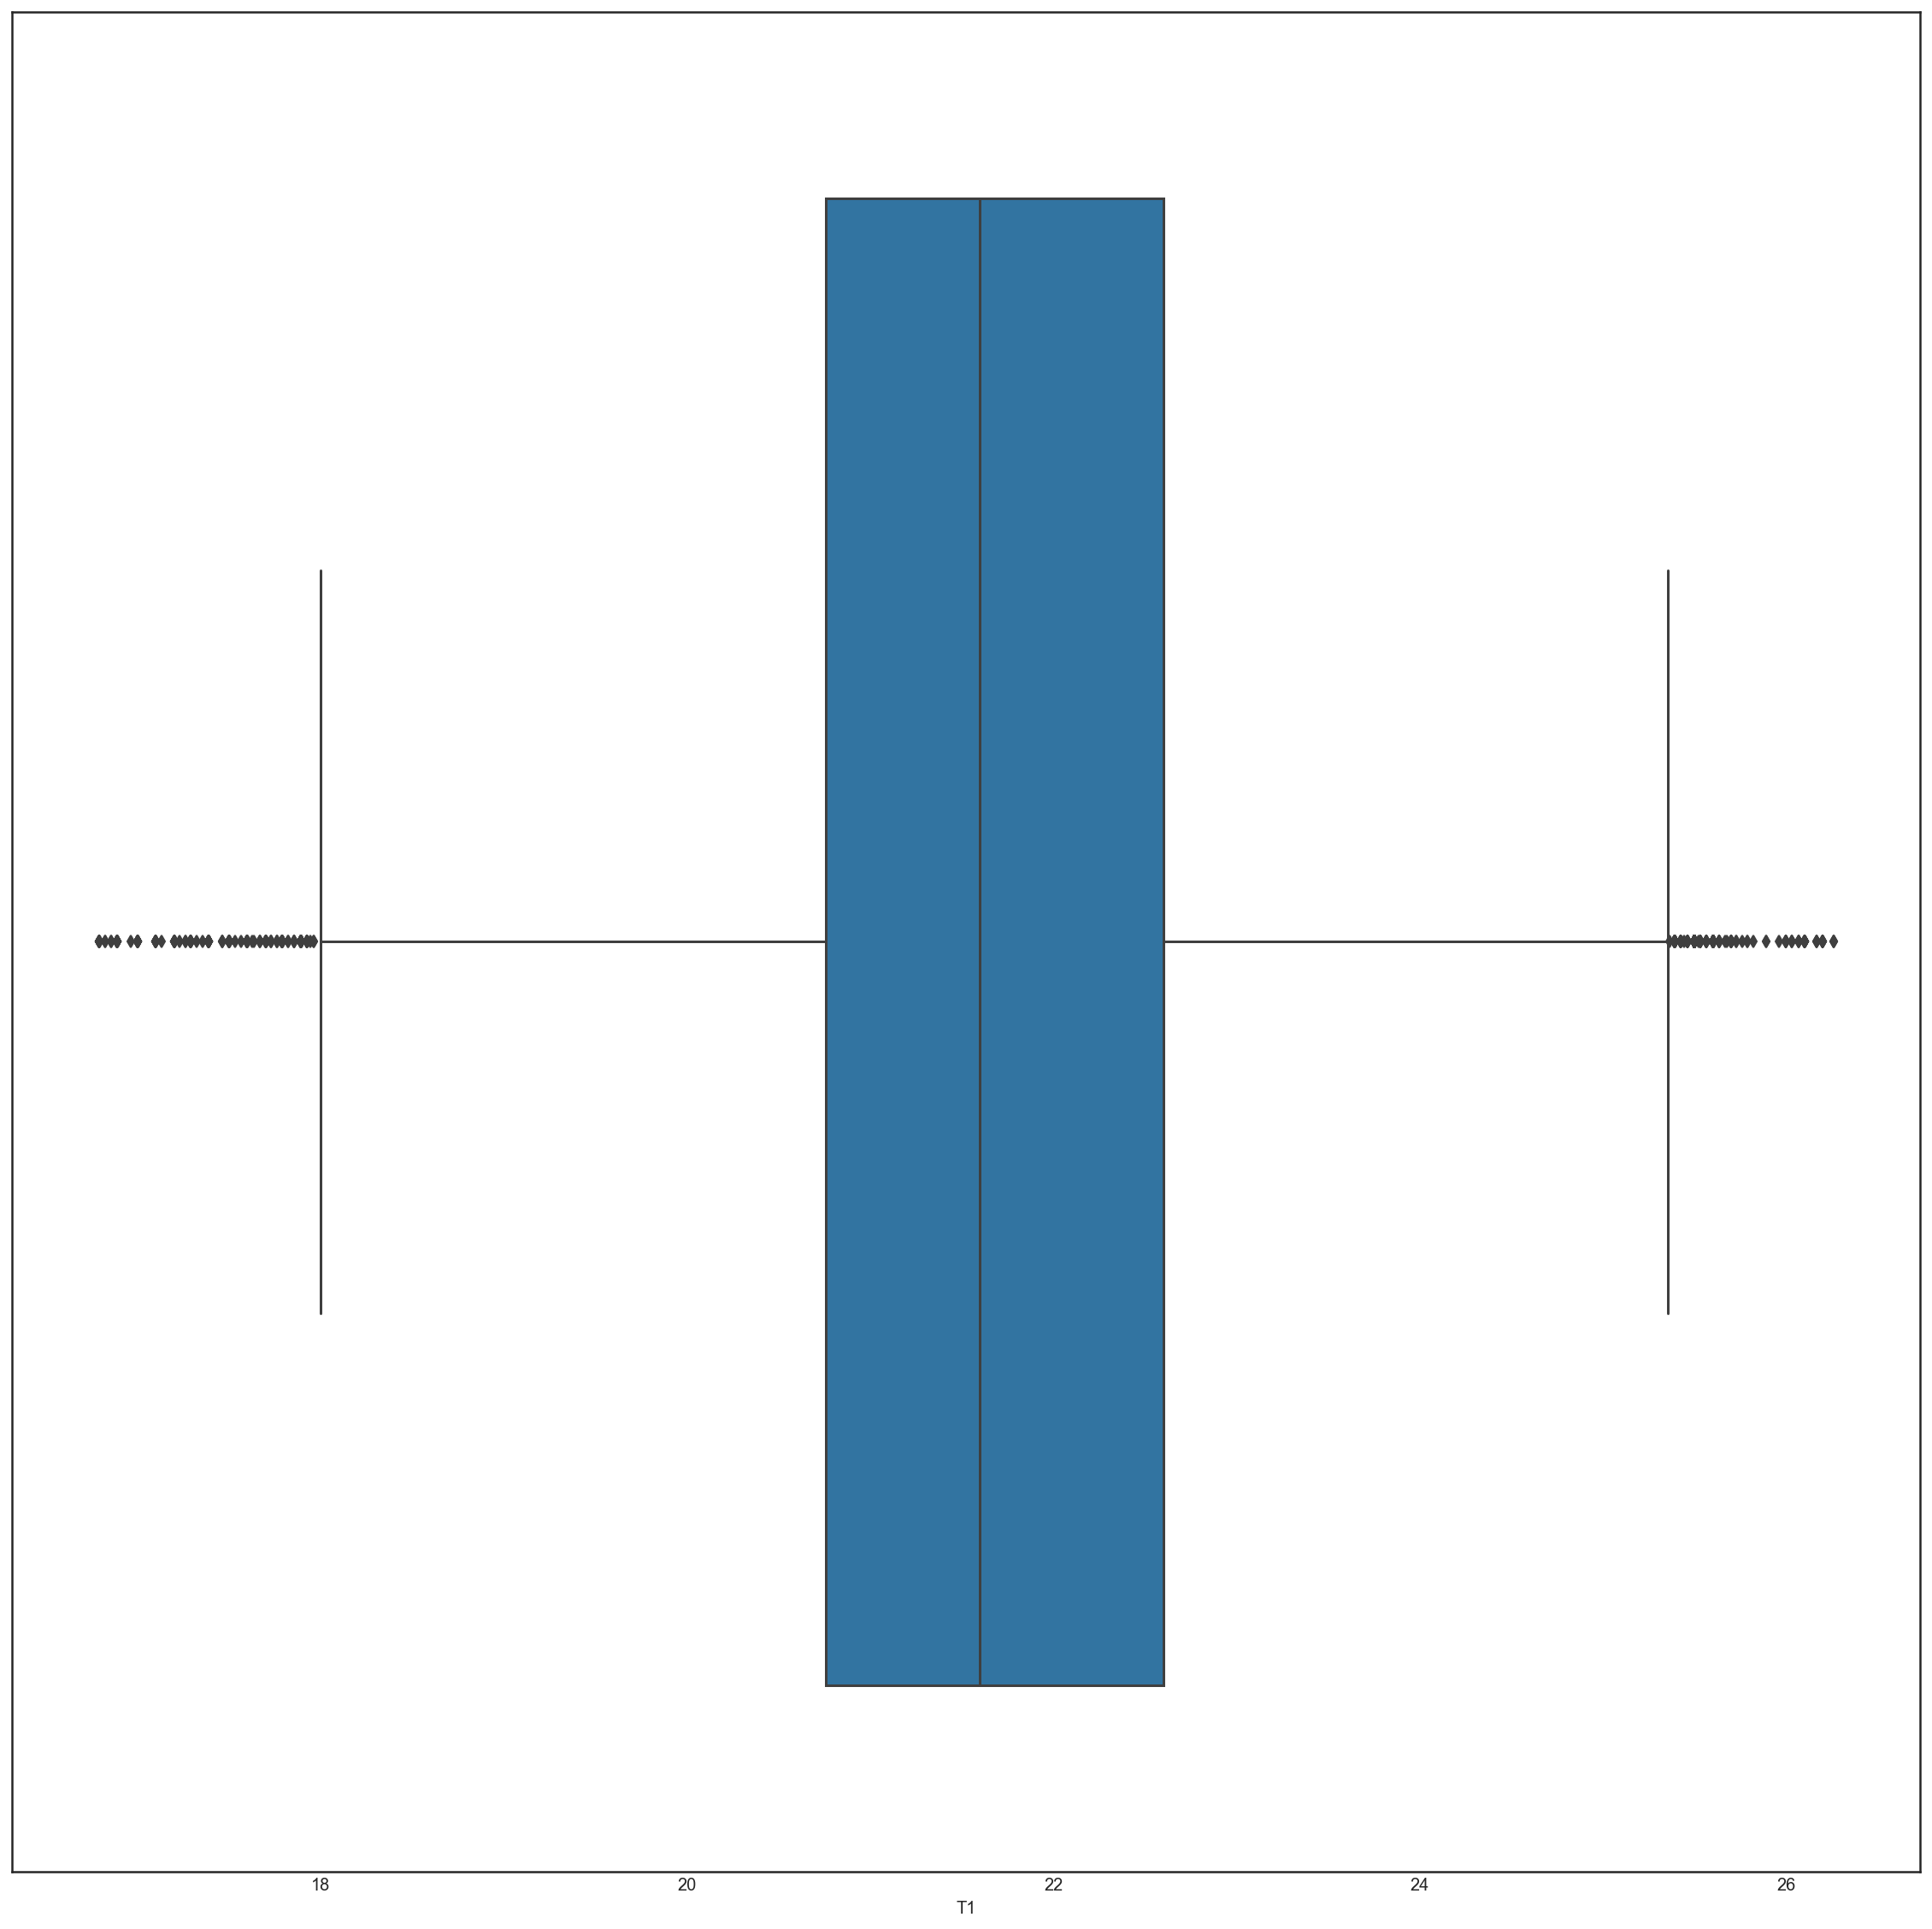

In [23]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax3 = sns.boxplot(x="T1", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


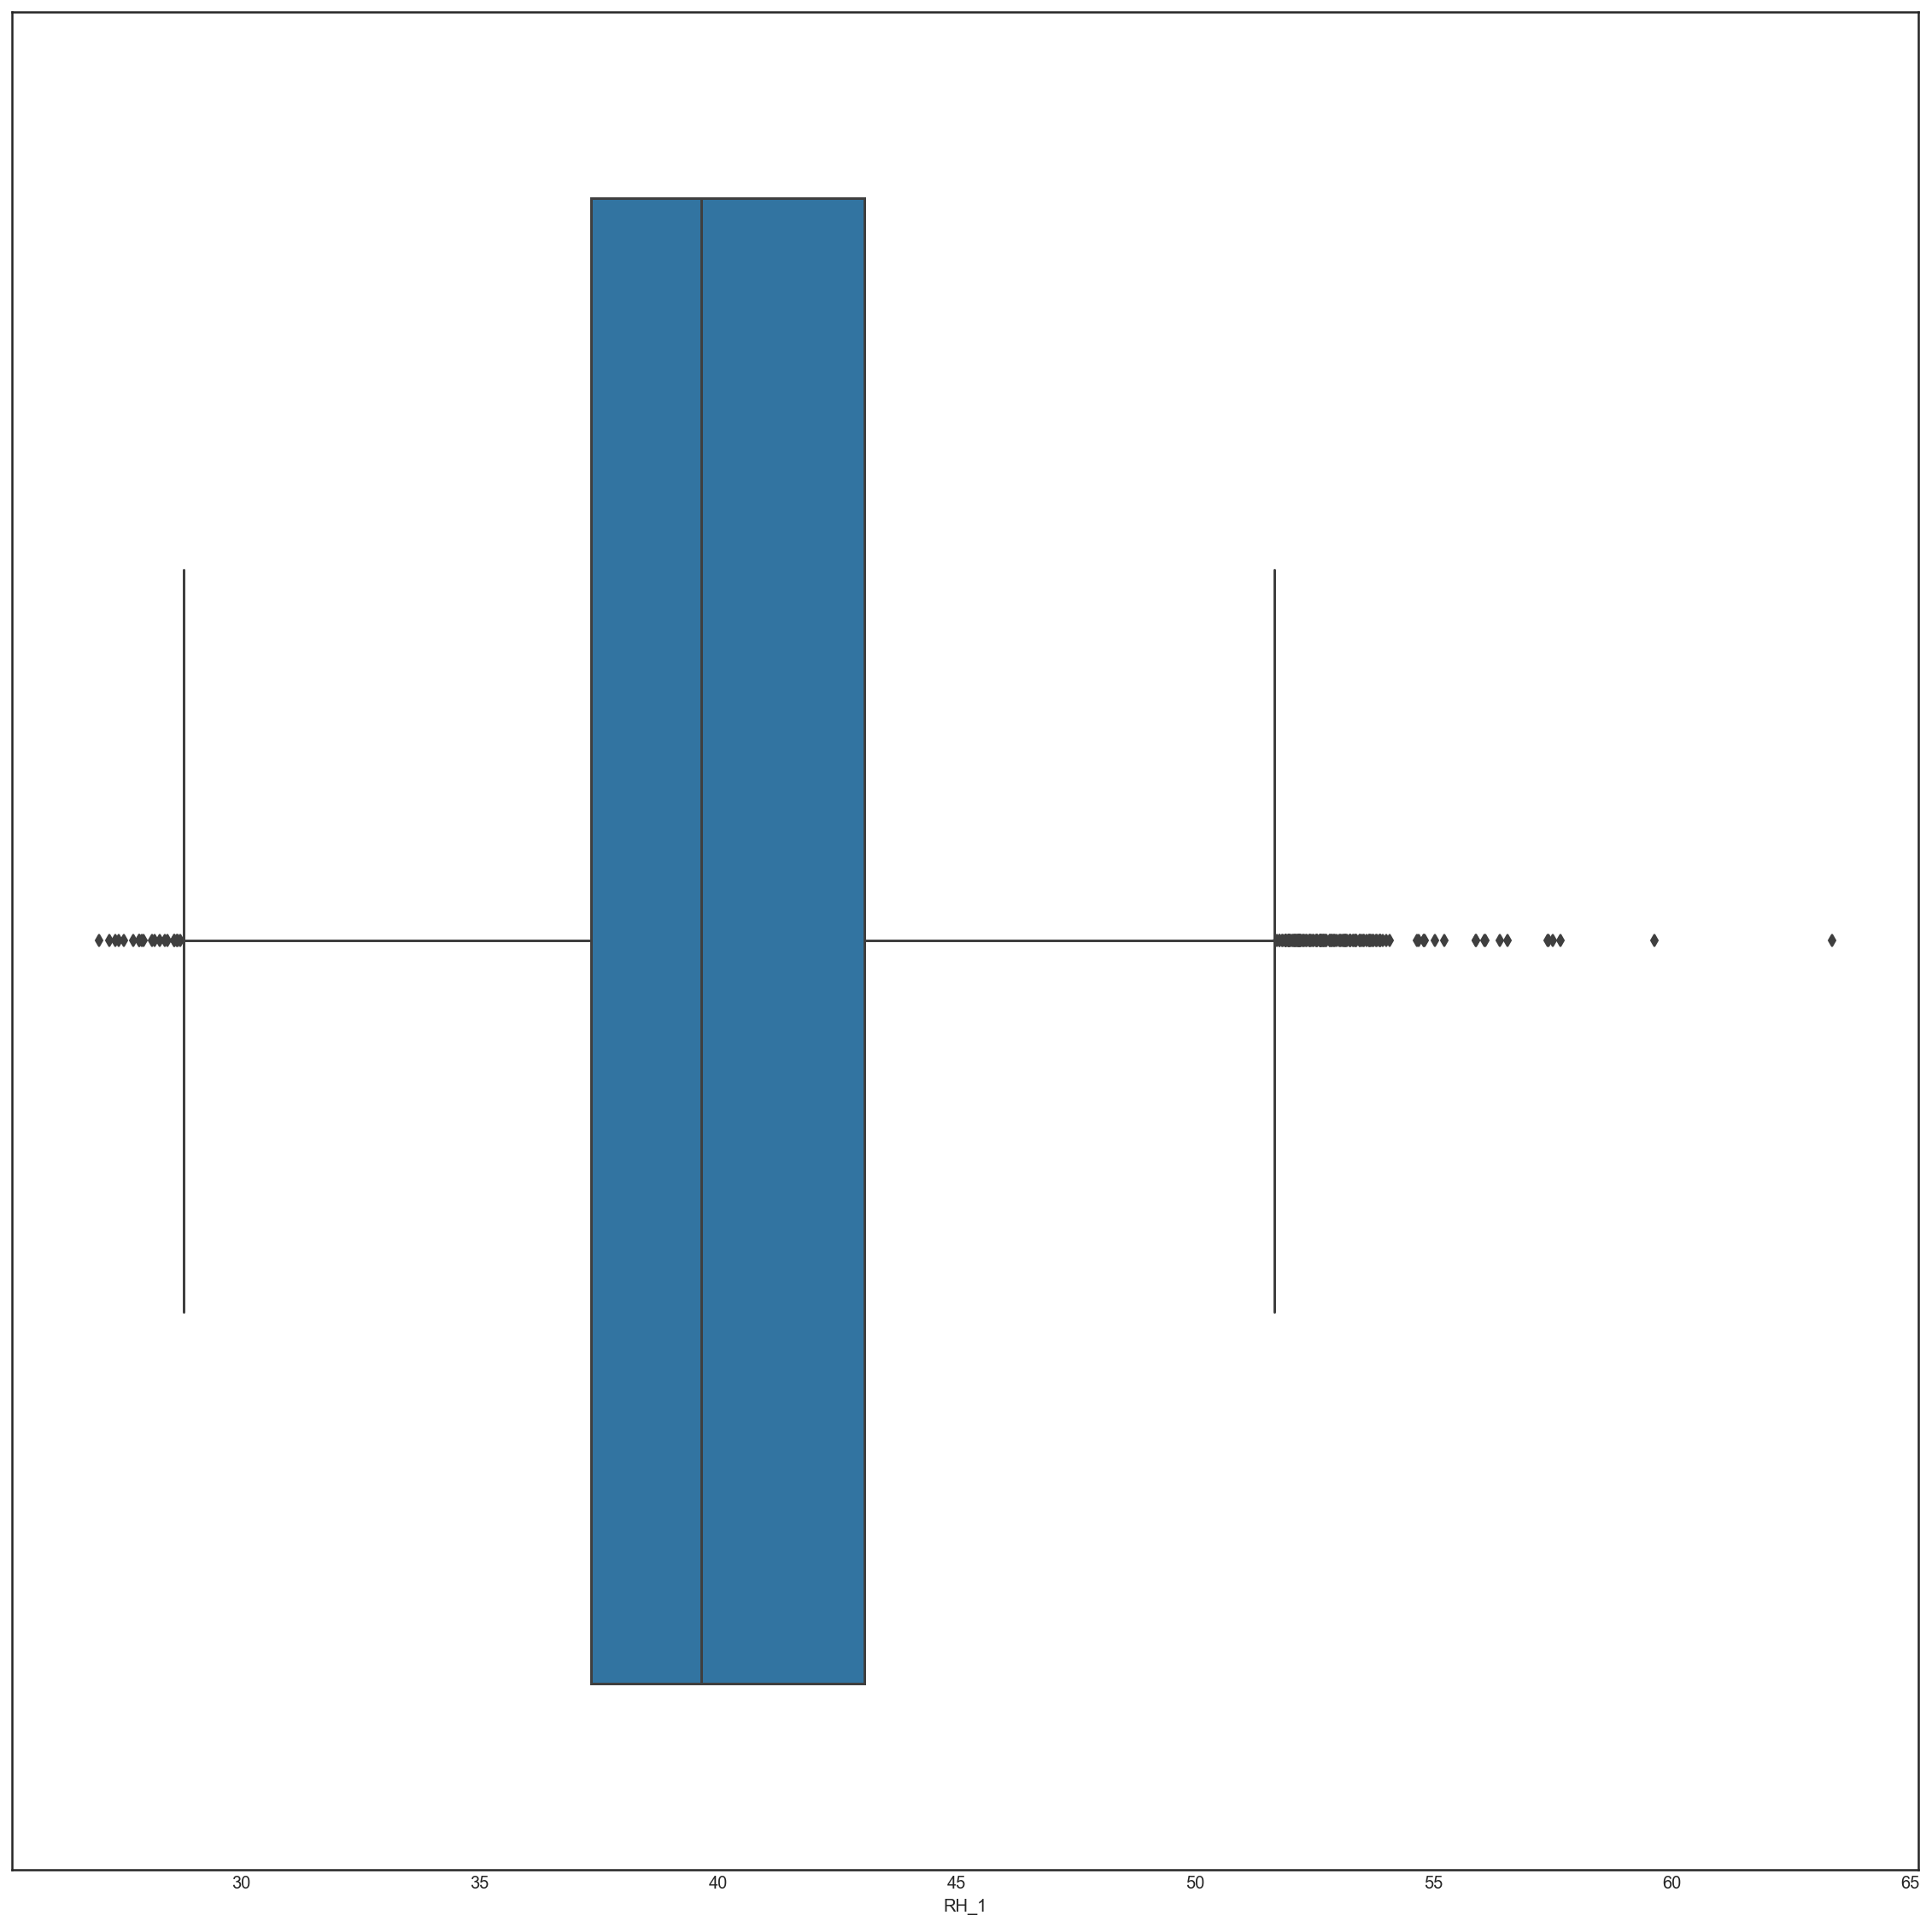

In [24]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax3 = sns.boxplot(x="RH_1", data=phase)

### T2 RH_2

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


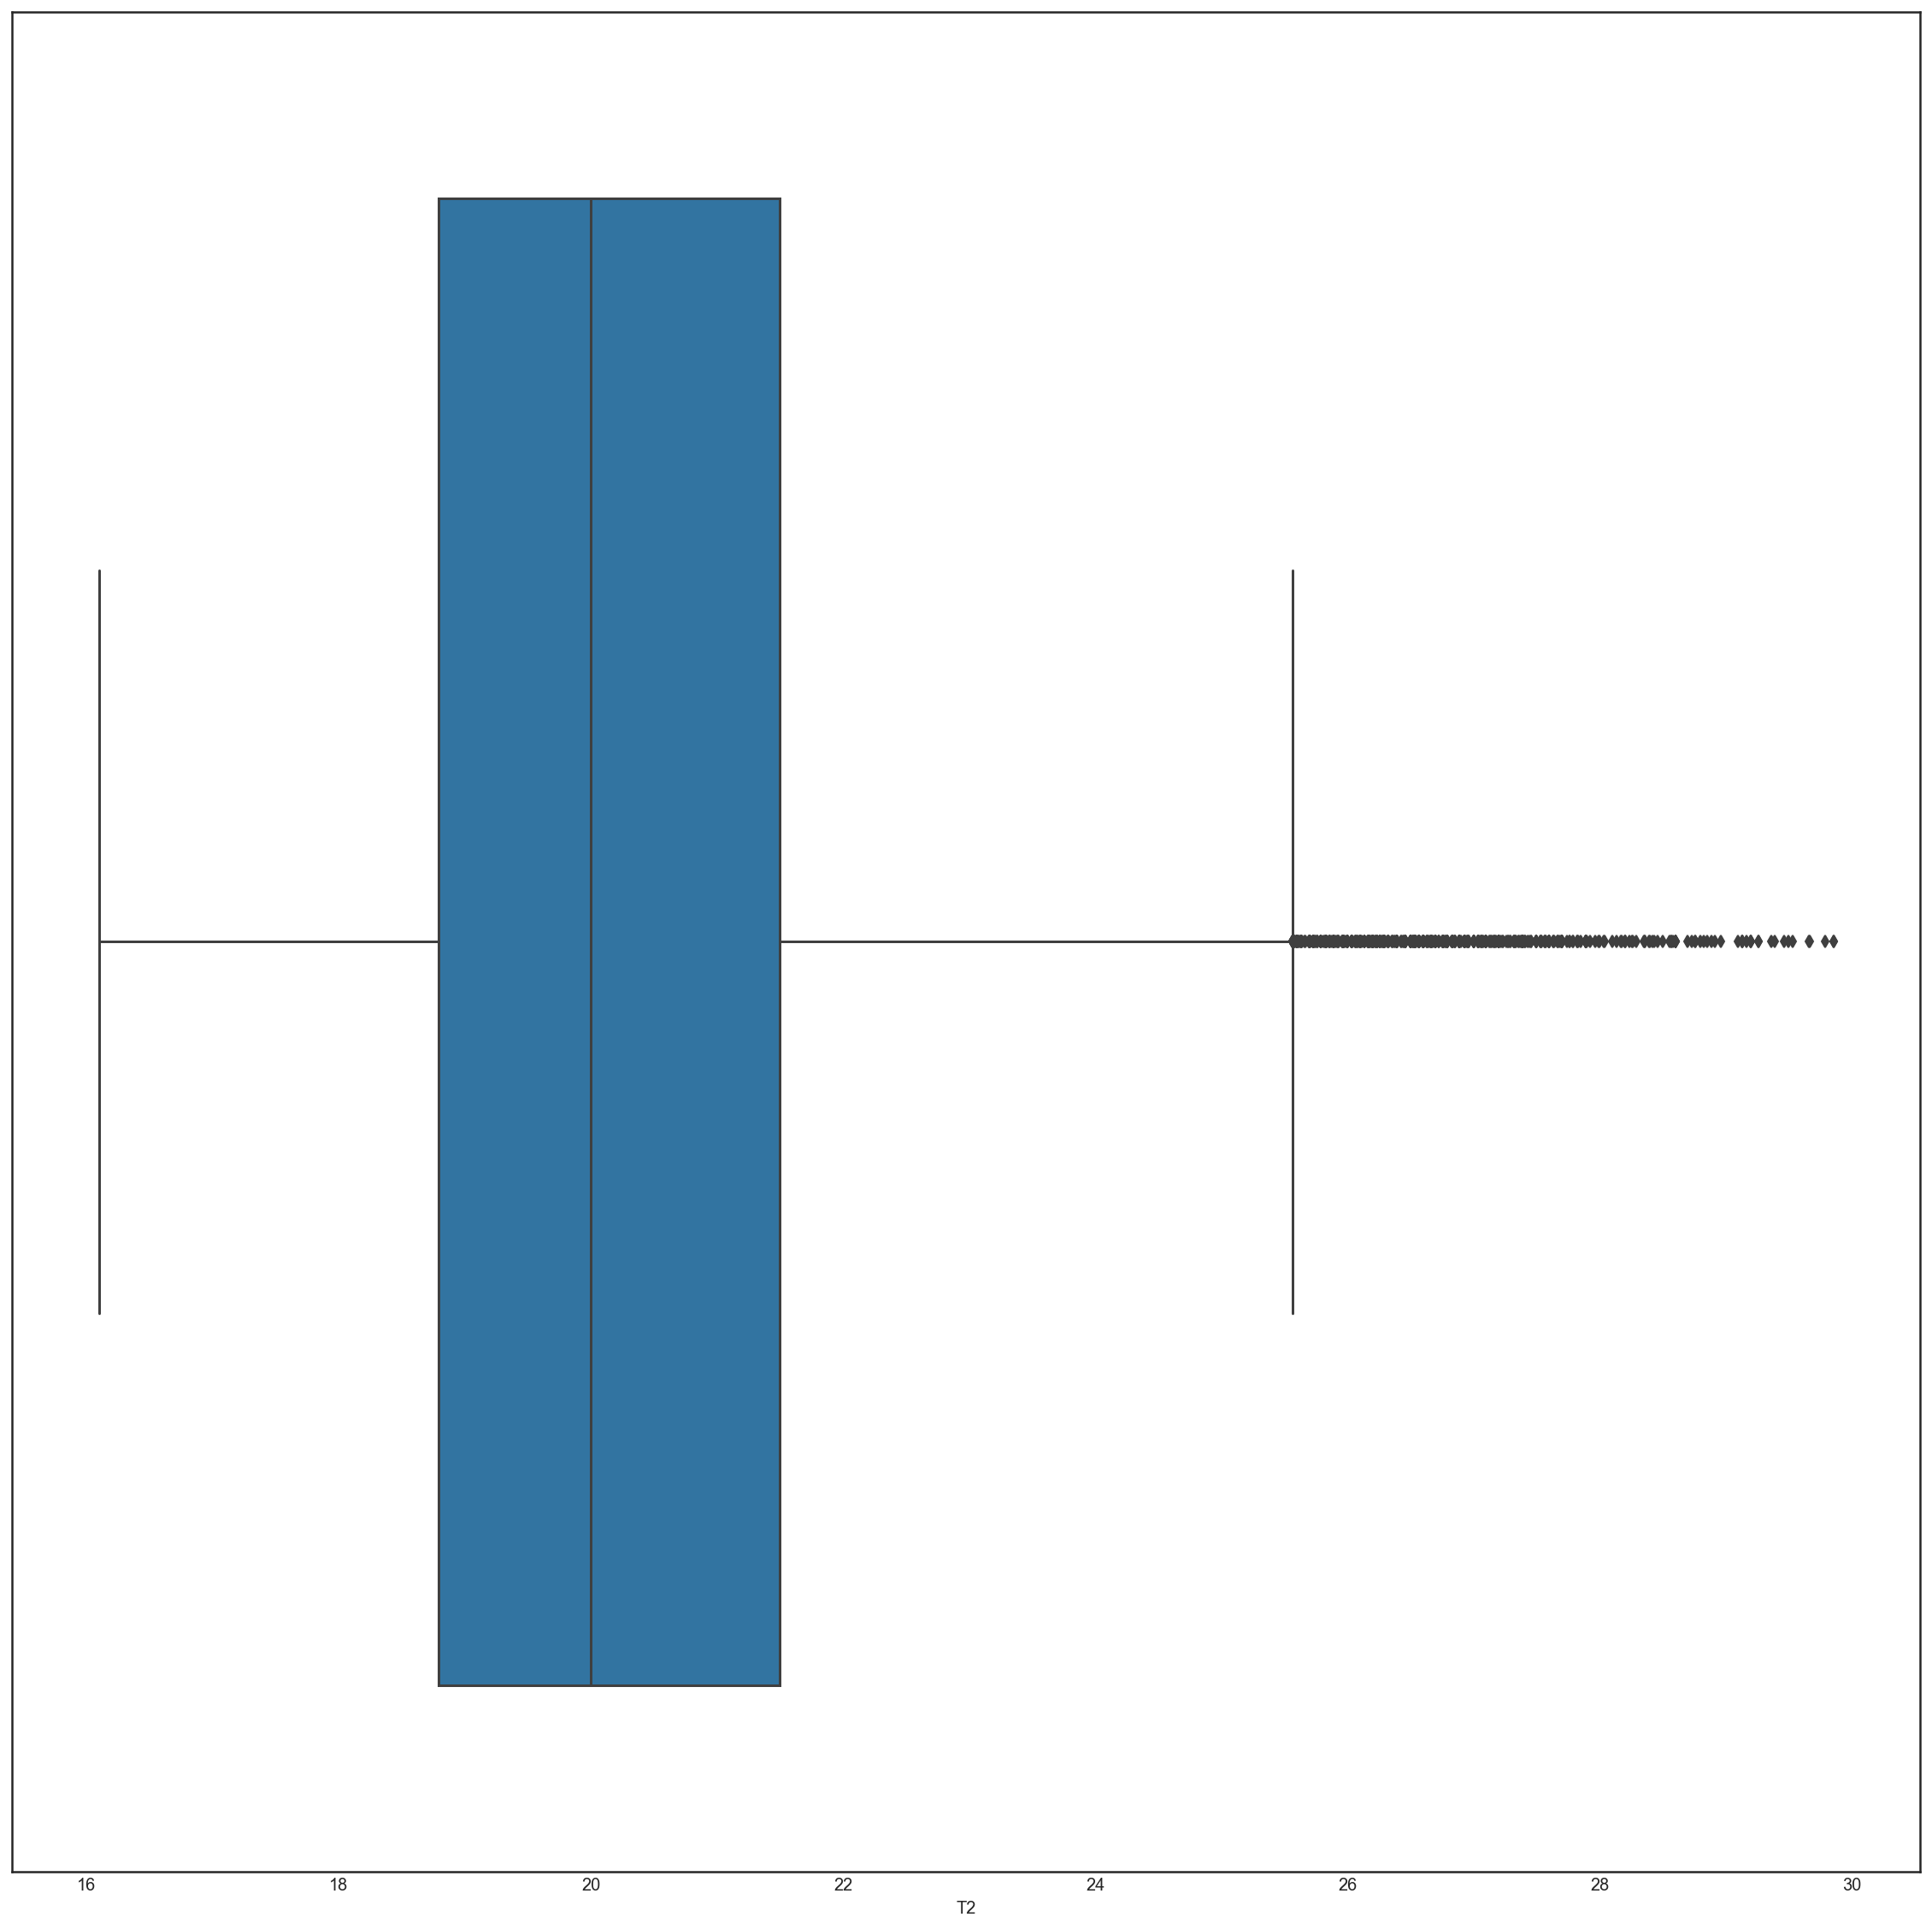

In [25]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax4 = sns.boxplot(x="T2", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


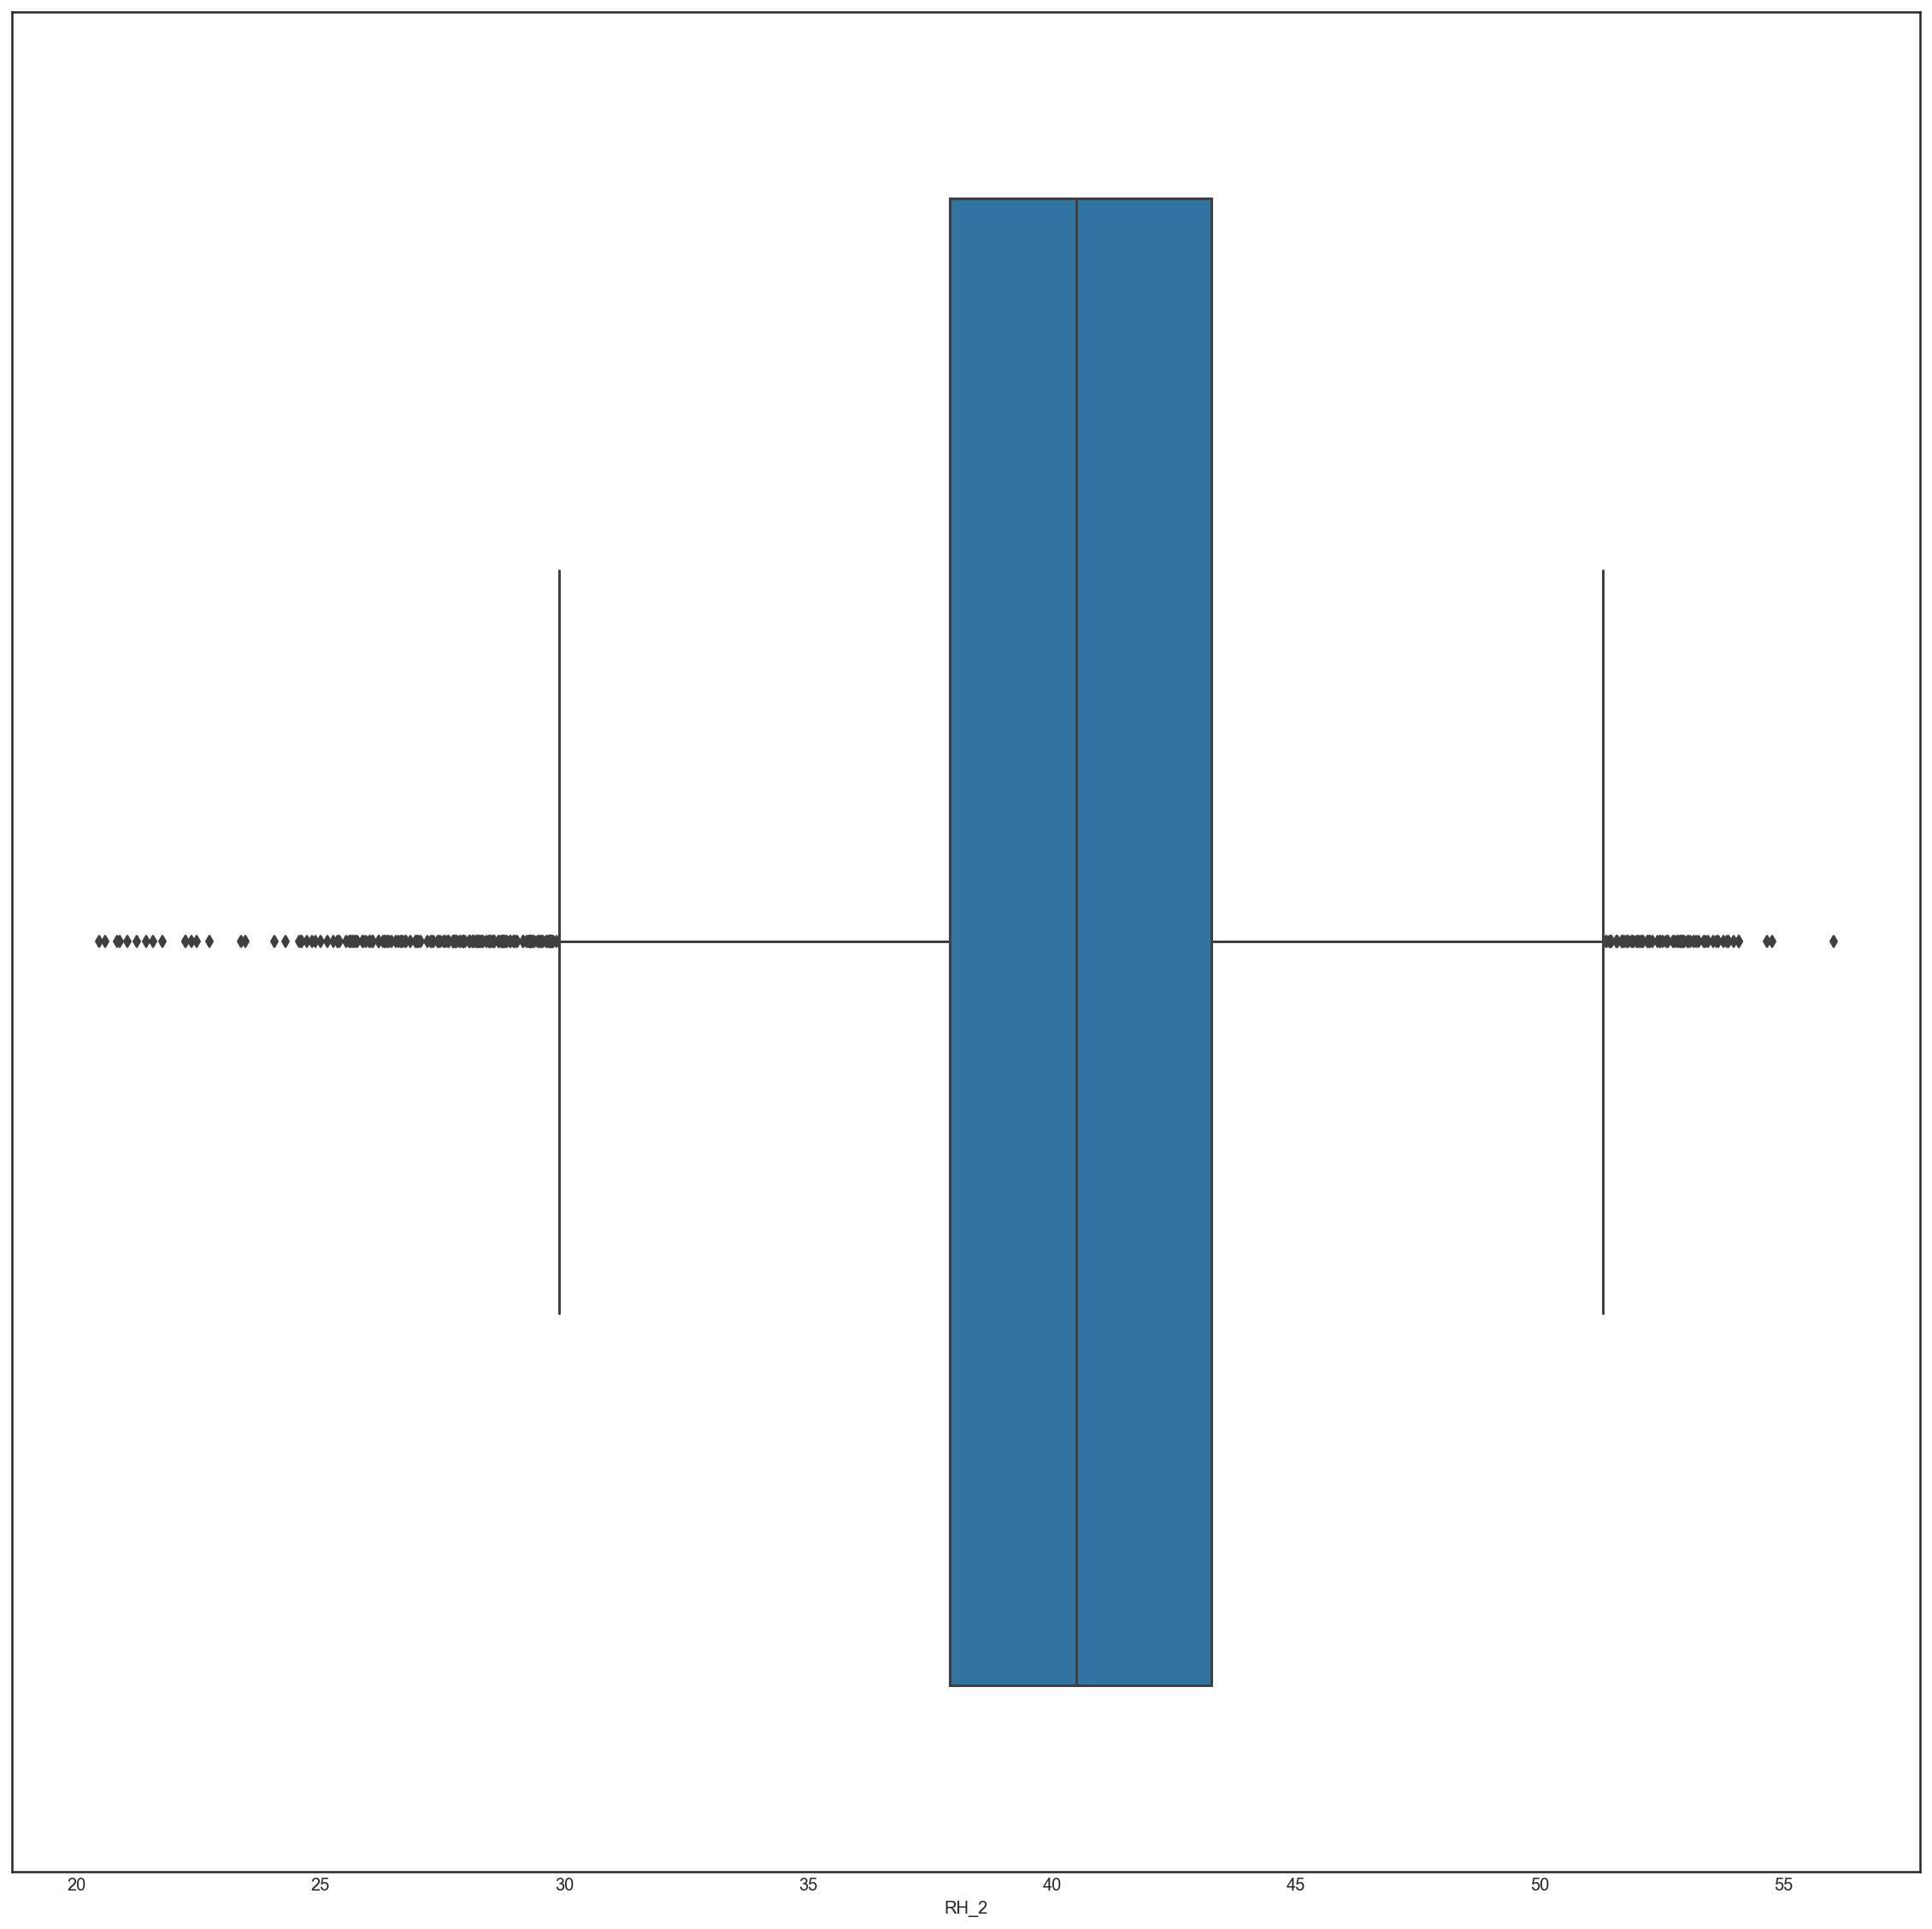

In [26]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax3 = sns.boxplot(x="RH_2", data=phase)

### T3 RH_3

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


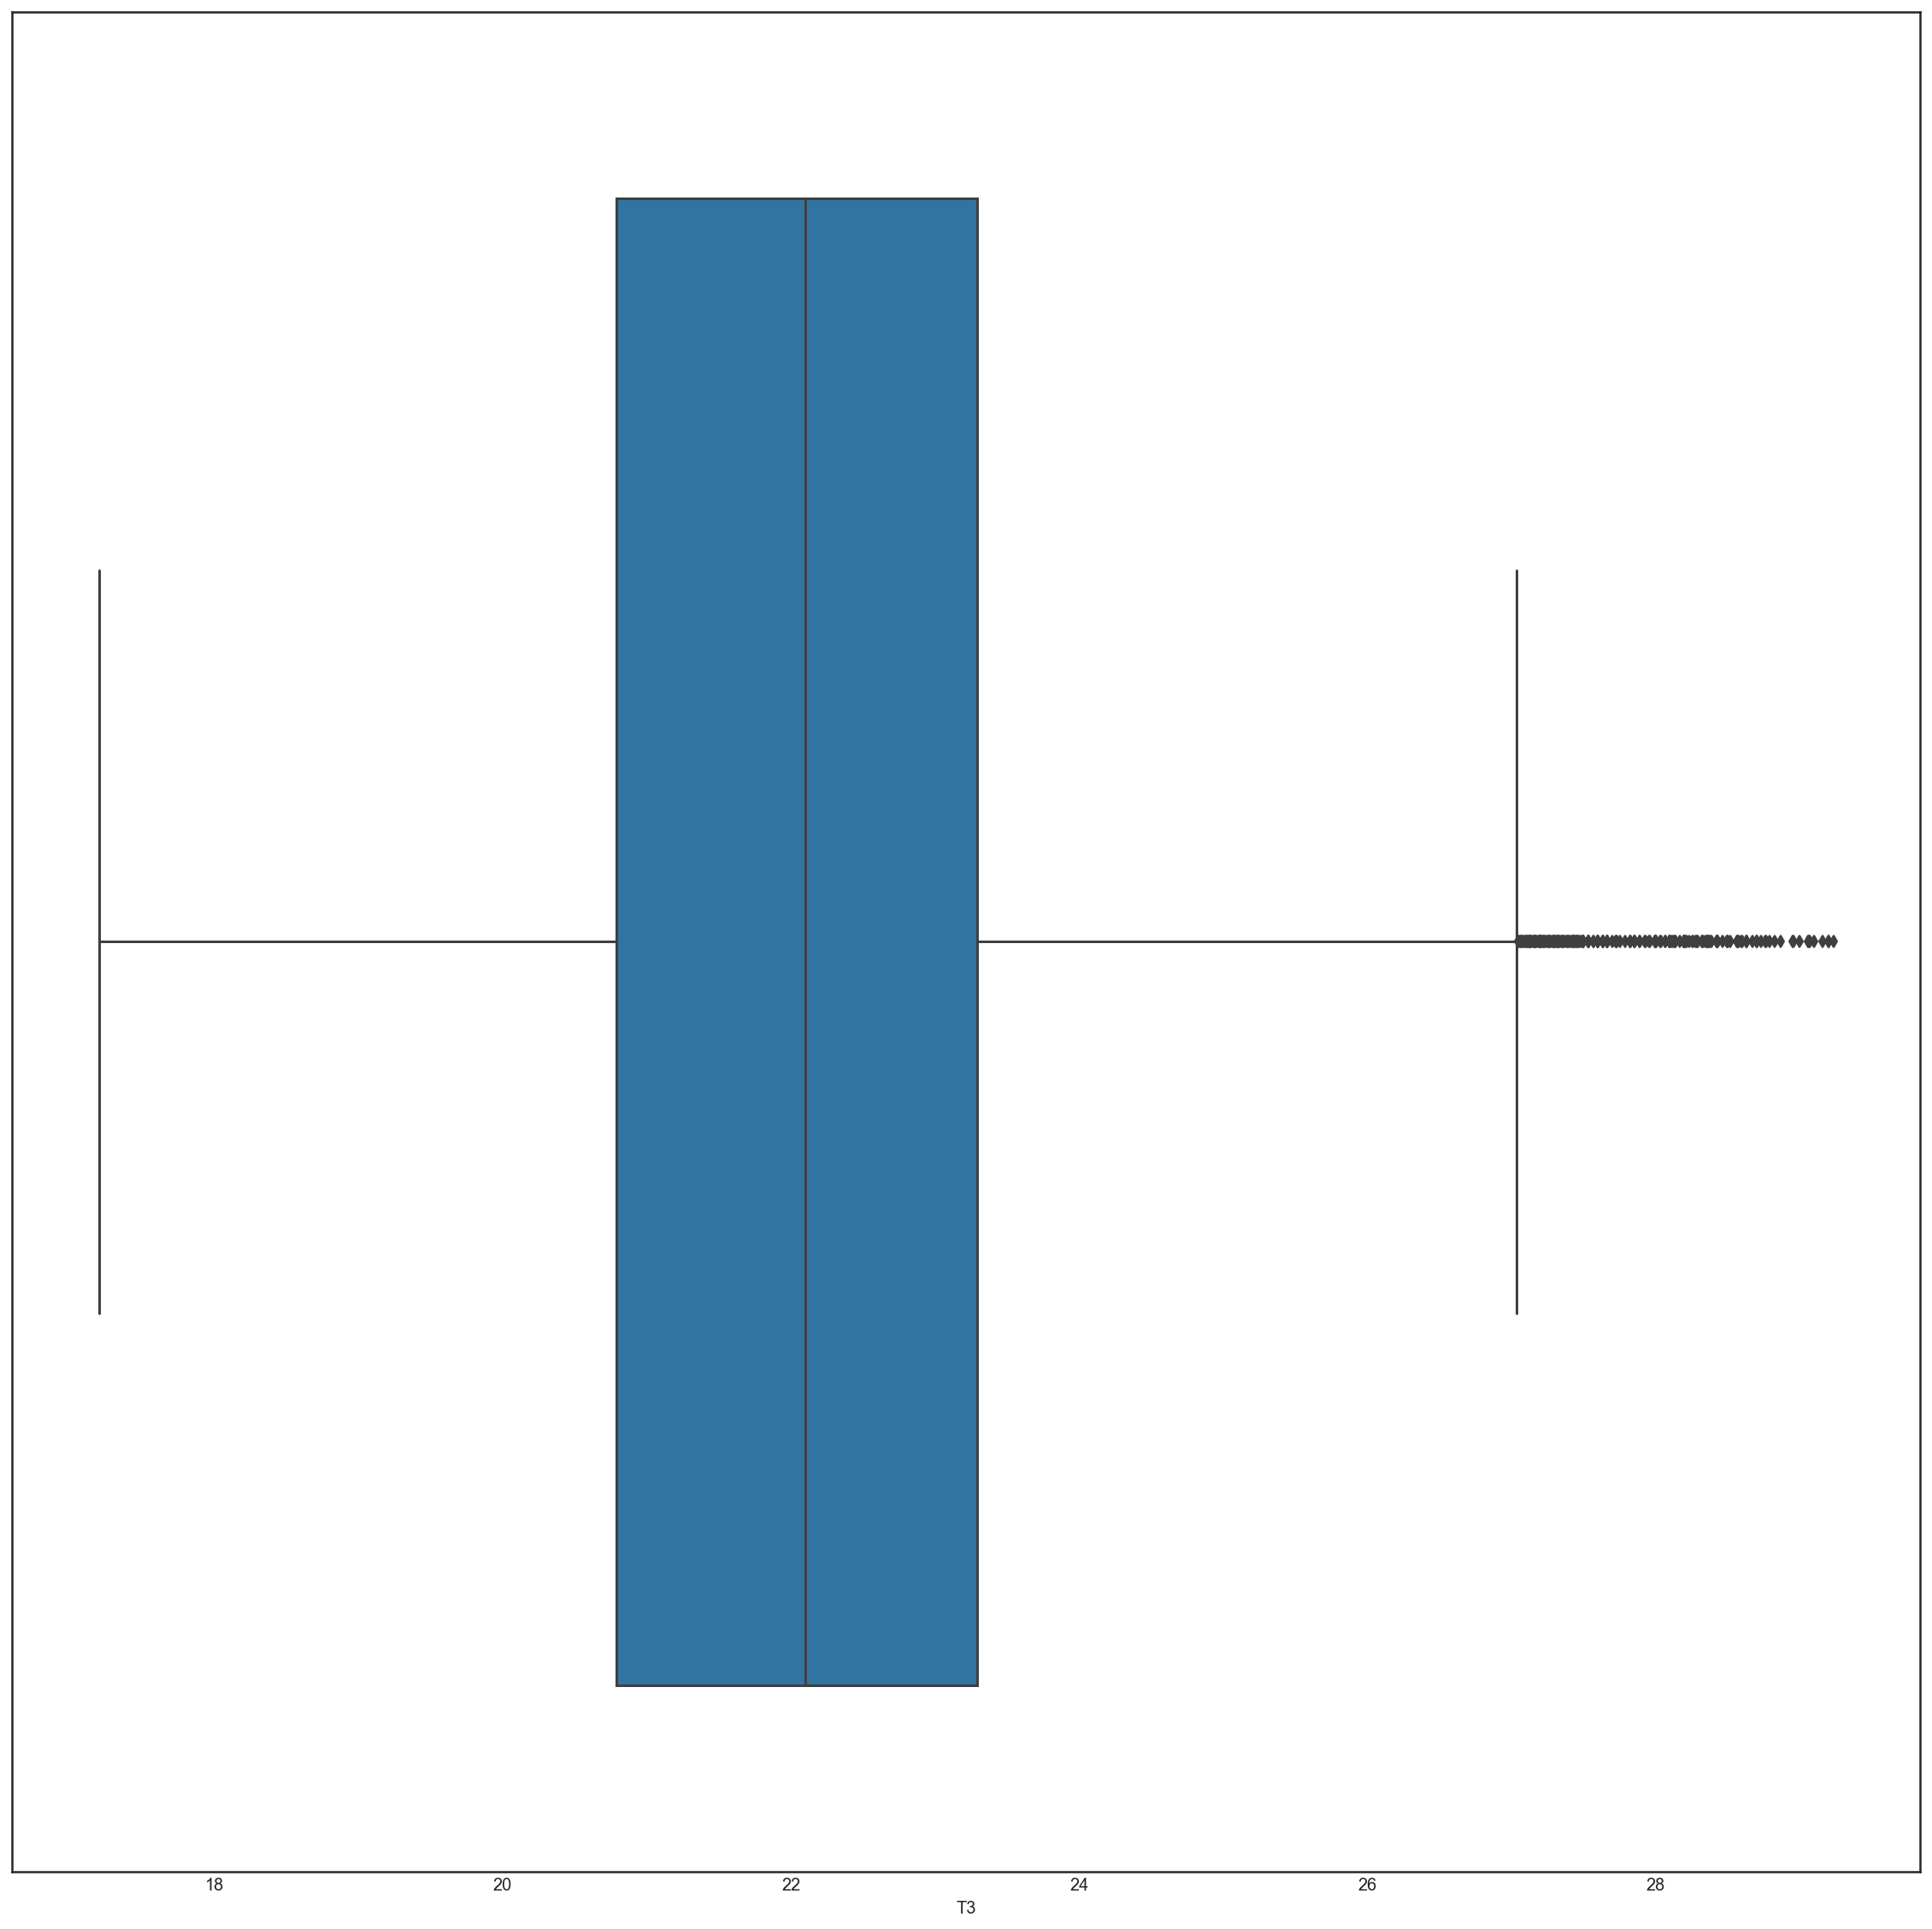

In [27]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax3 = sns.boxplot(x="T3", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


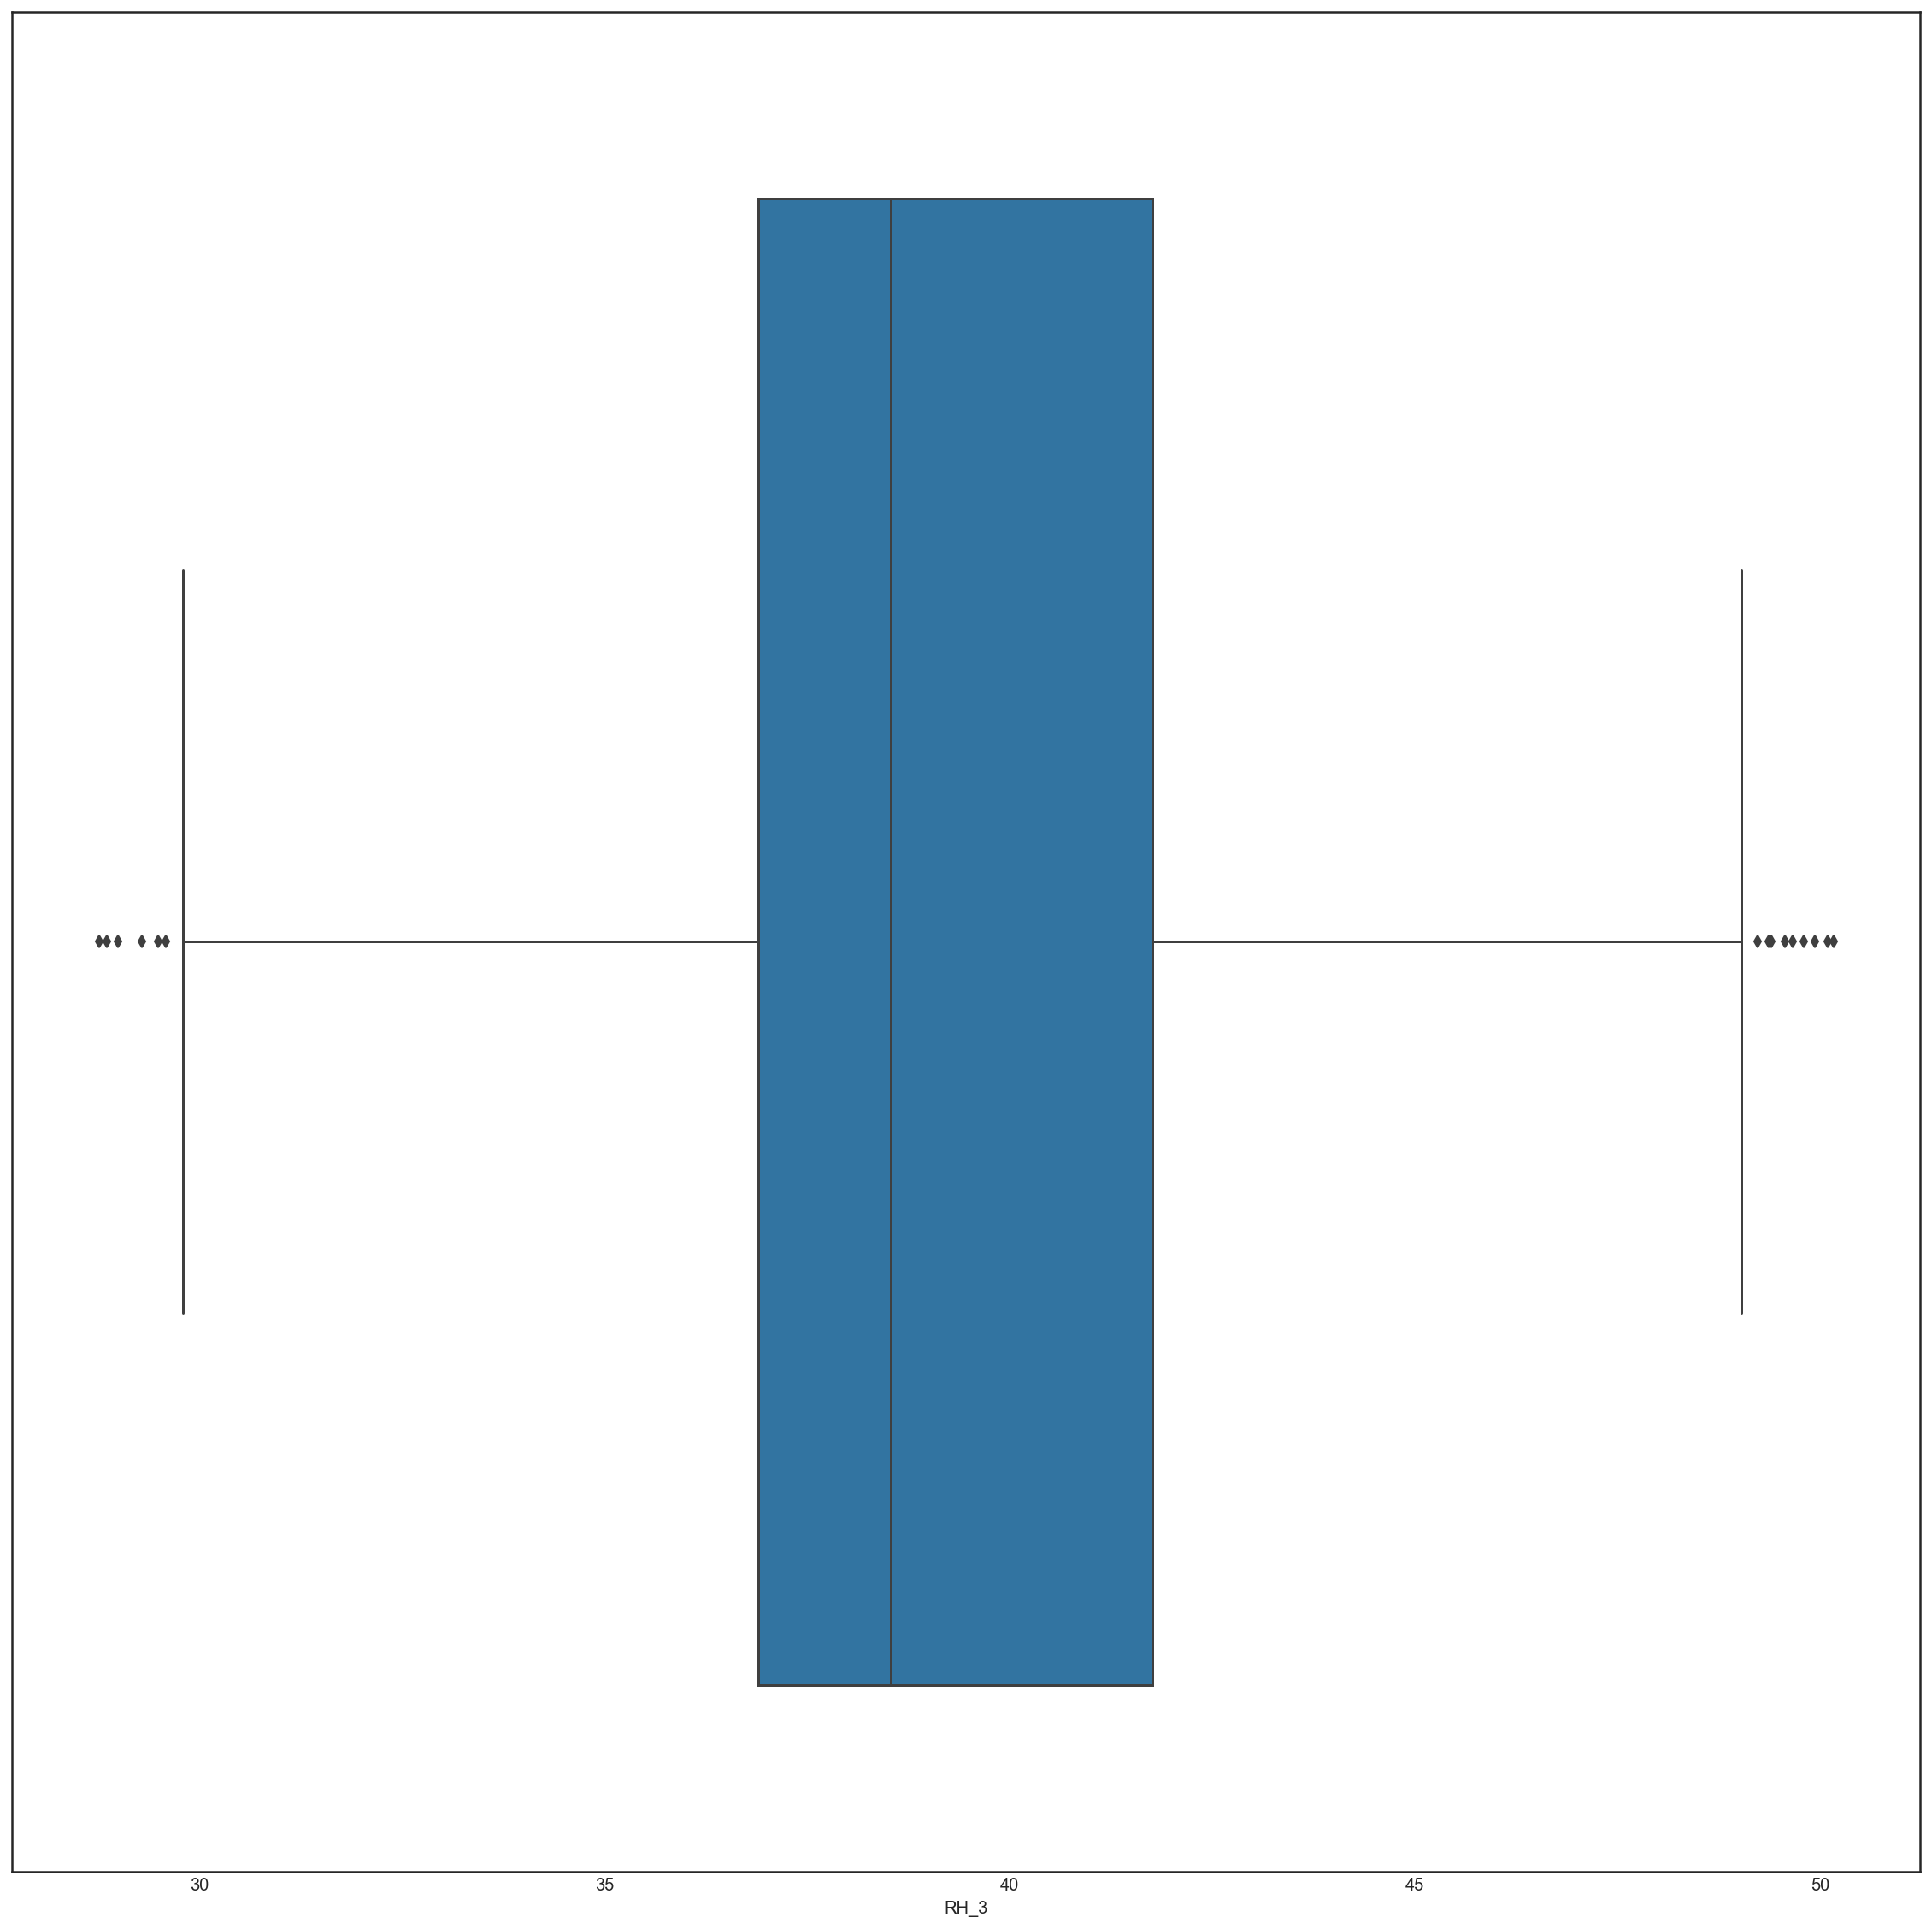

In [28]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax4 = sns.boxplot(x="RH_3", data=phase)

### T4 RH_4

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


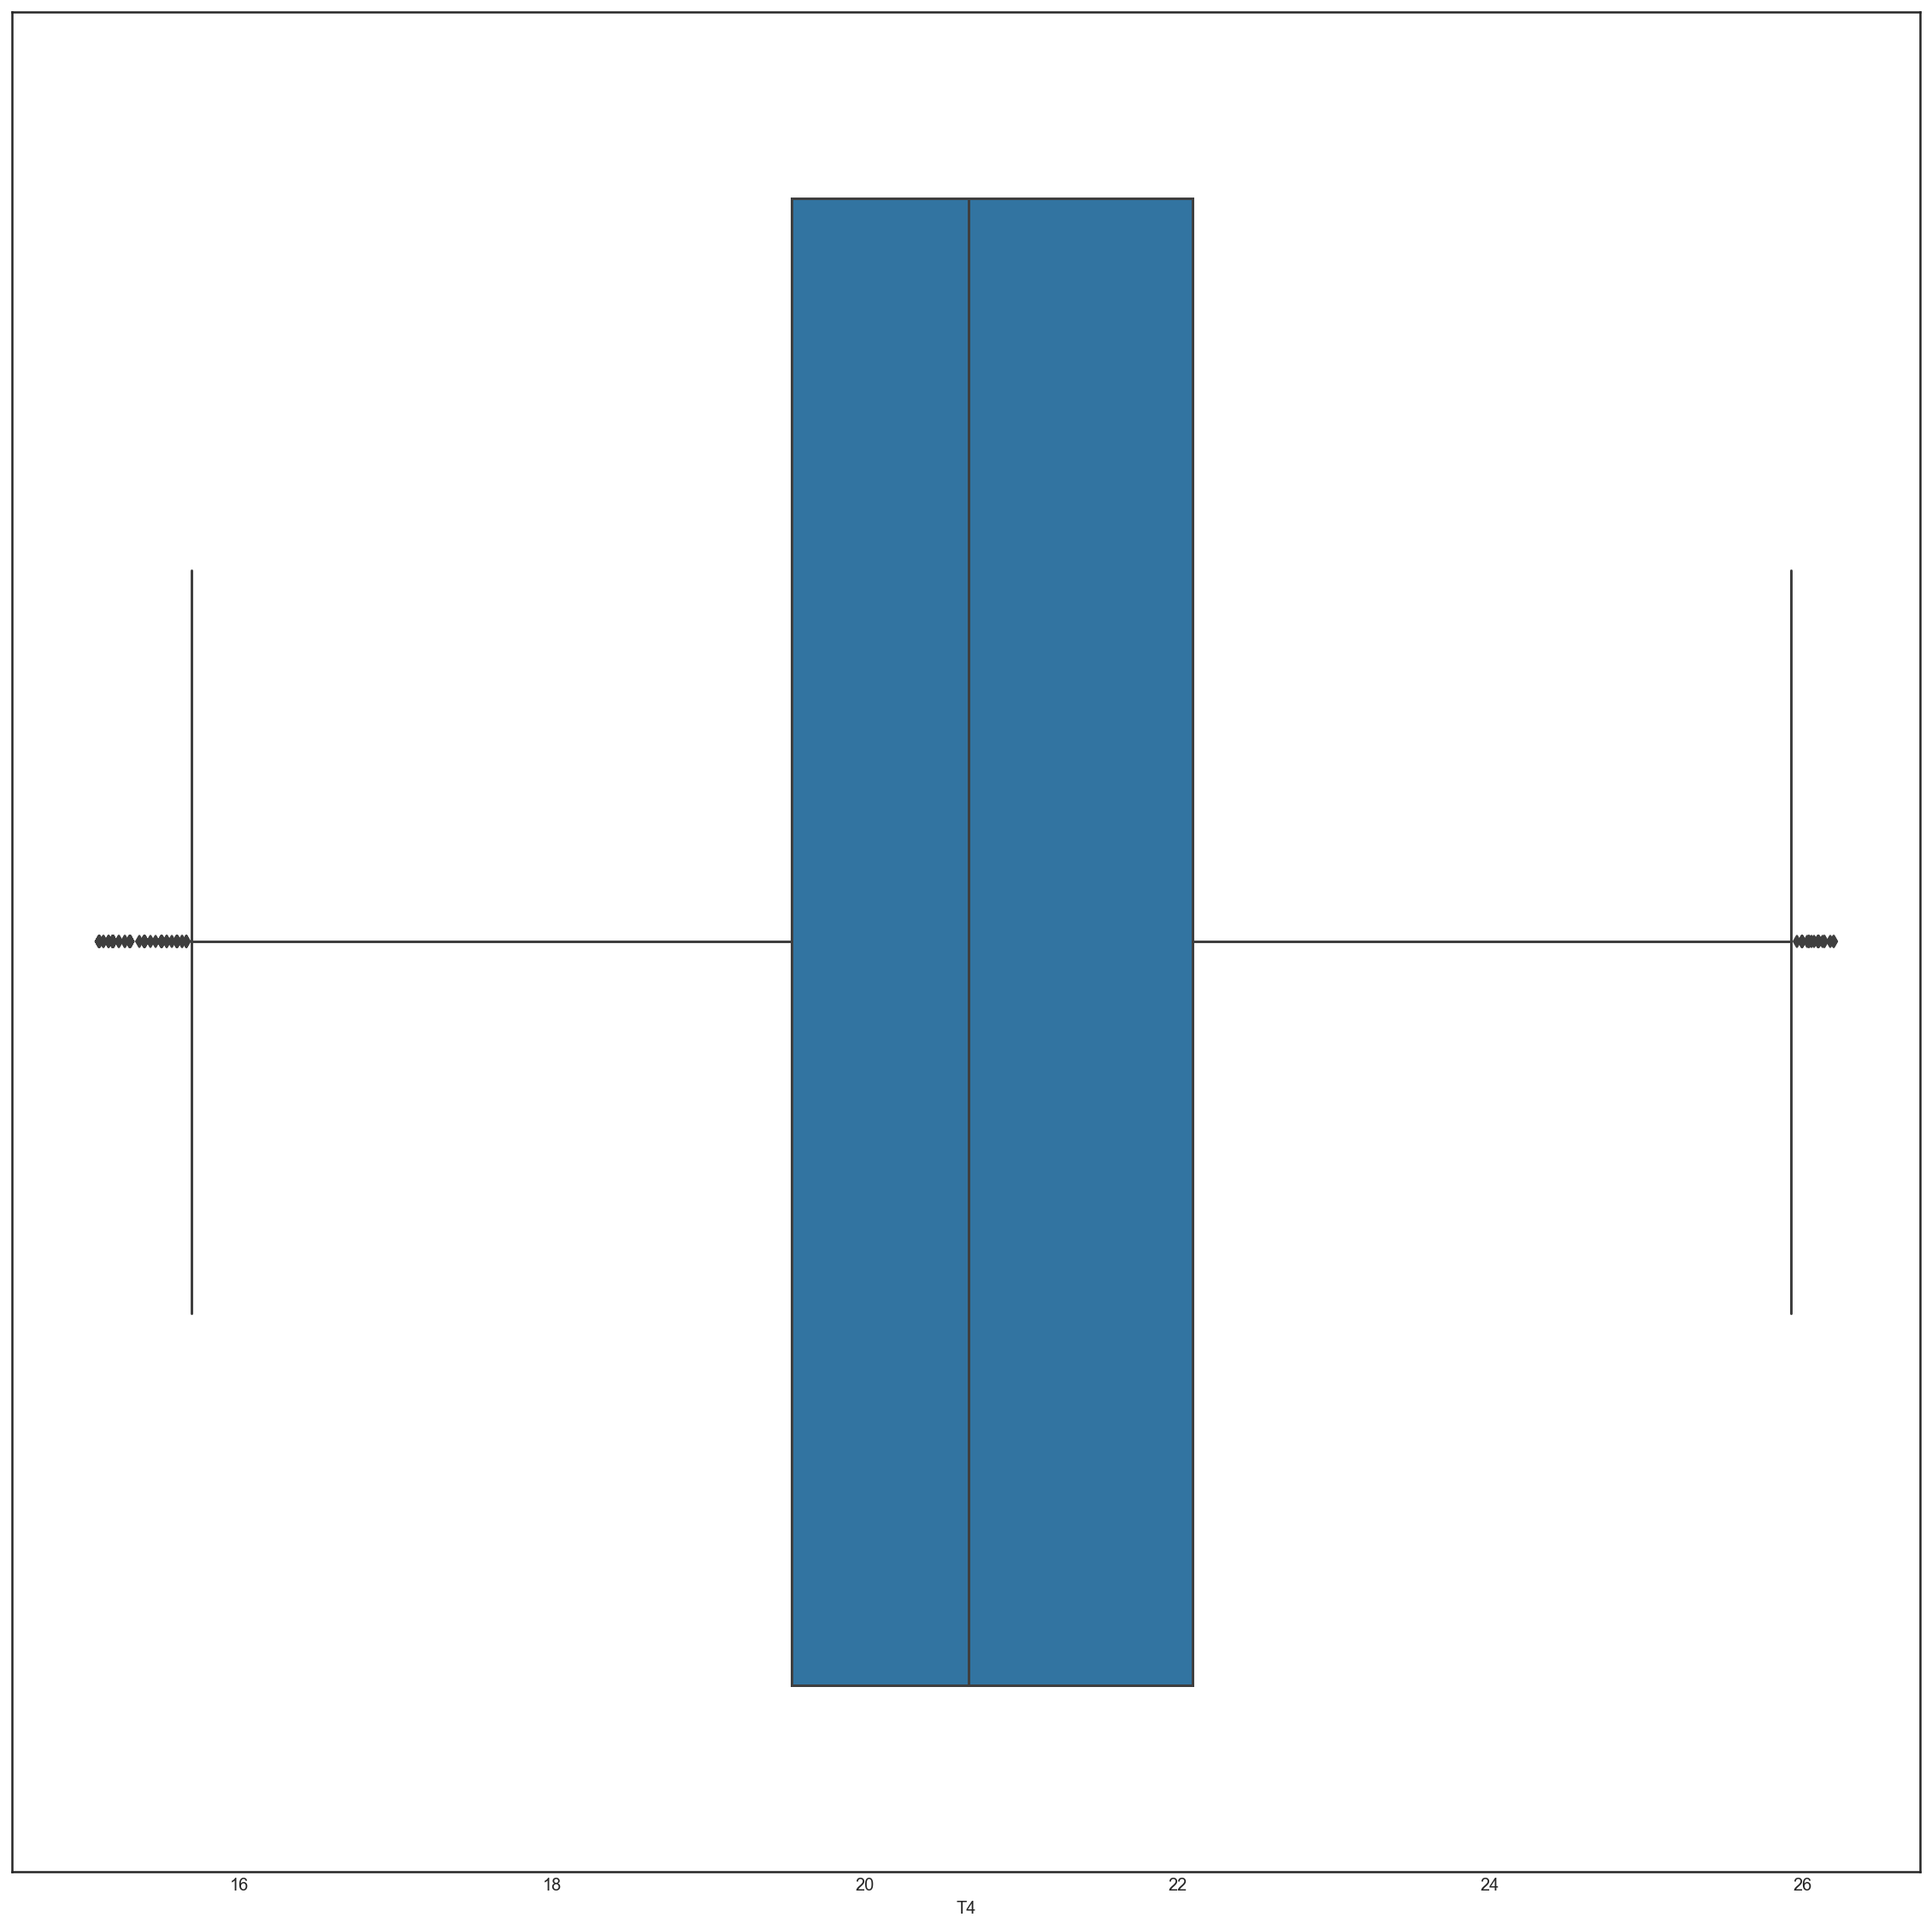

In [29]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax5 = sns.boxplot(x="T4", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


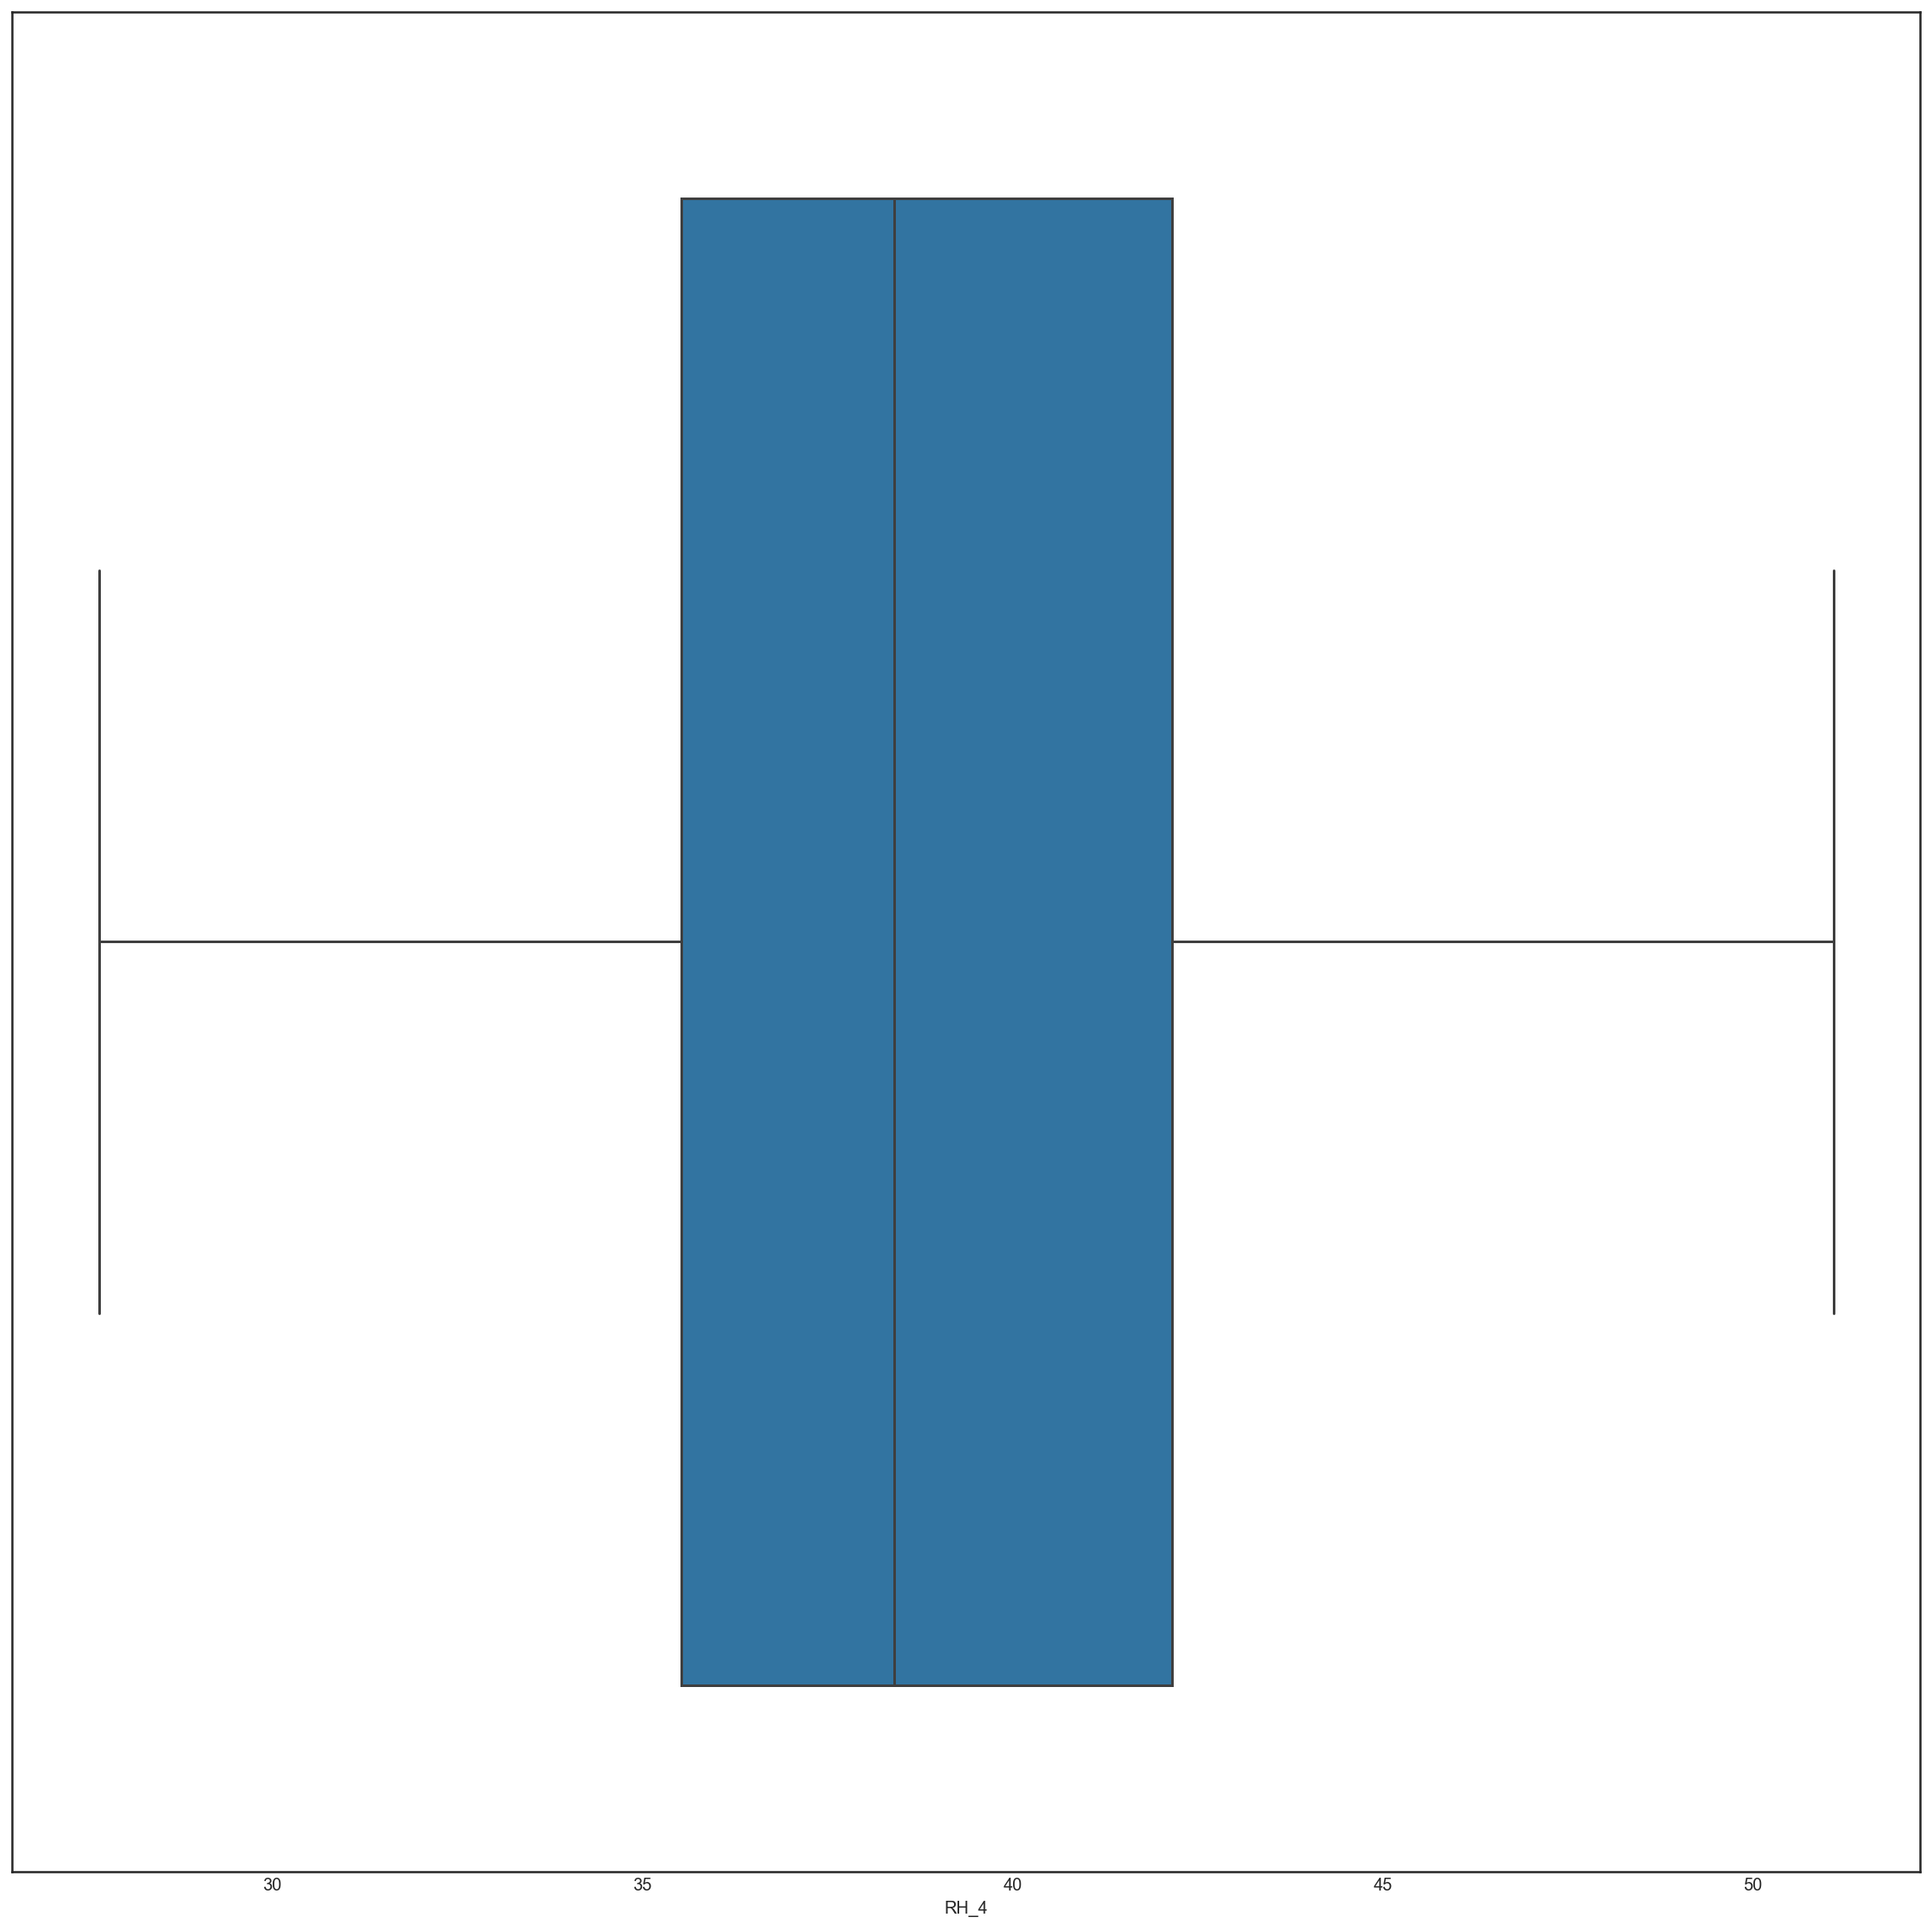

In [30]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax6 = sns.boxplot(x="RH_4", data=phase)

### T5 RH_5

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


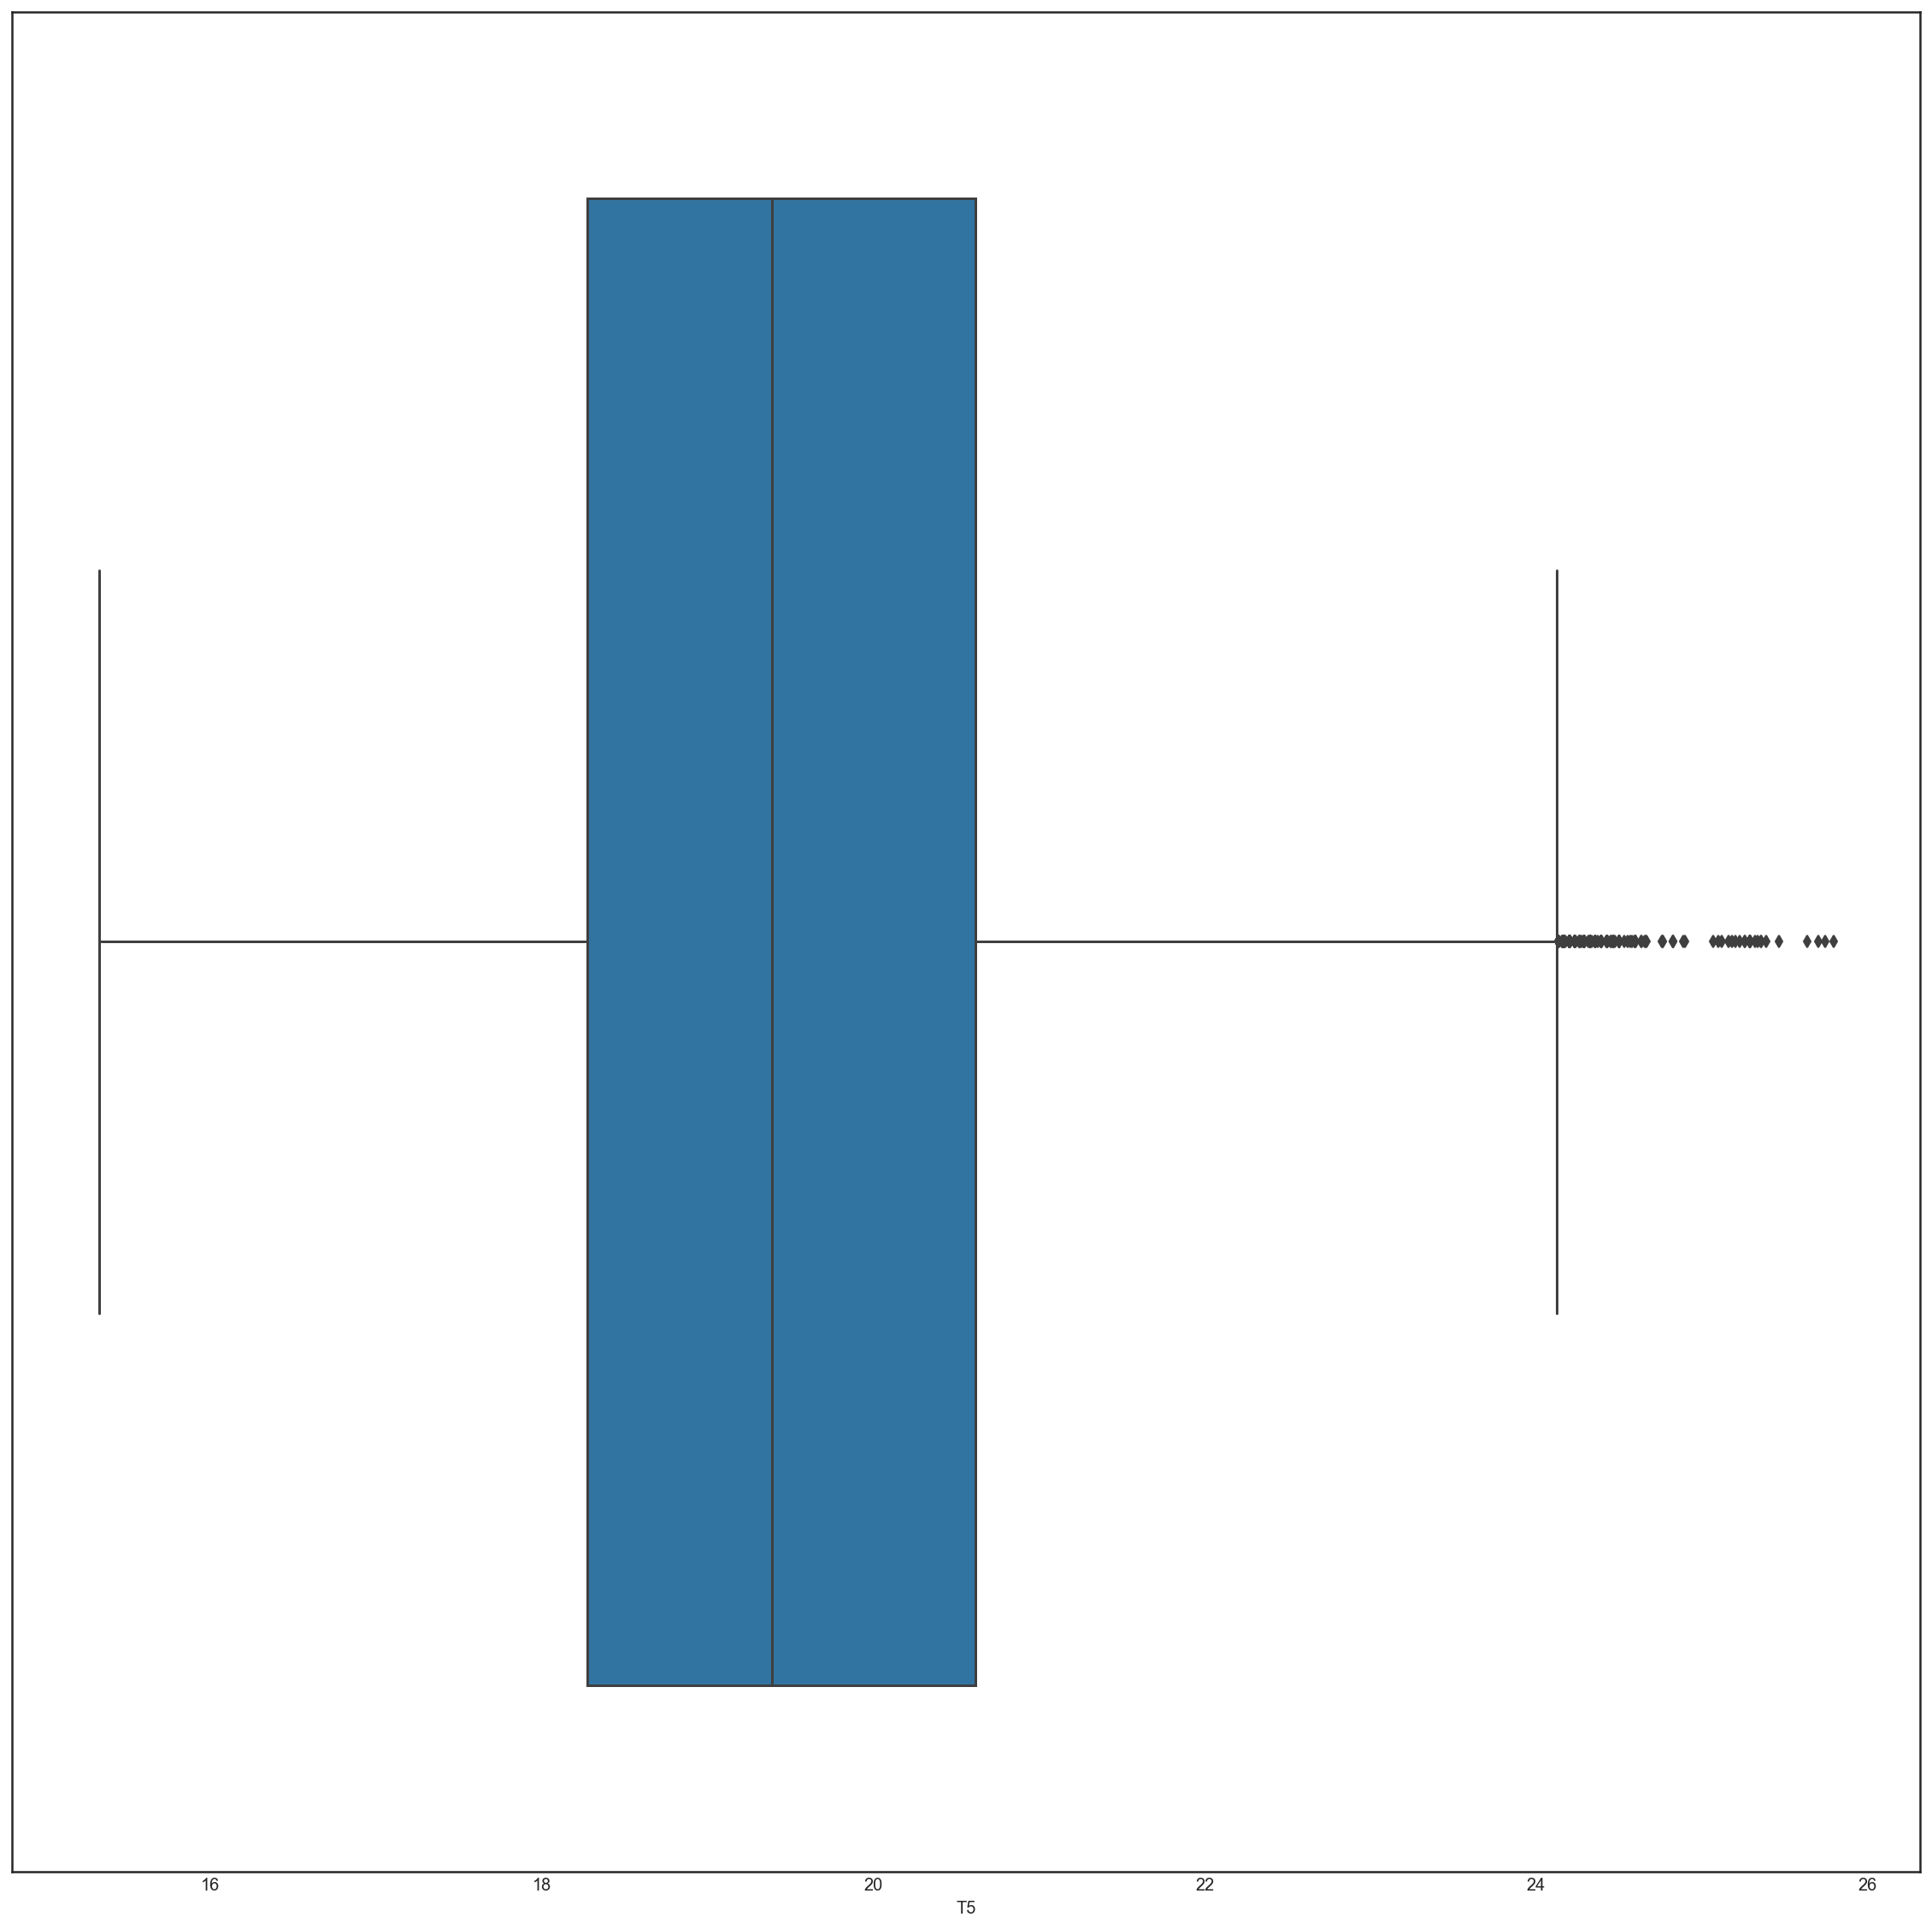

In [31]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax7 = sns.boxplot(x="T5", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


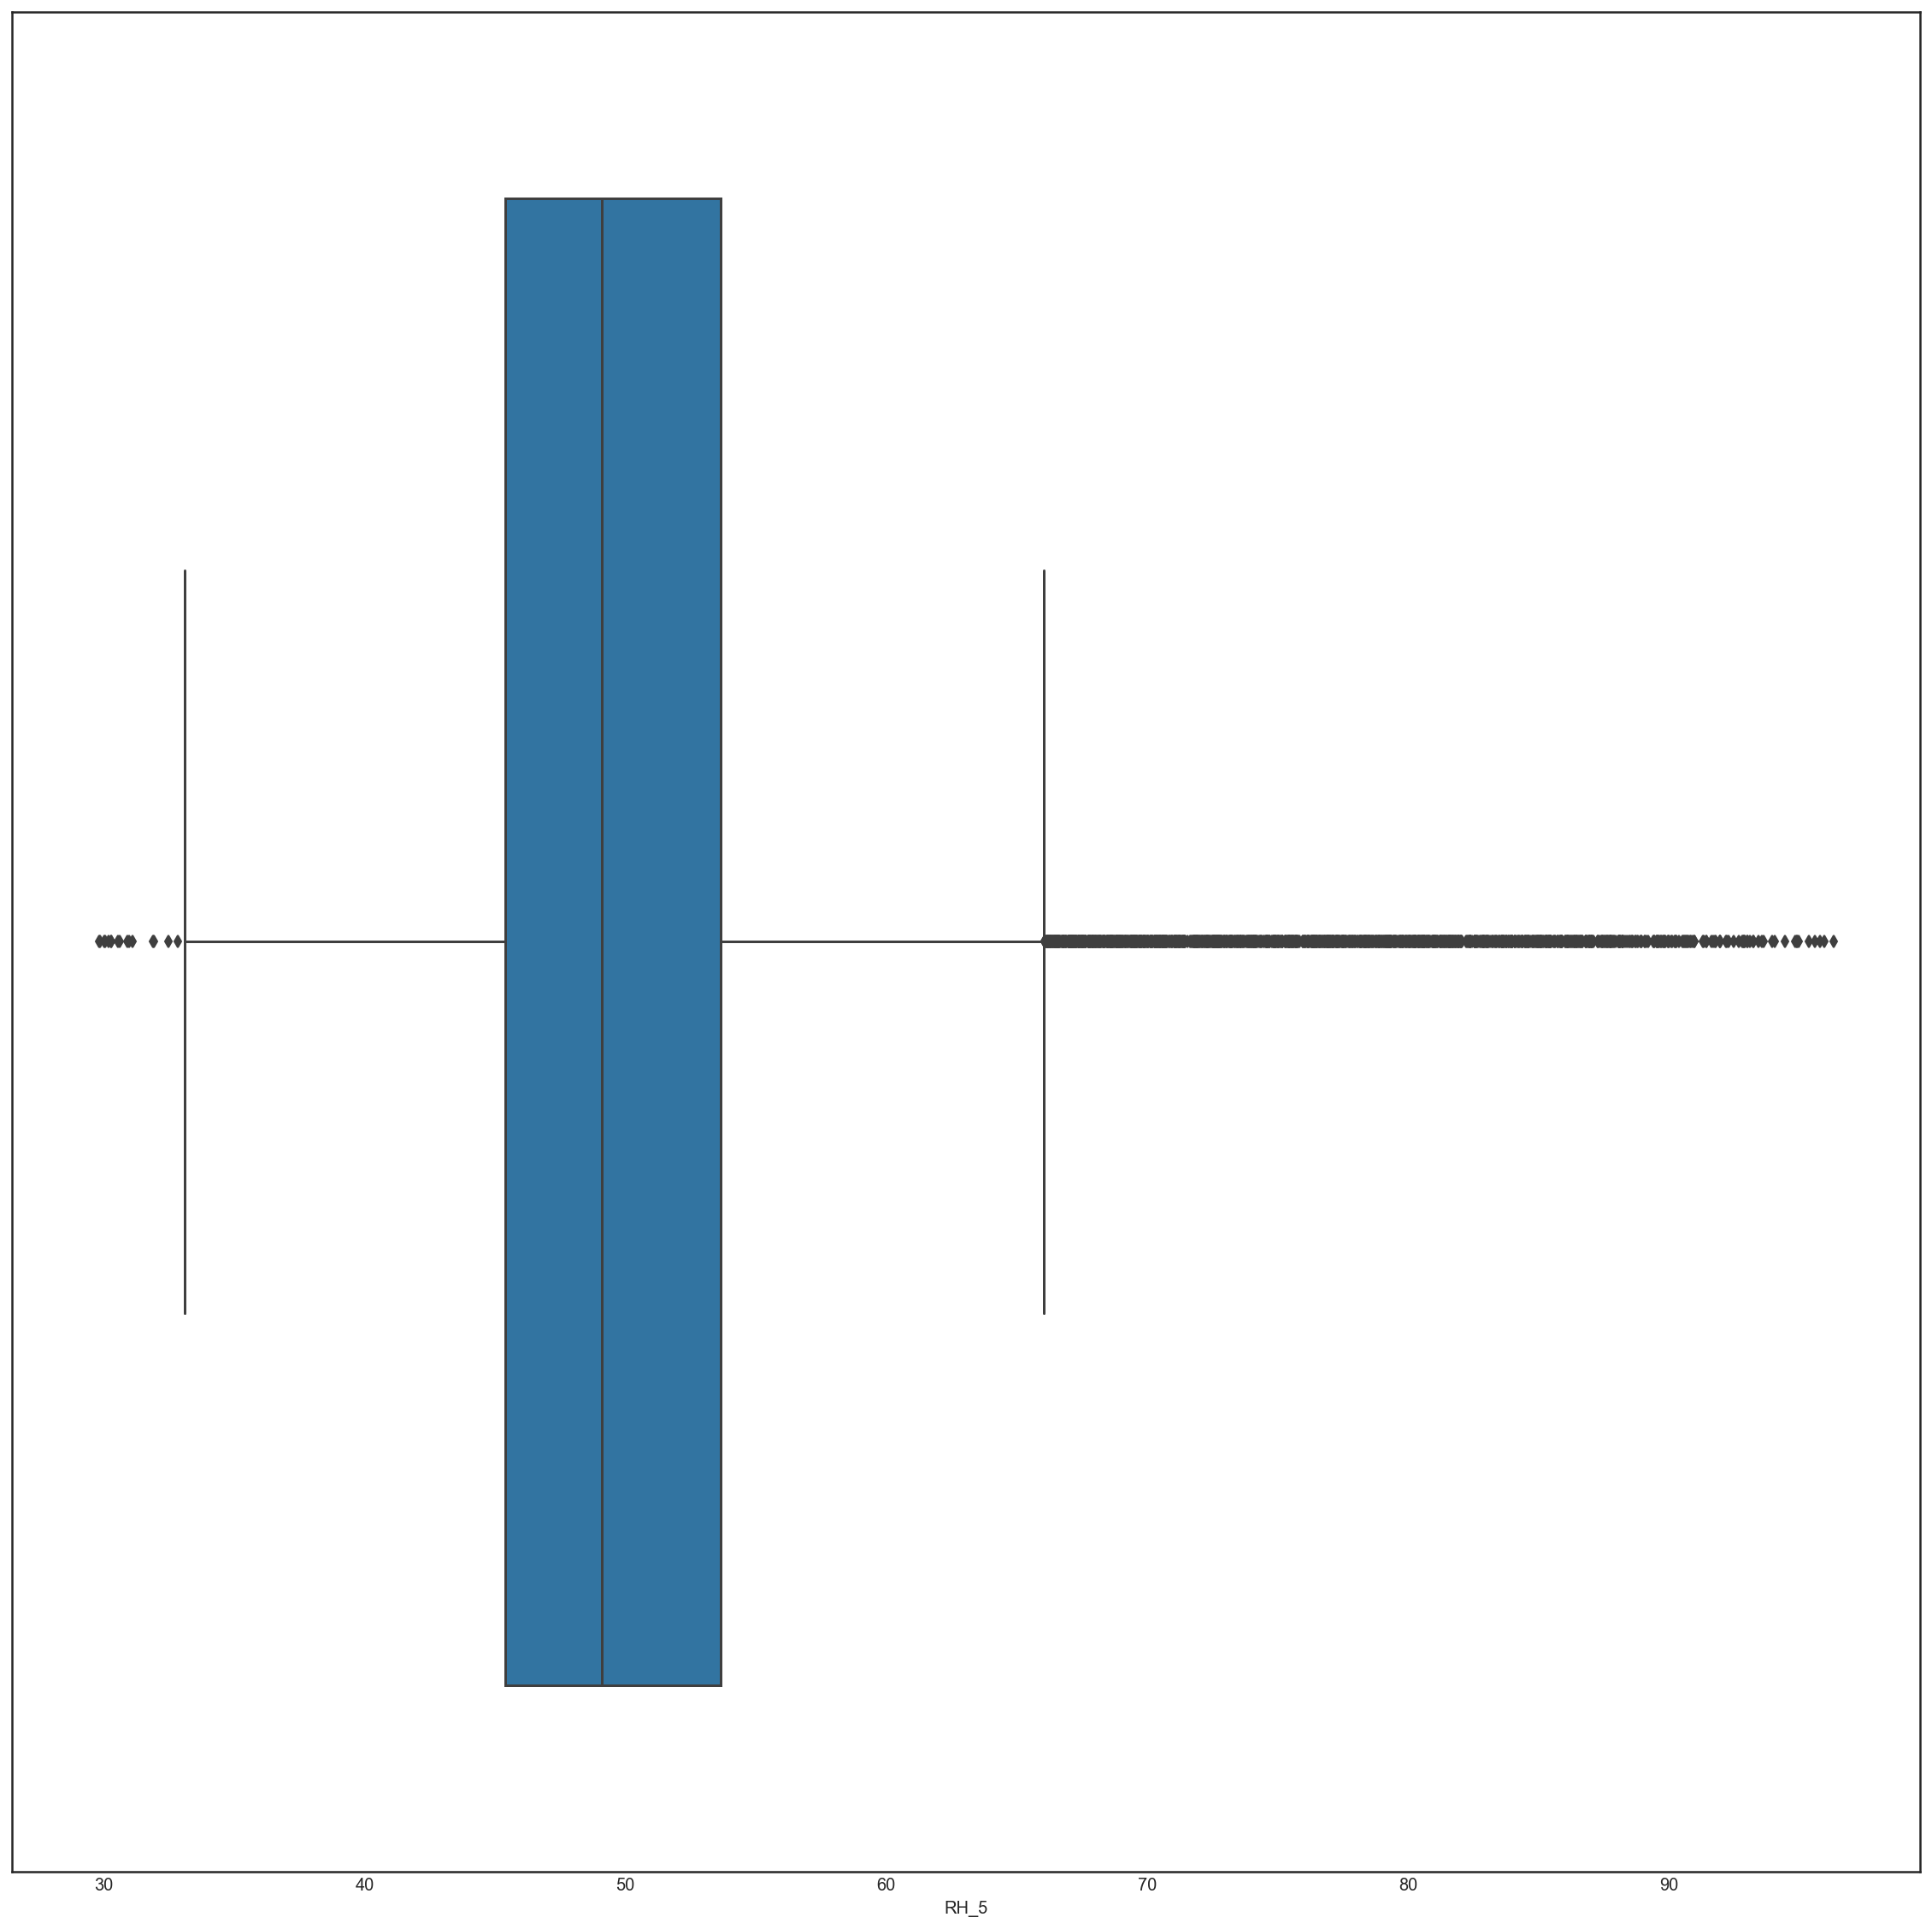

In [32]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax8 = sns.boxplot(x="RH_5", data=phase)

### T6 RH_6

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


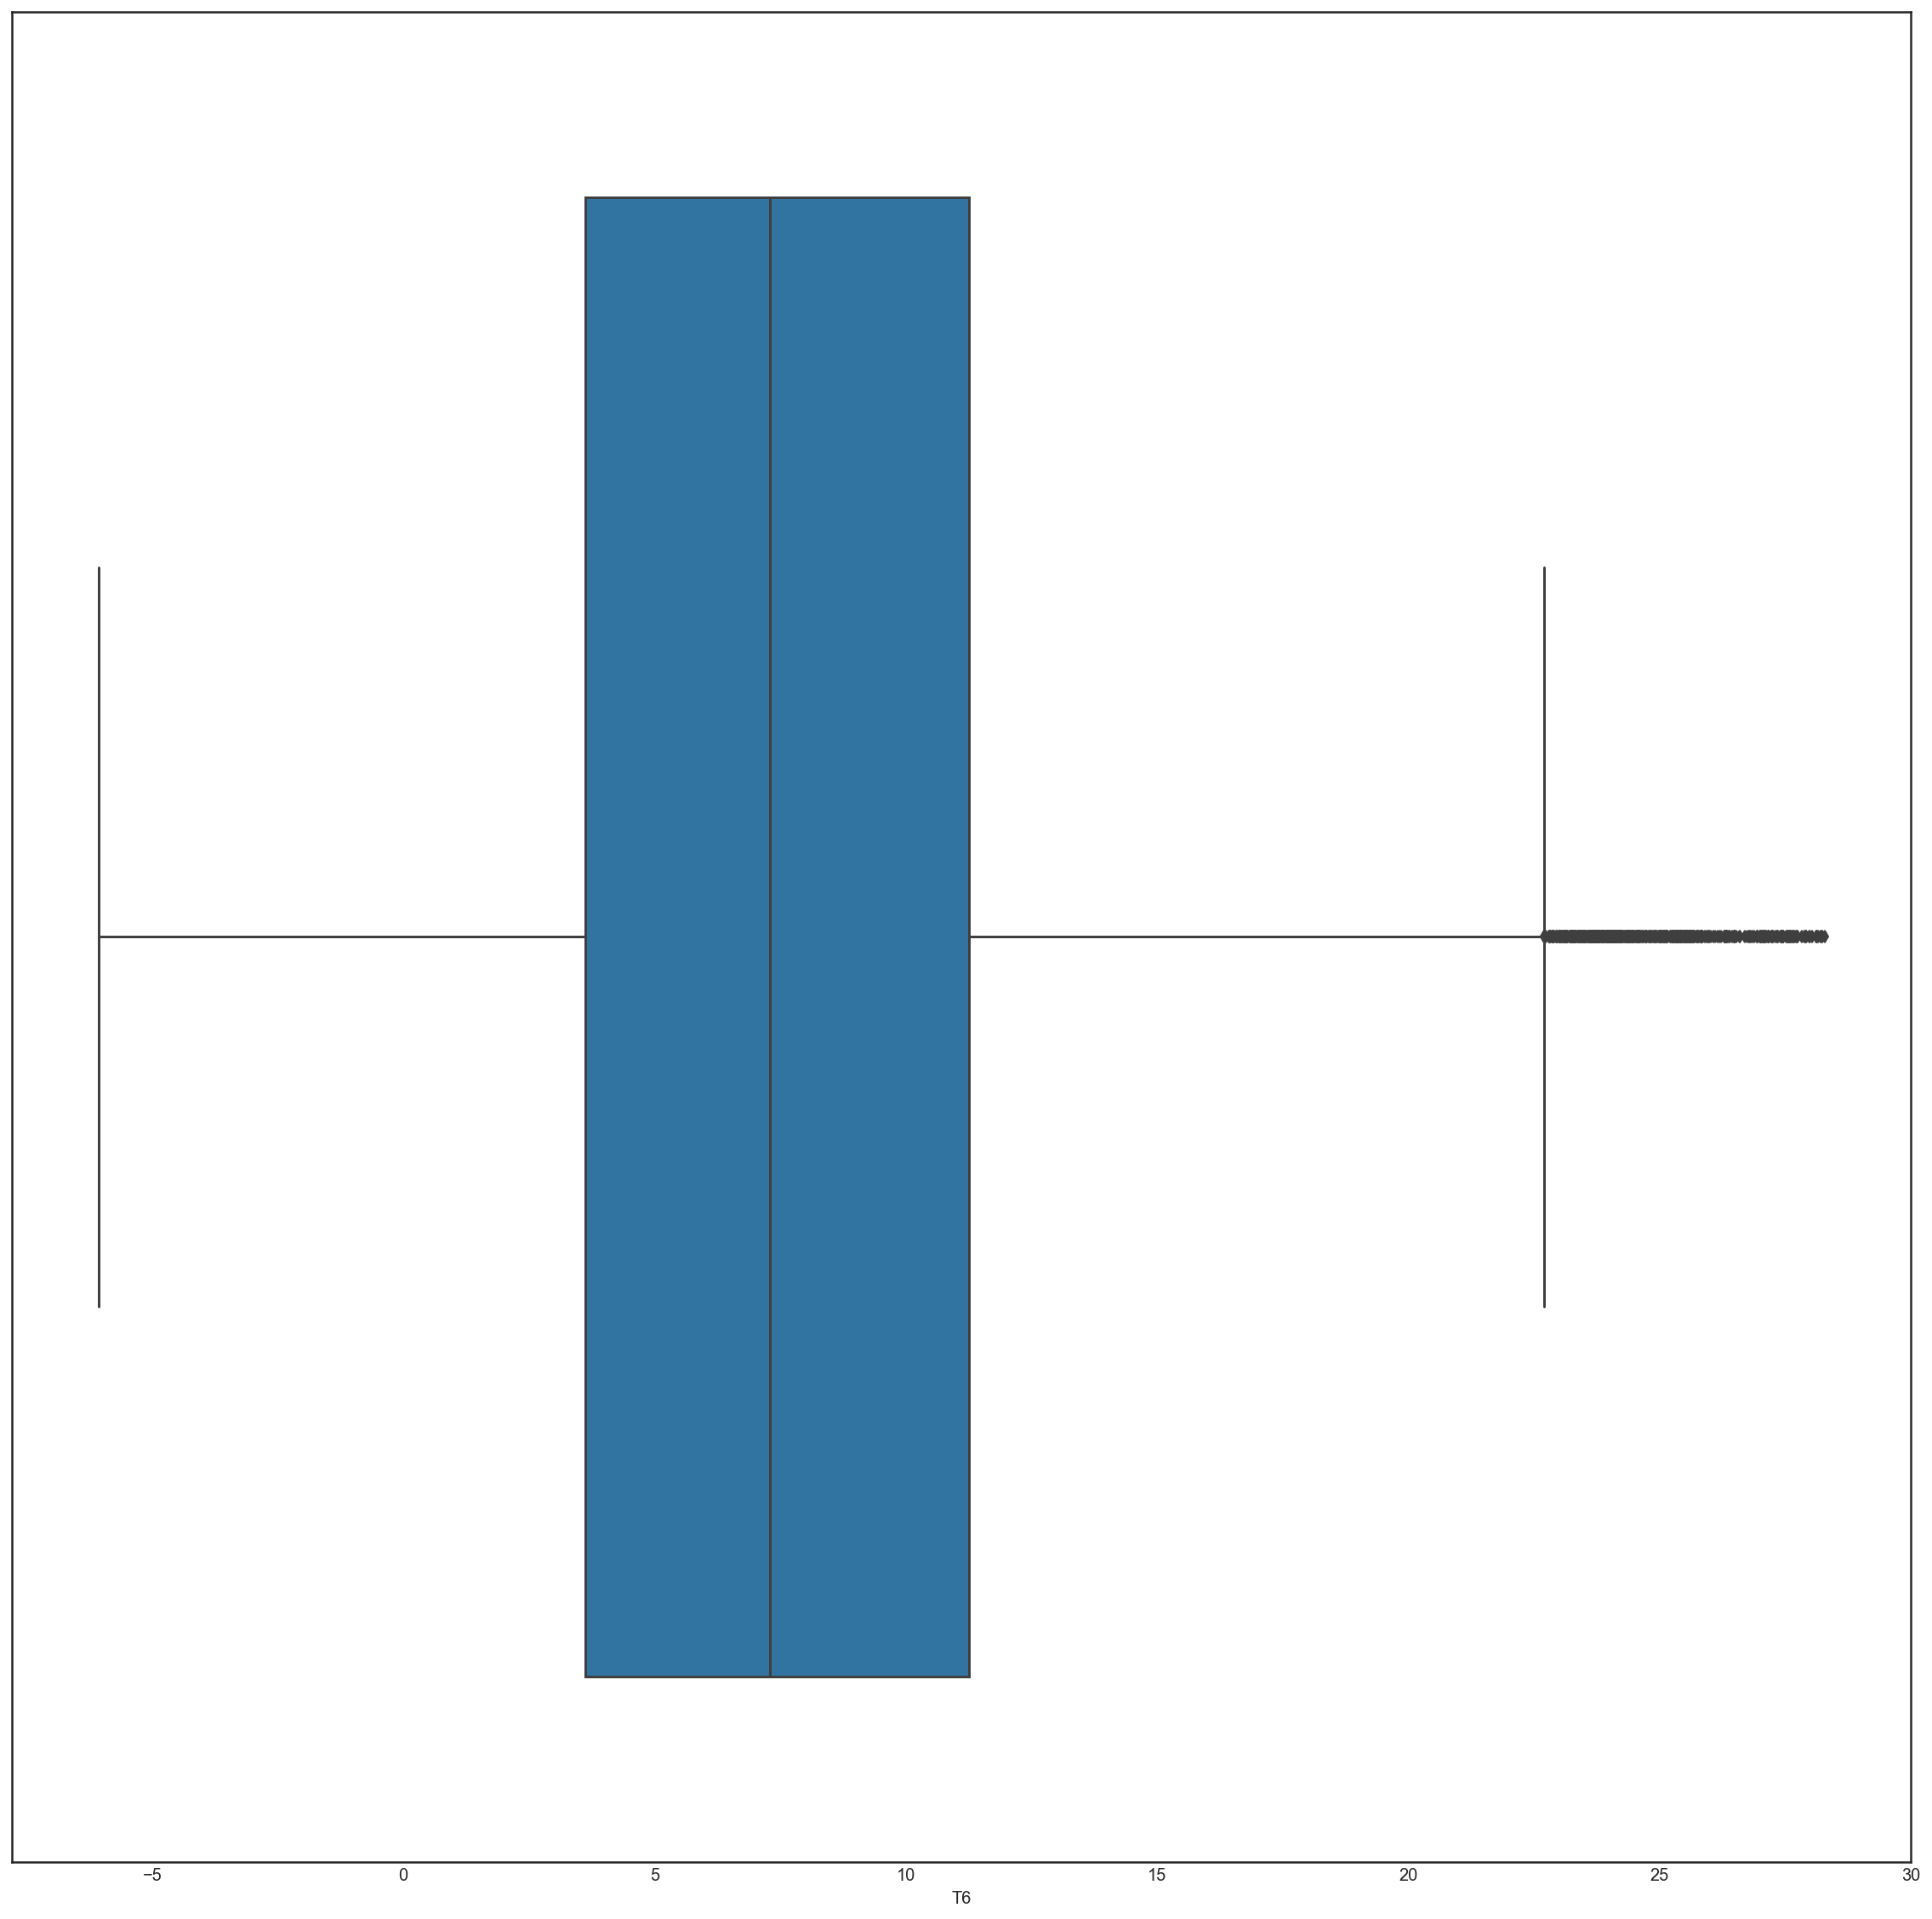

In [33]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax9 = sns.boxplot(x="T6", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


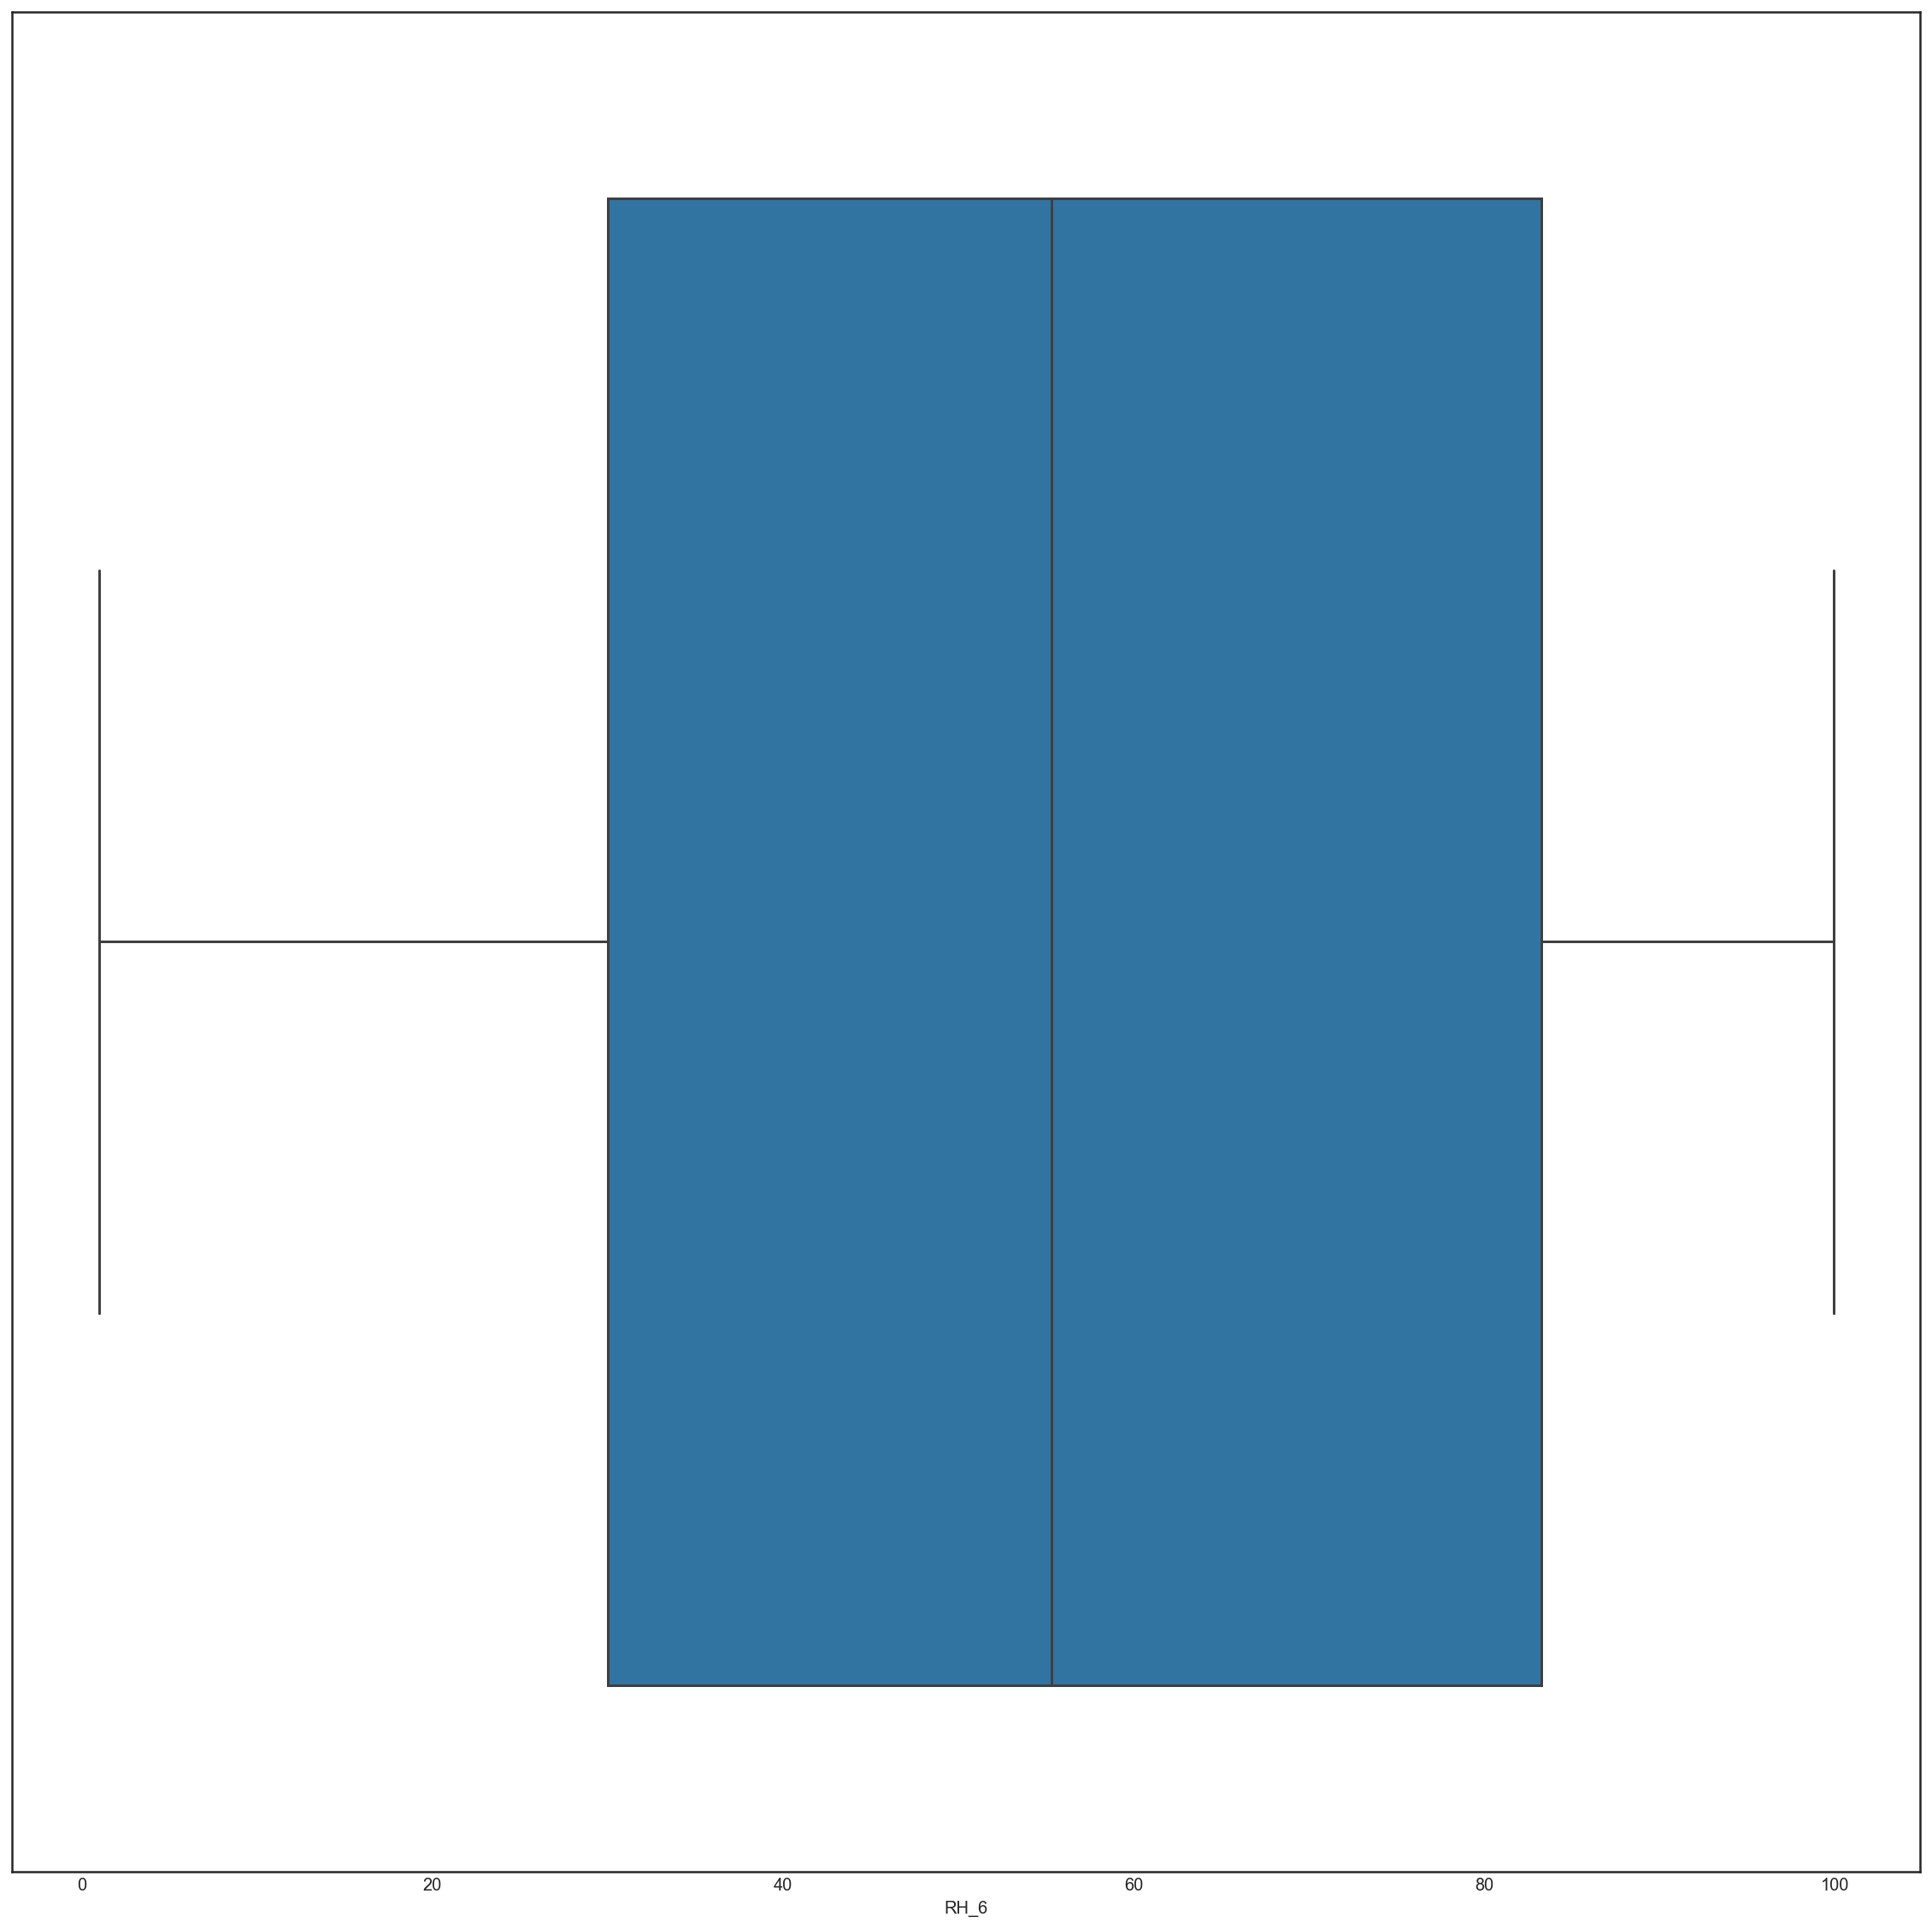

In [34]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax10 = sns.boxplot(x="RH_6", data=phase)

### T7 RH_7

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


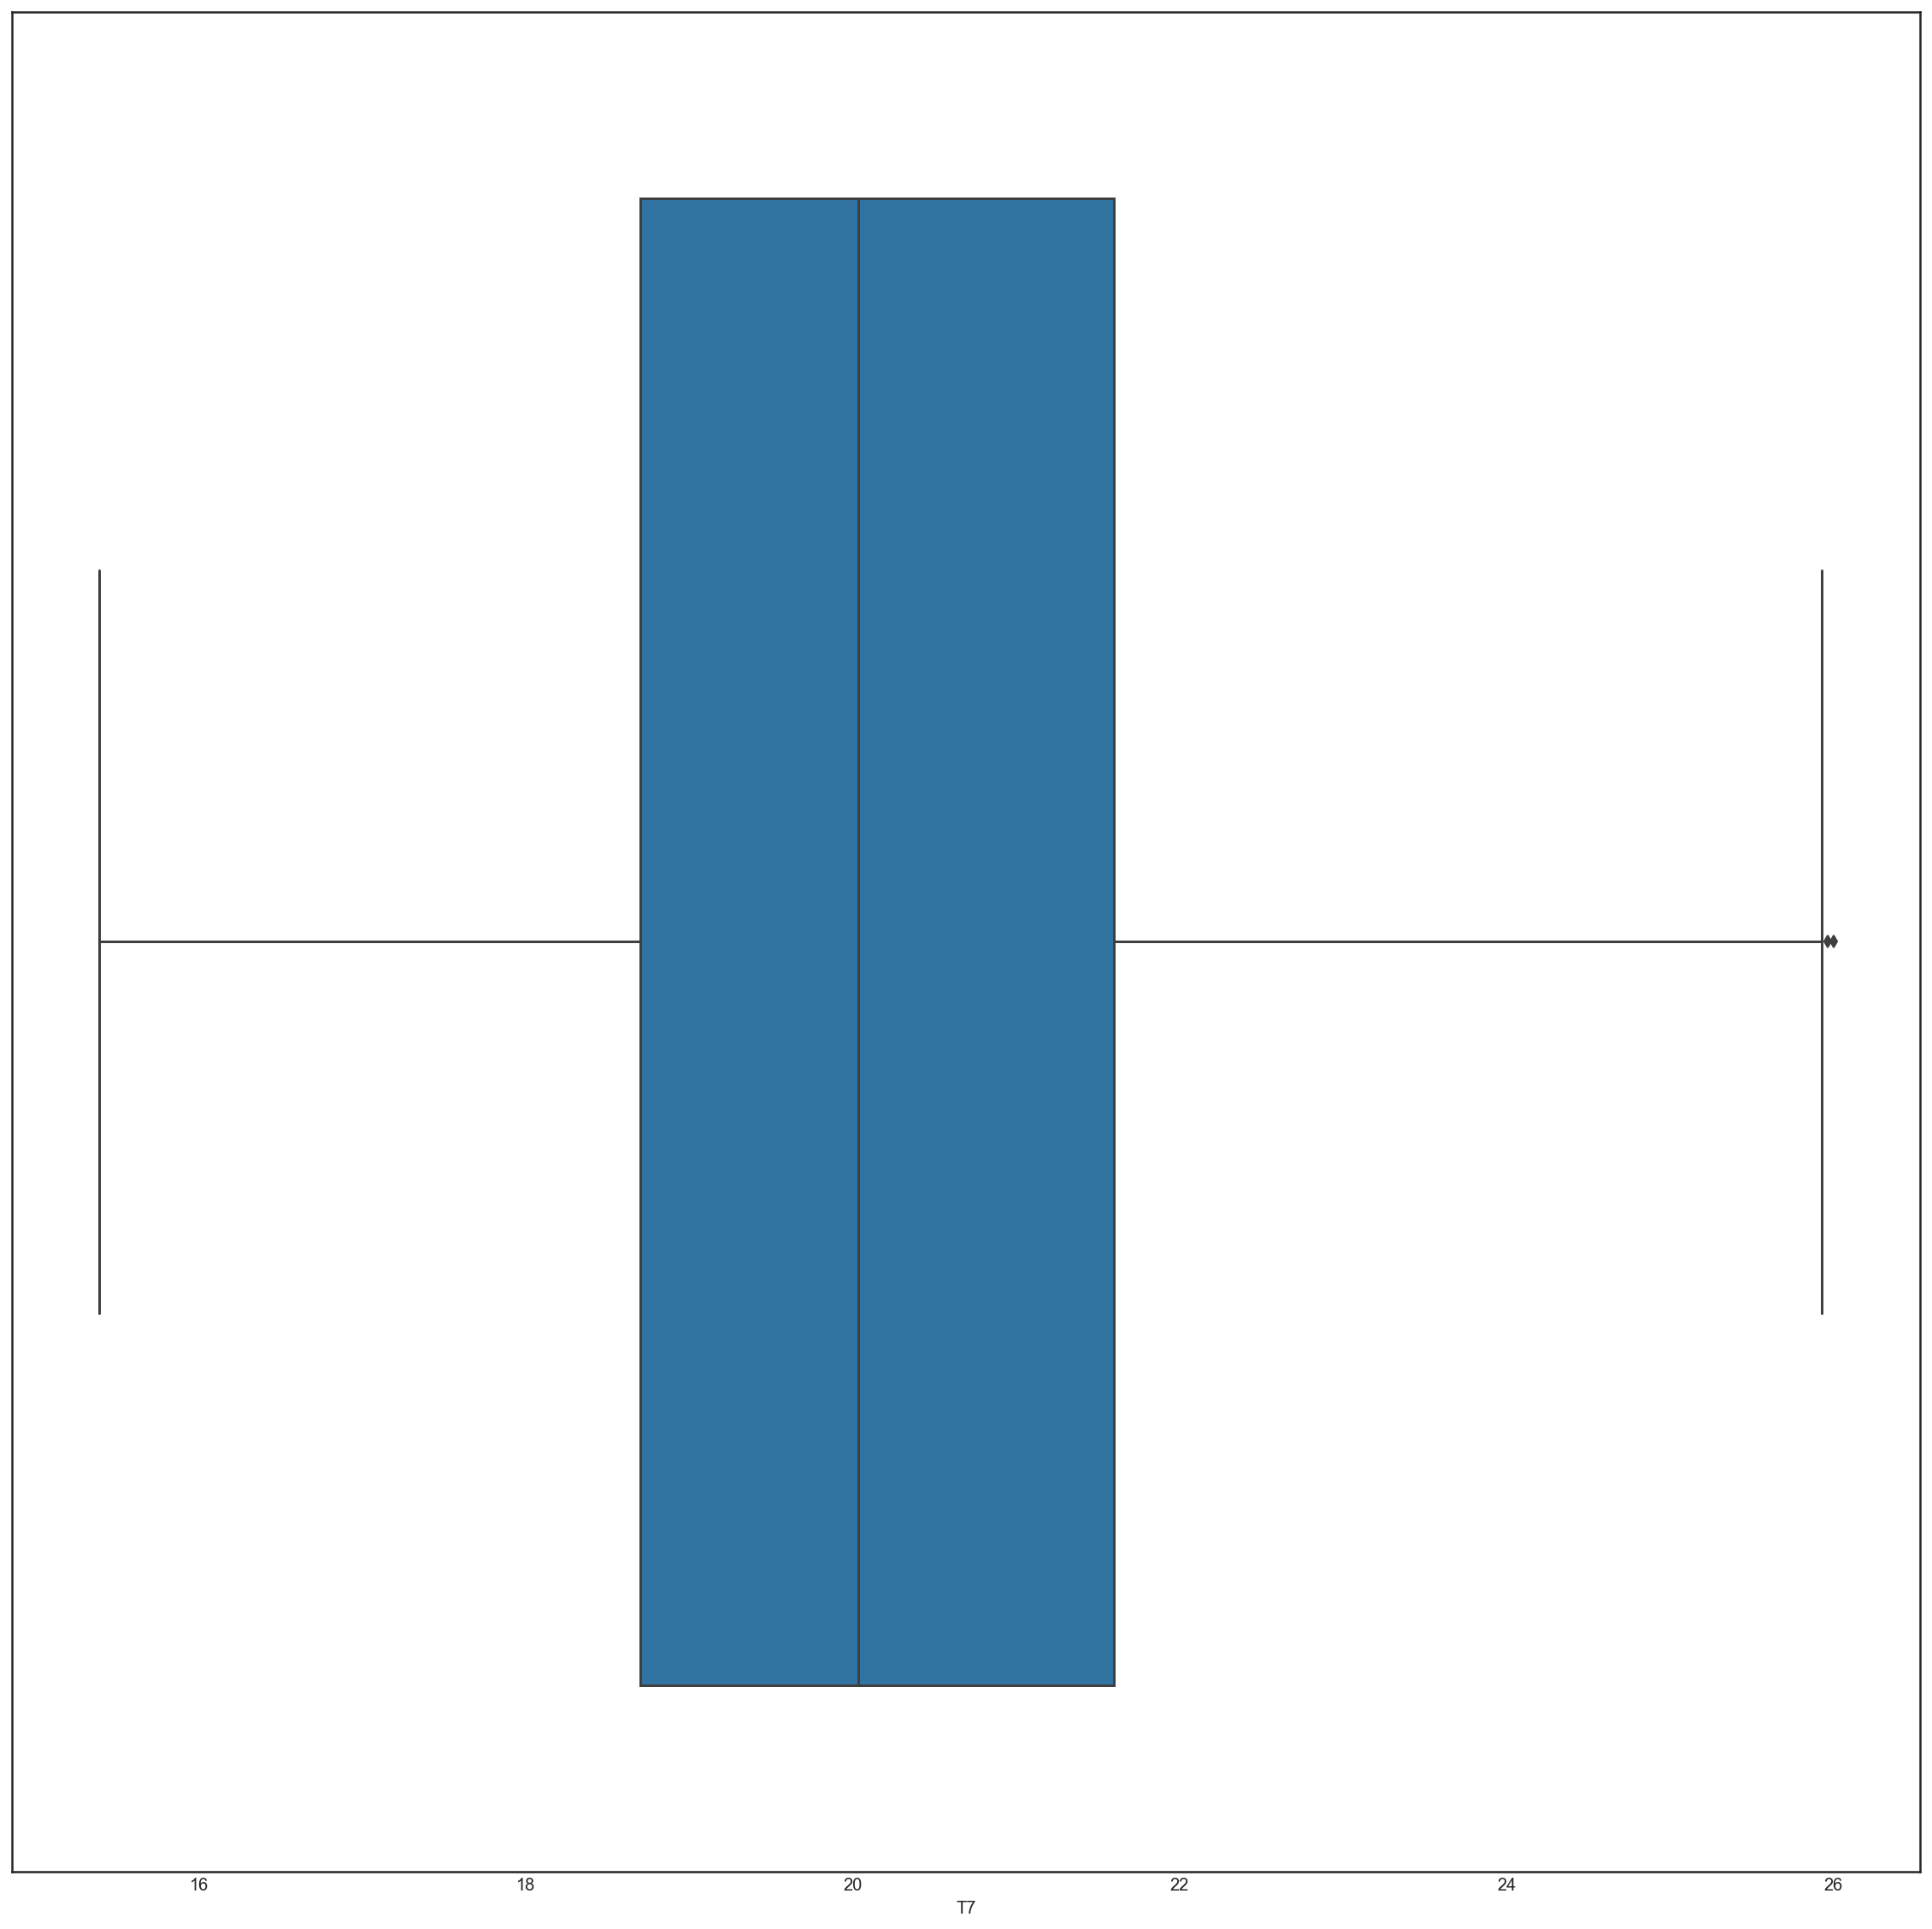

In [35]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax11 = sns.boxplot(x="T7", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


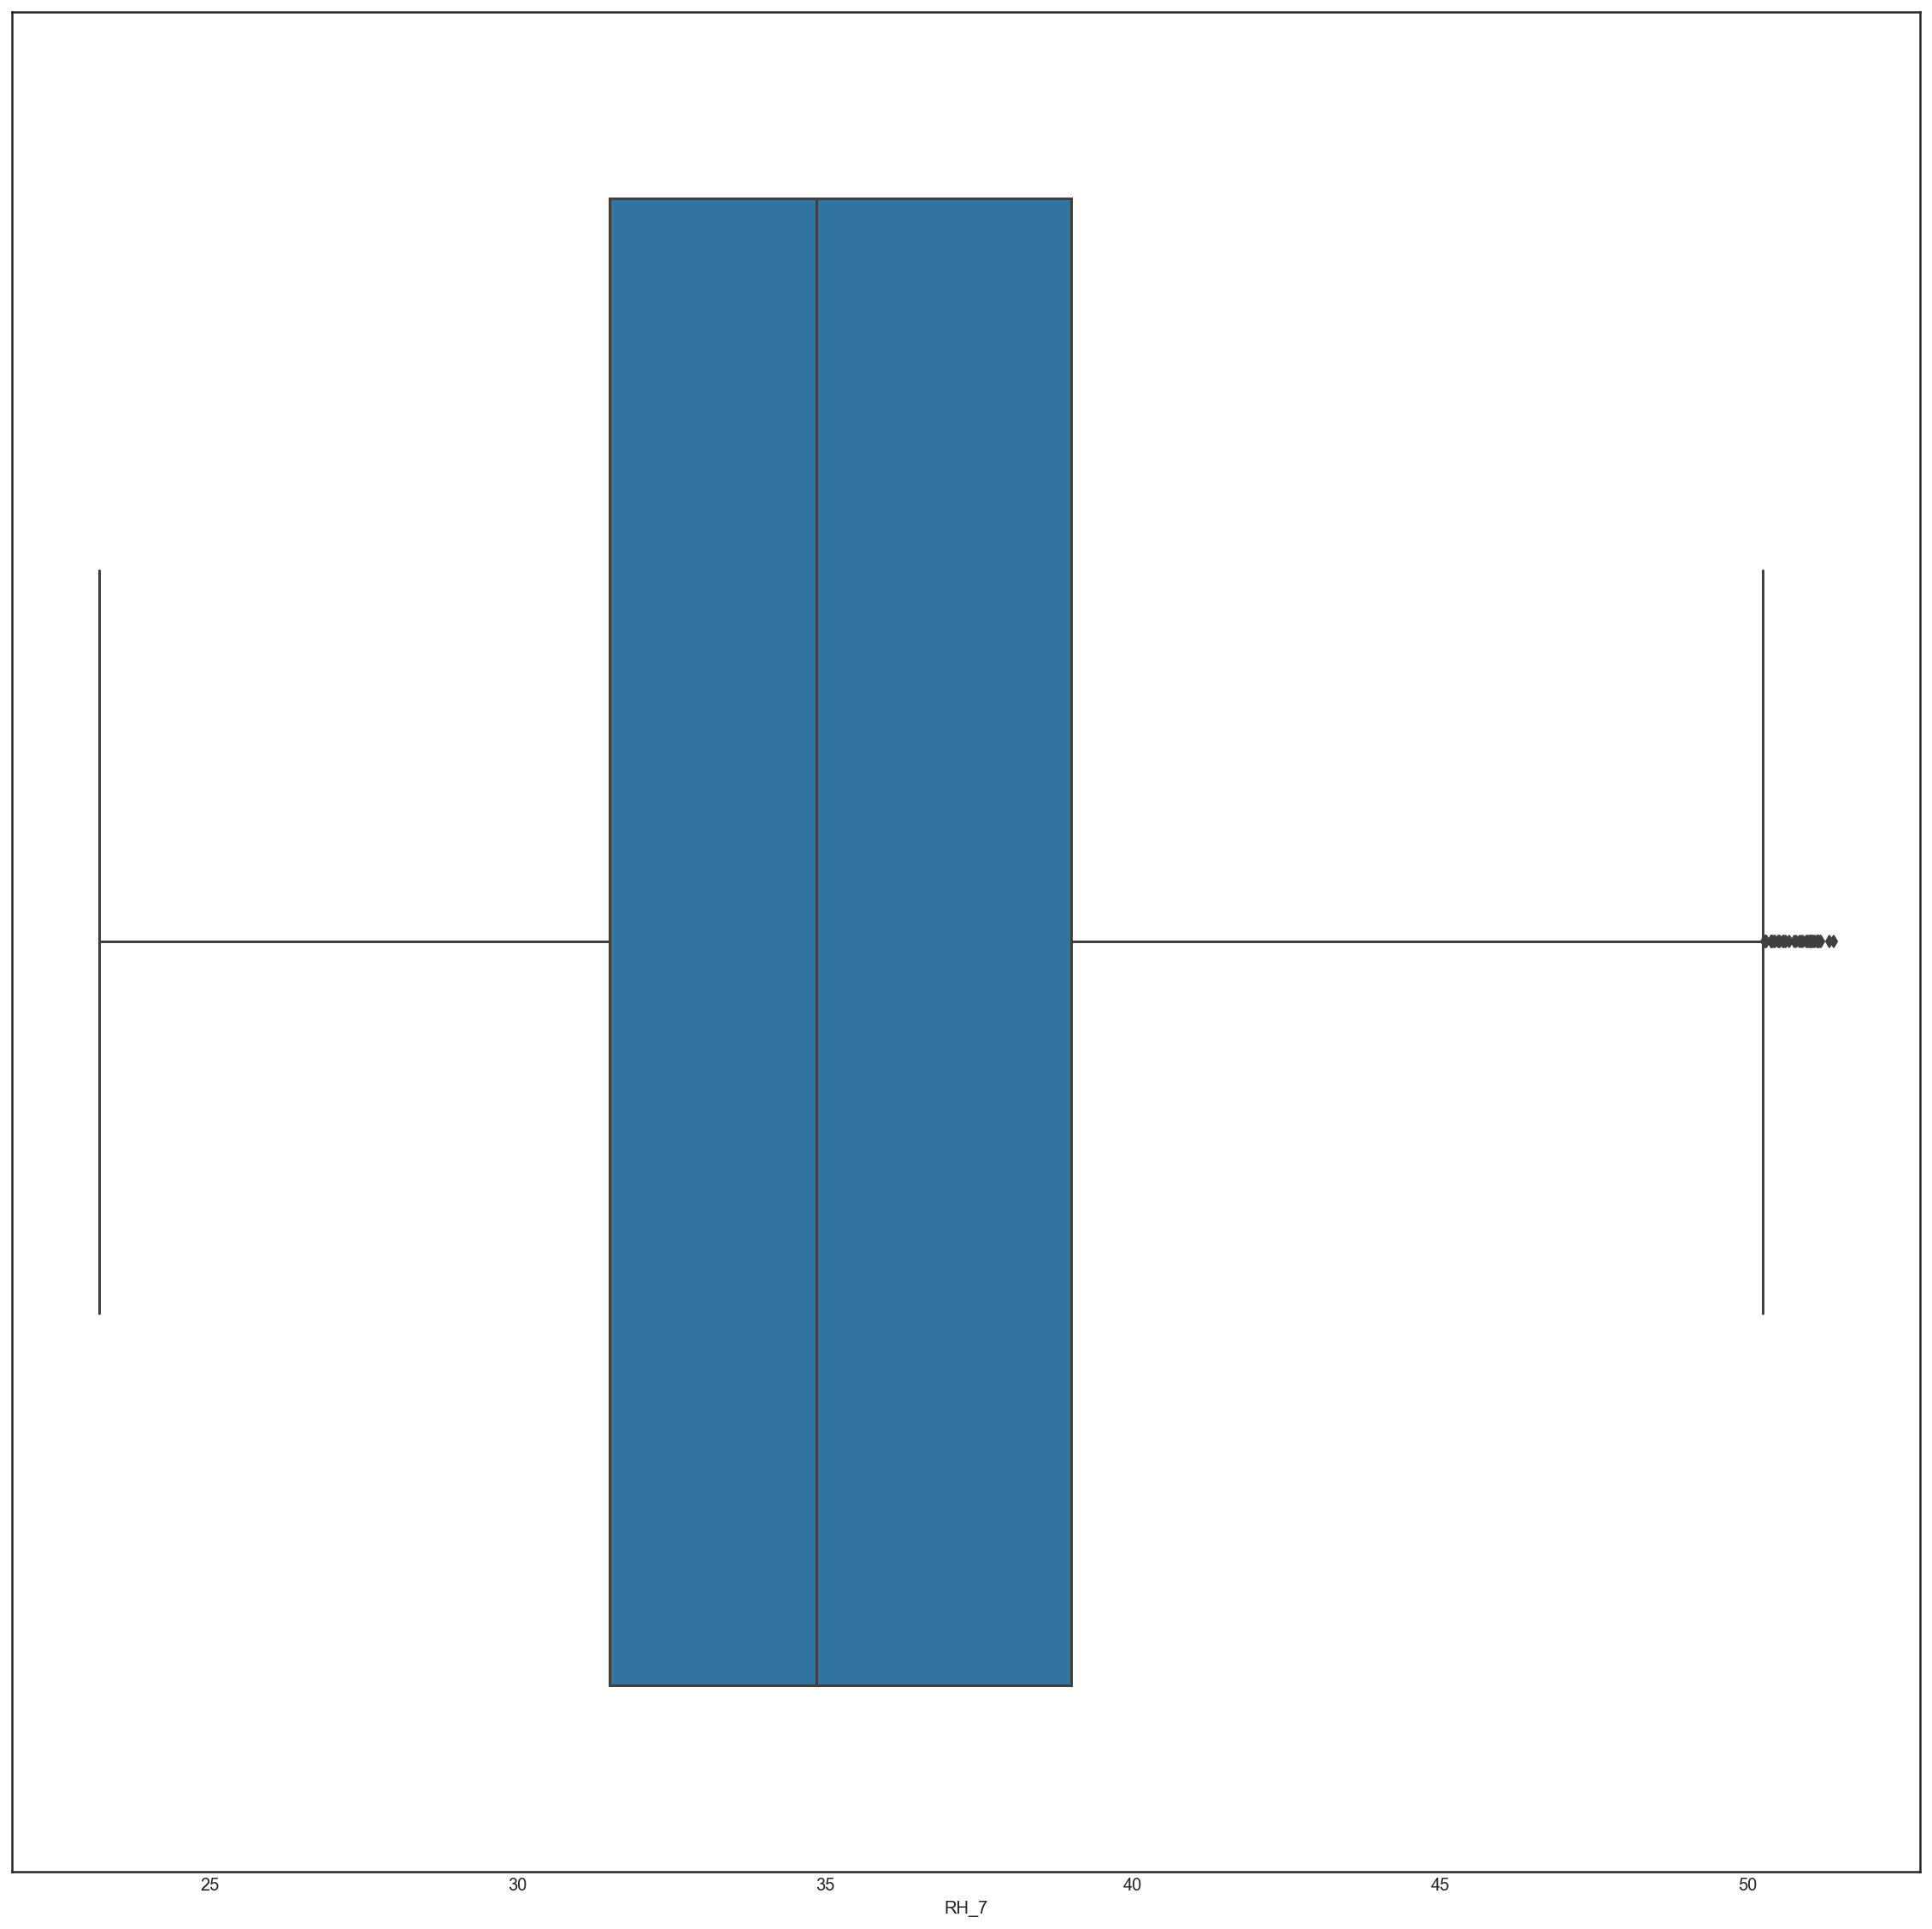

In [36]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax12 = sns.boxplot(x="RH_7", data=phase)

### T8 RH_8

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


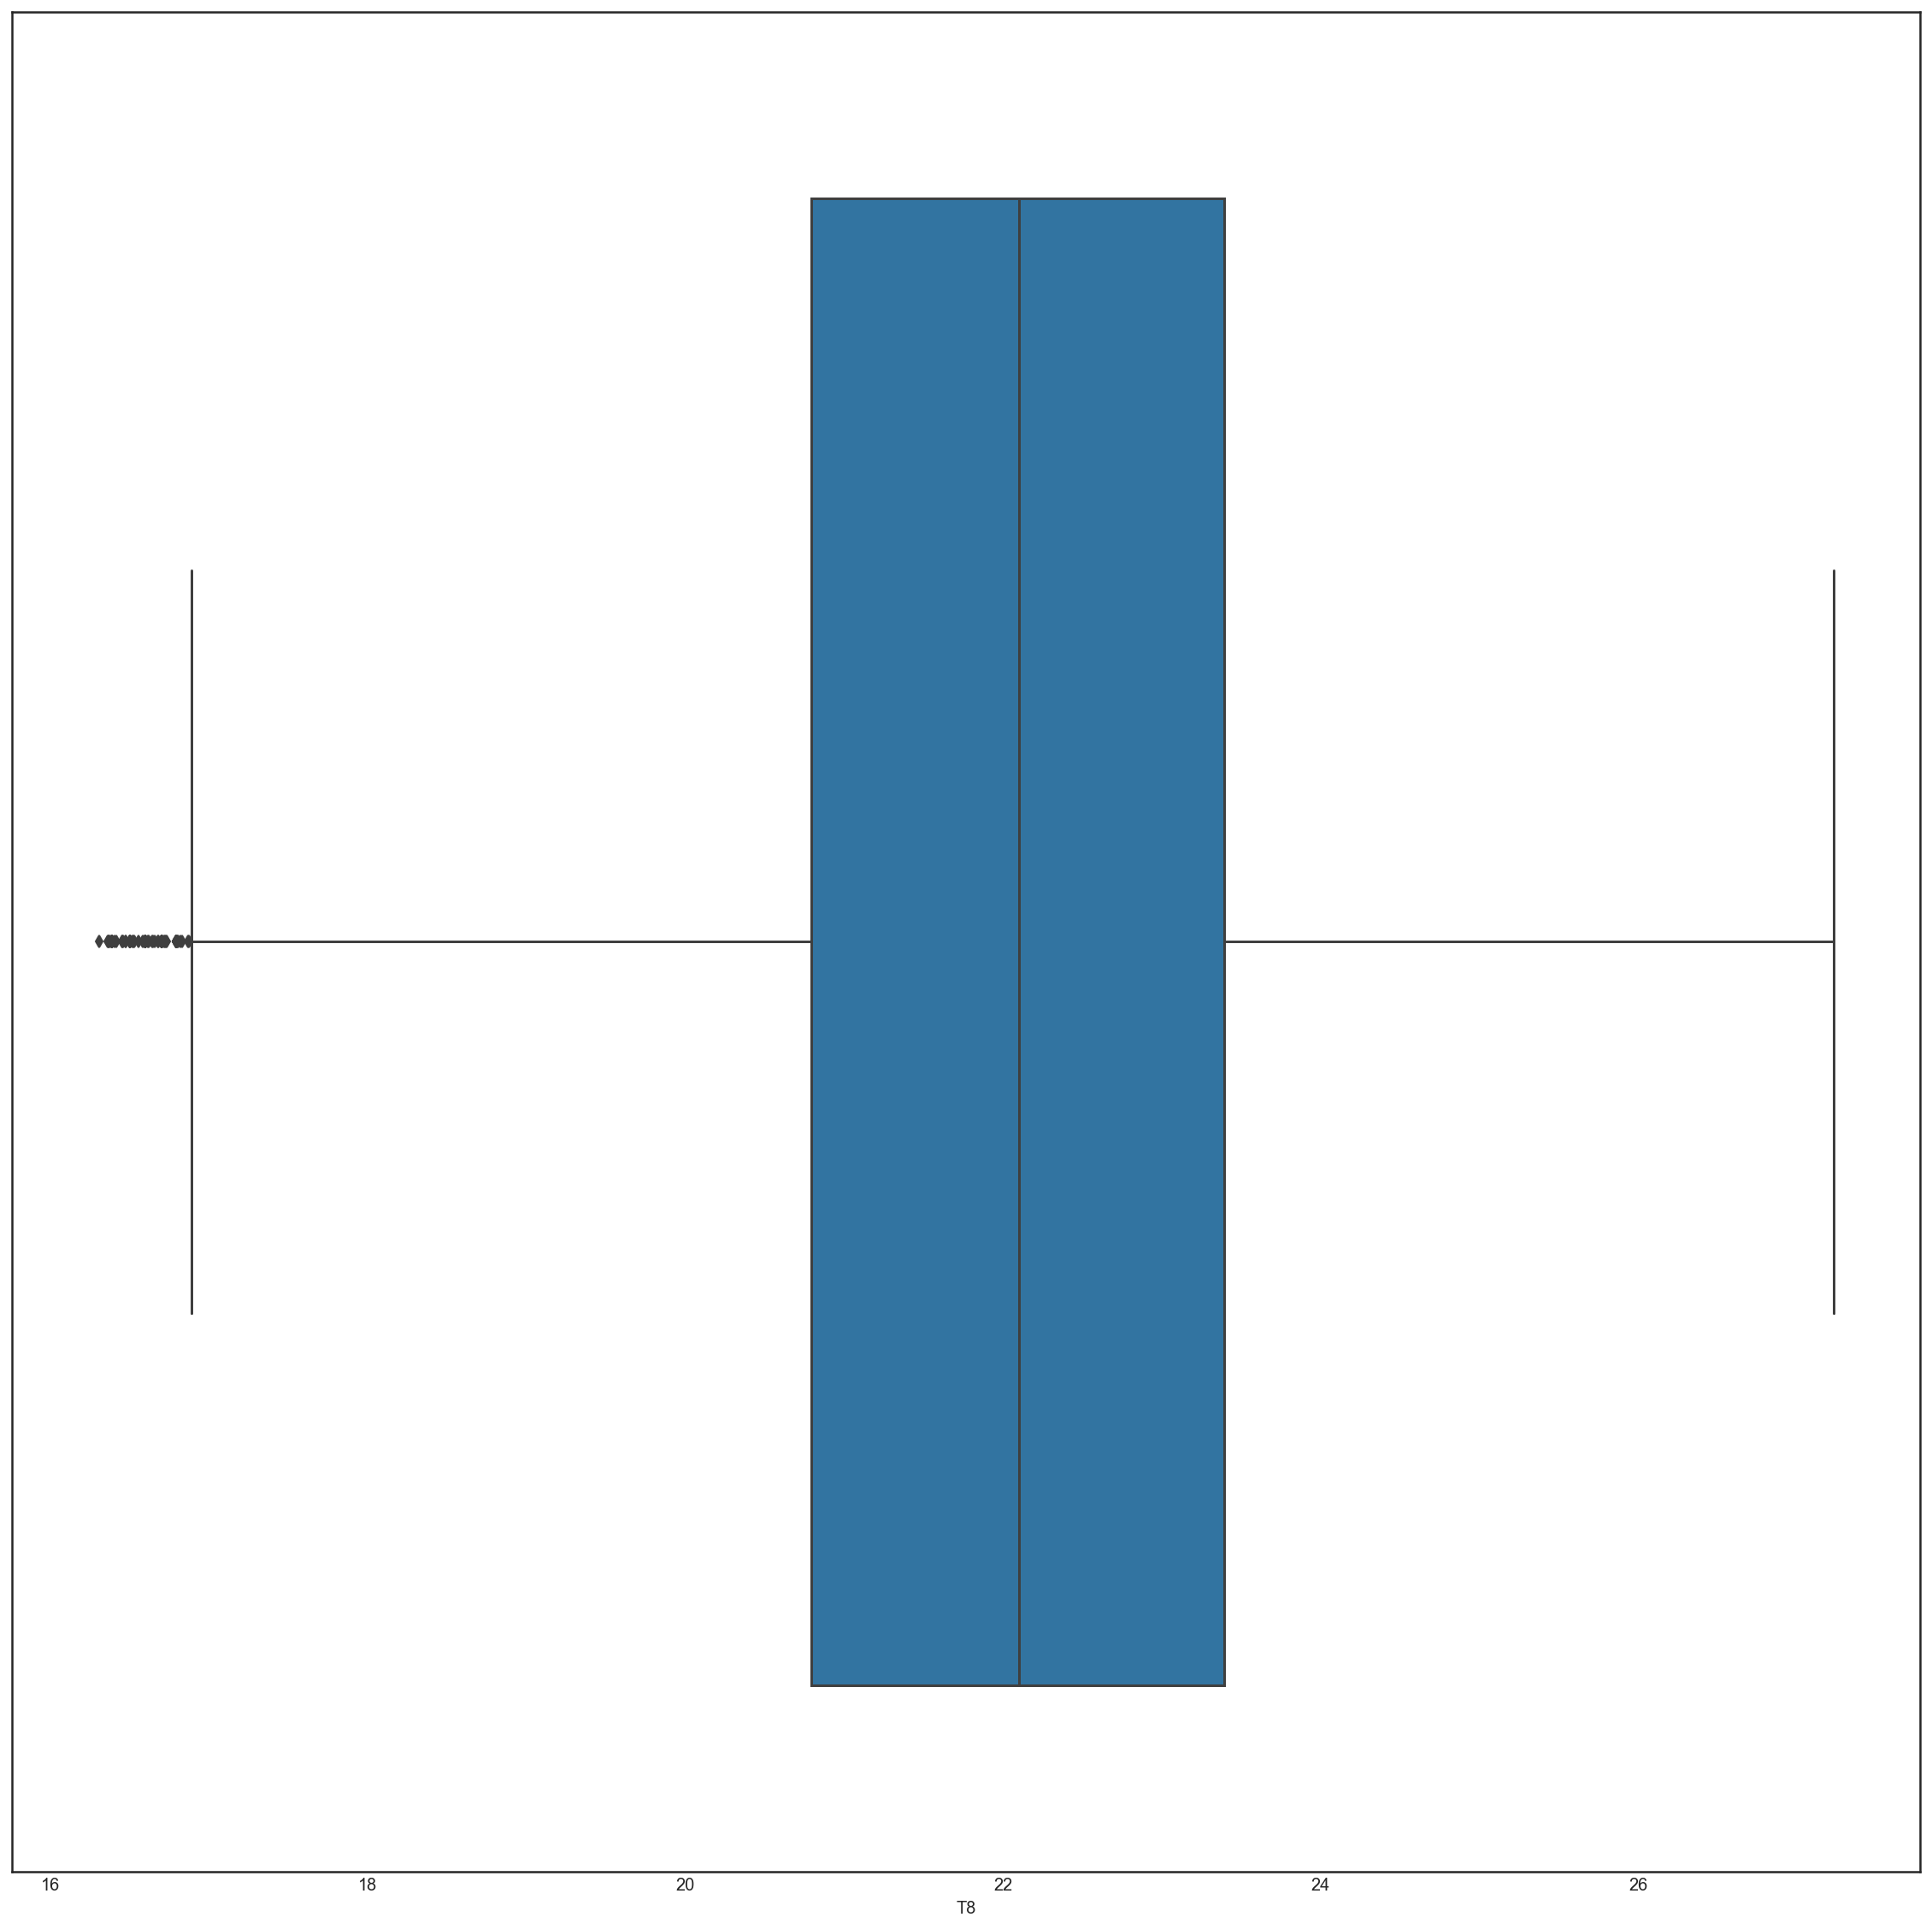

In [37]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax13 = sns.boxplot(x="T8", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


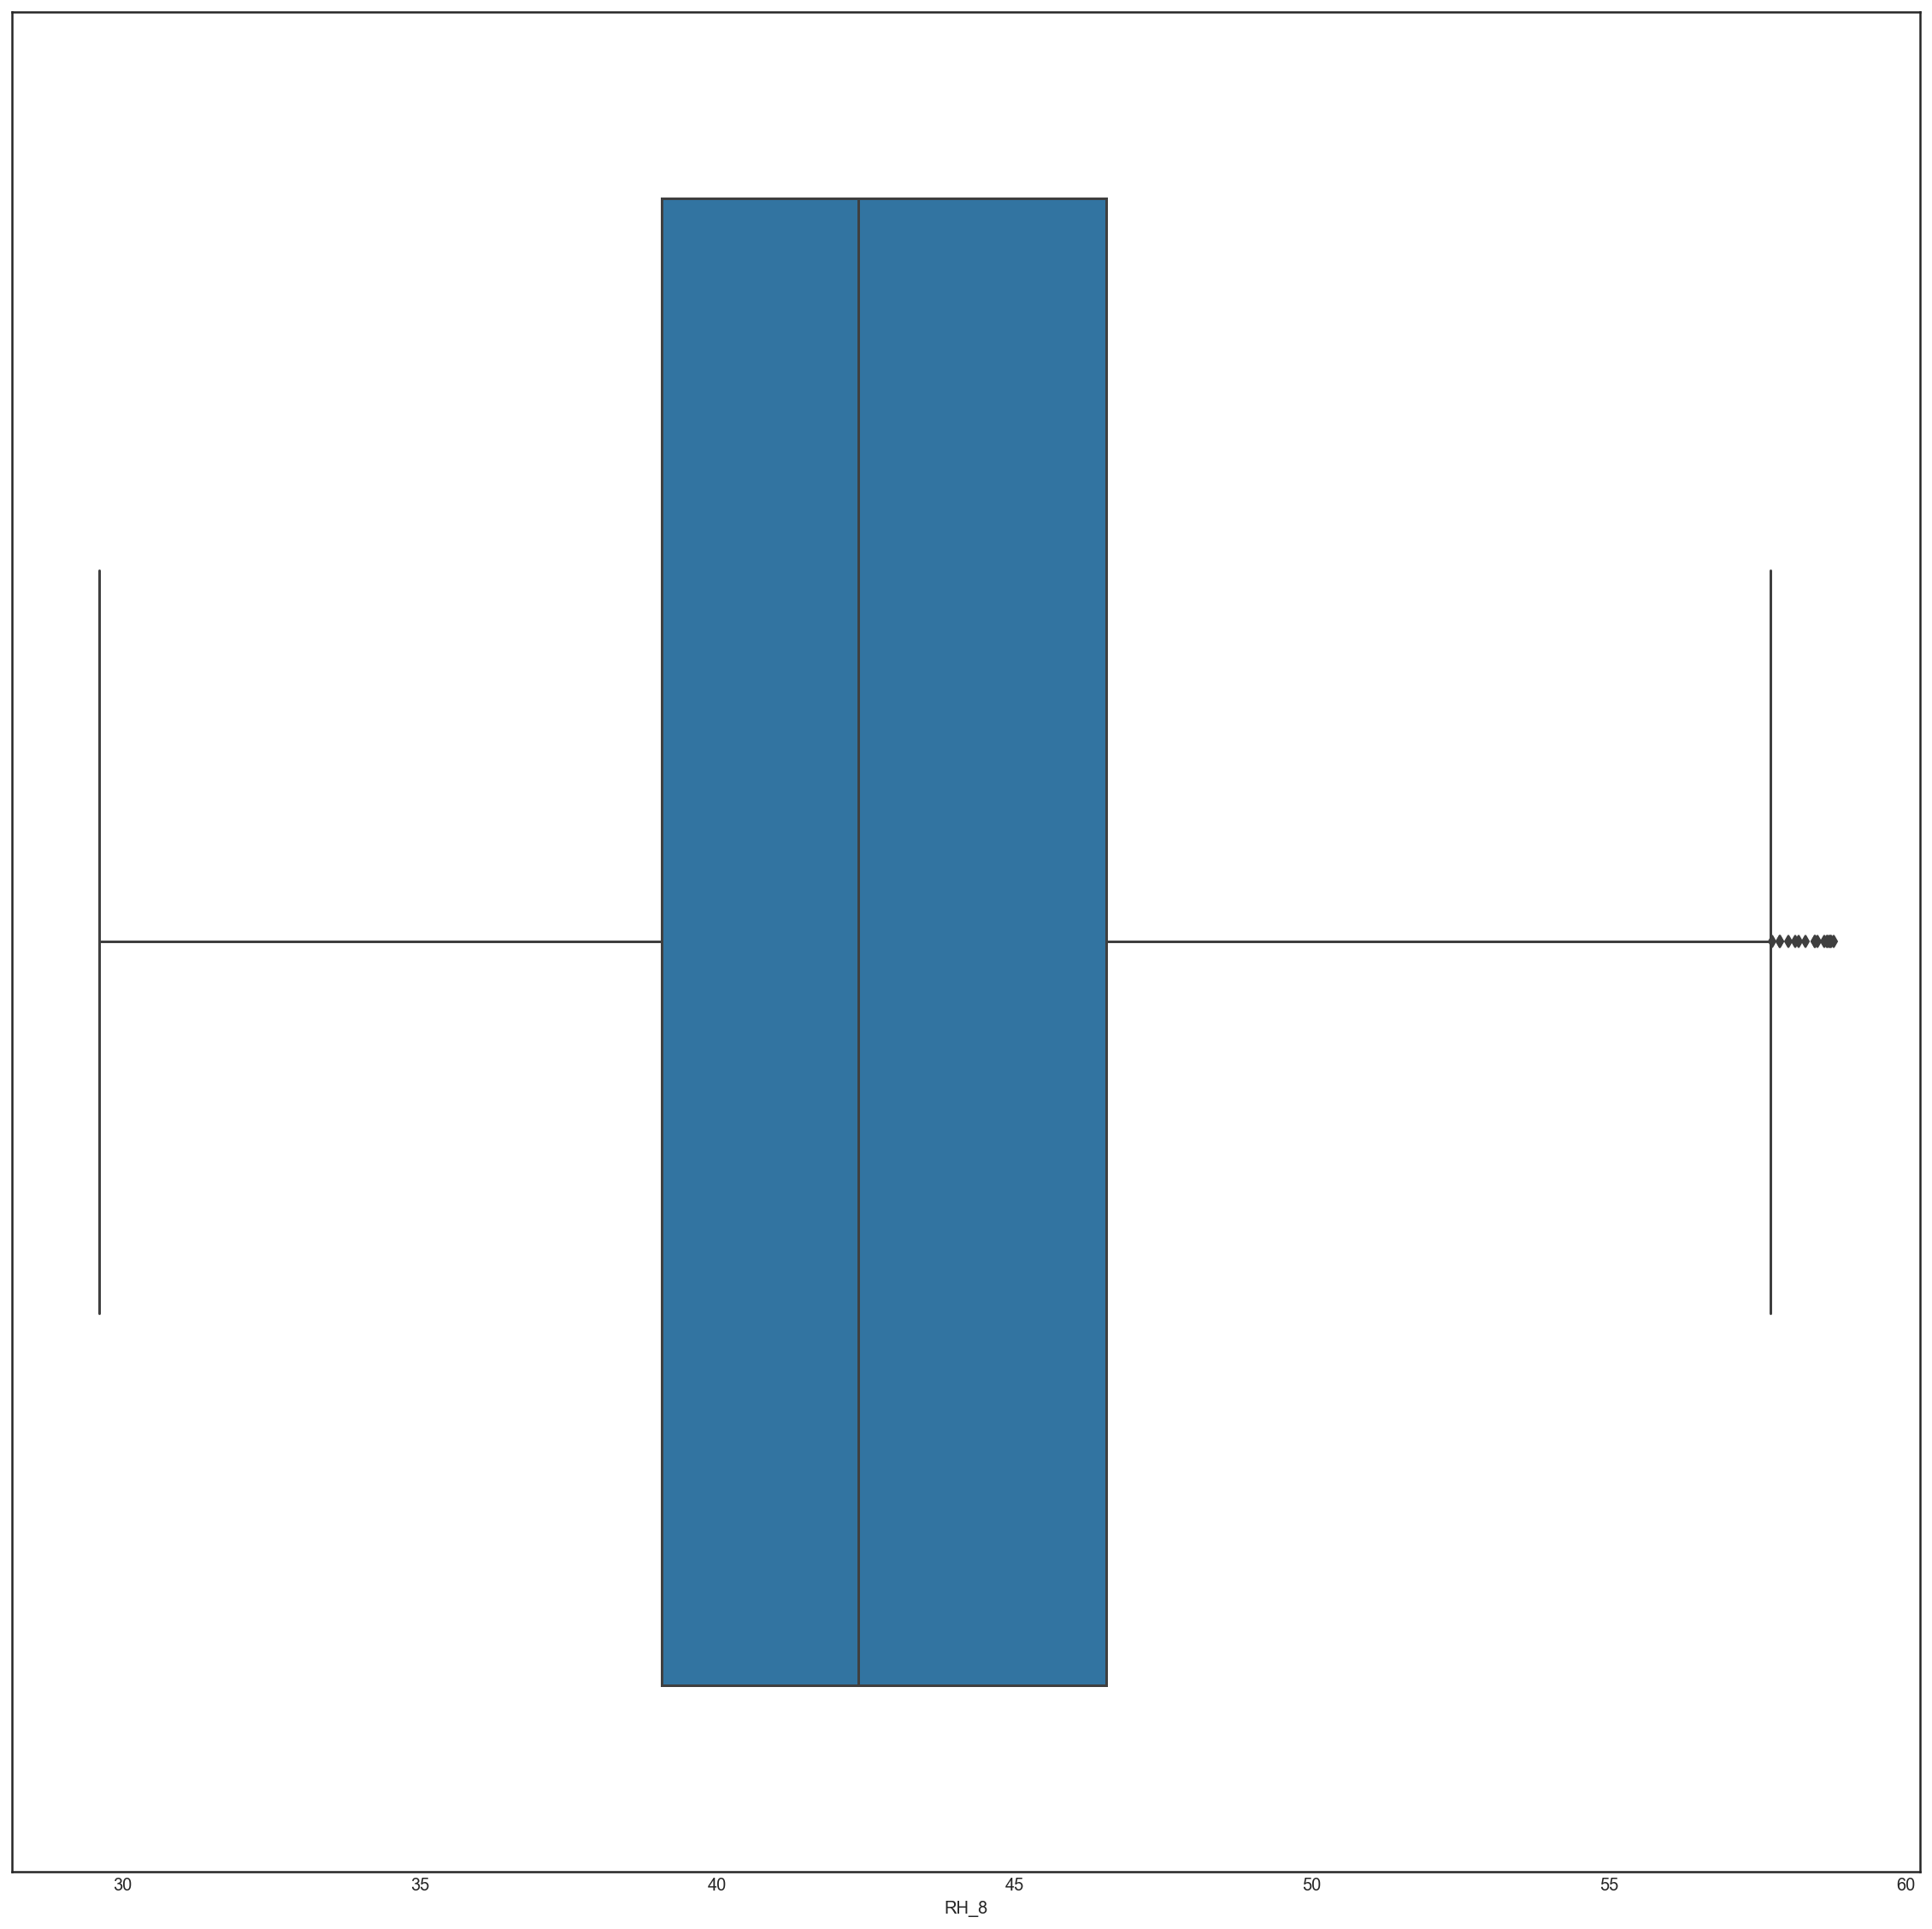

In [38]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax14 = sns.boxplot(x="RH_8", data=phase)

### T9 RH_9

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


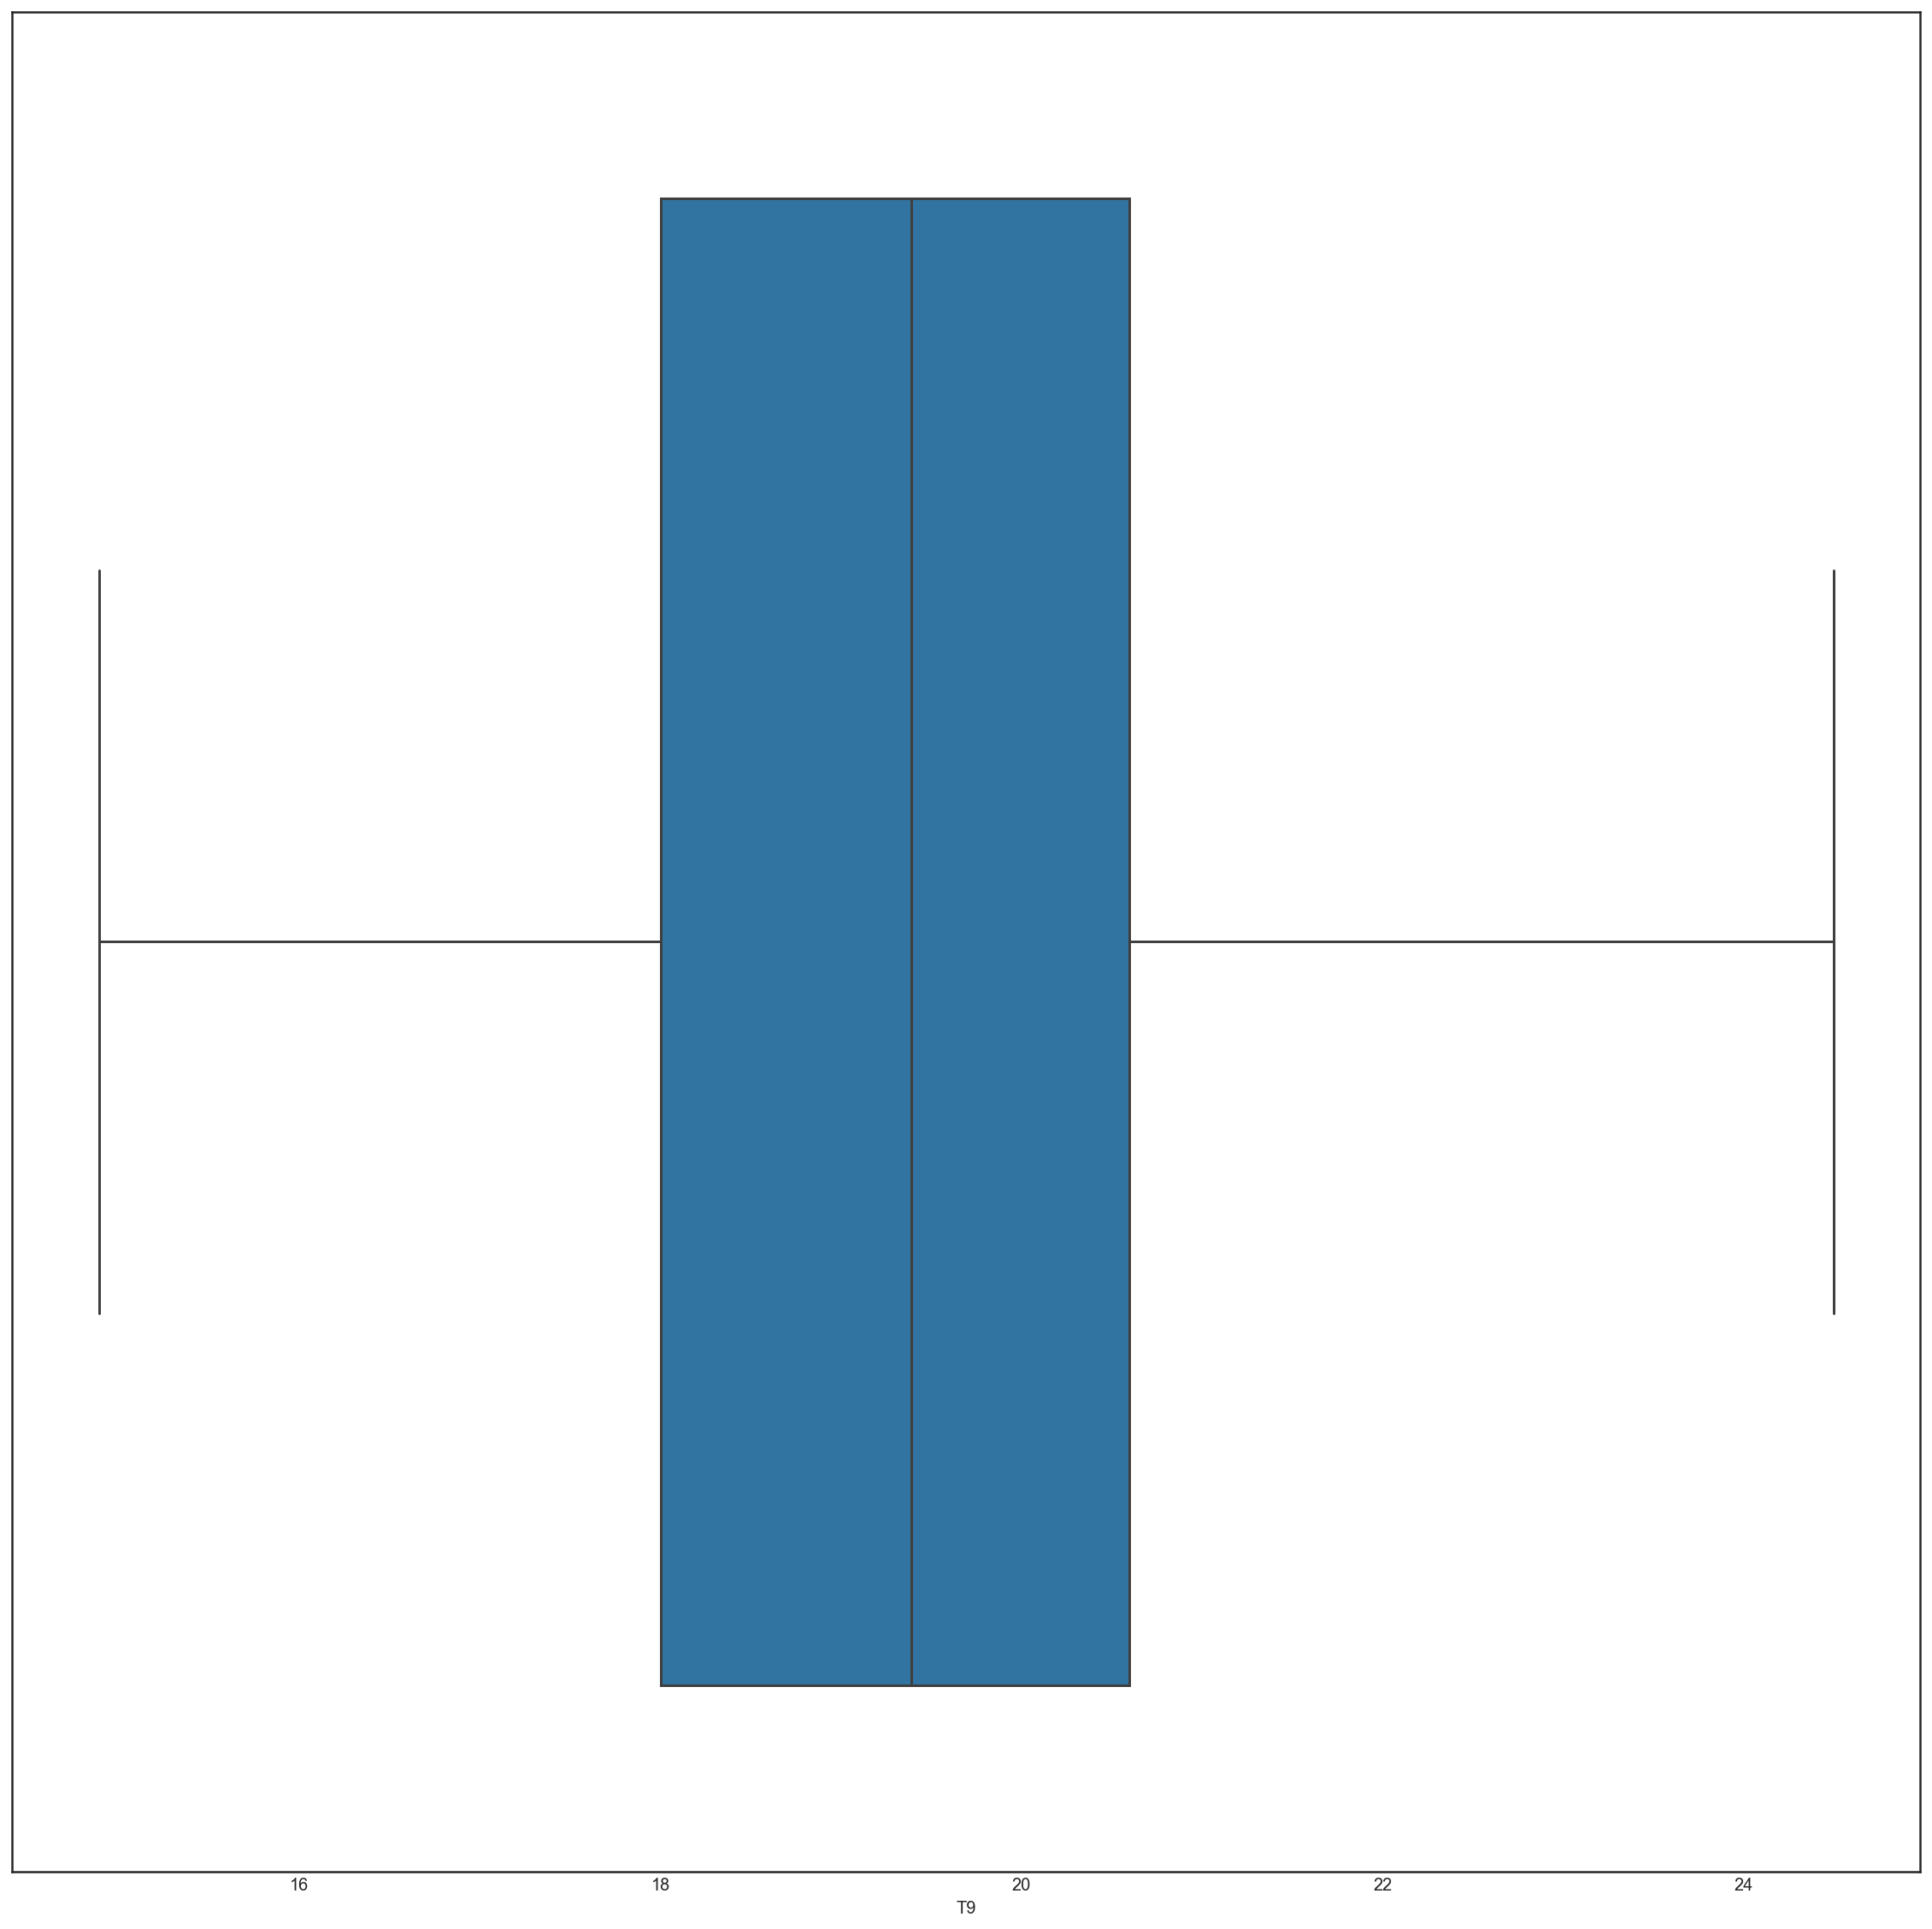

In [39]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax15 = sns.boxplot(x="T9", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


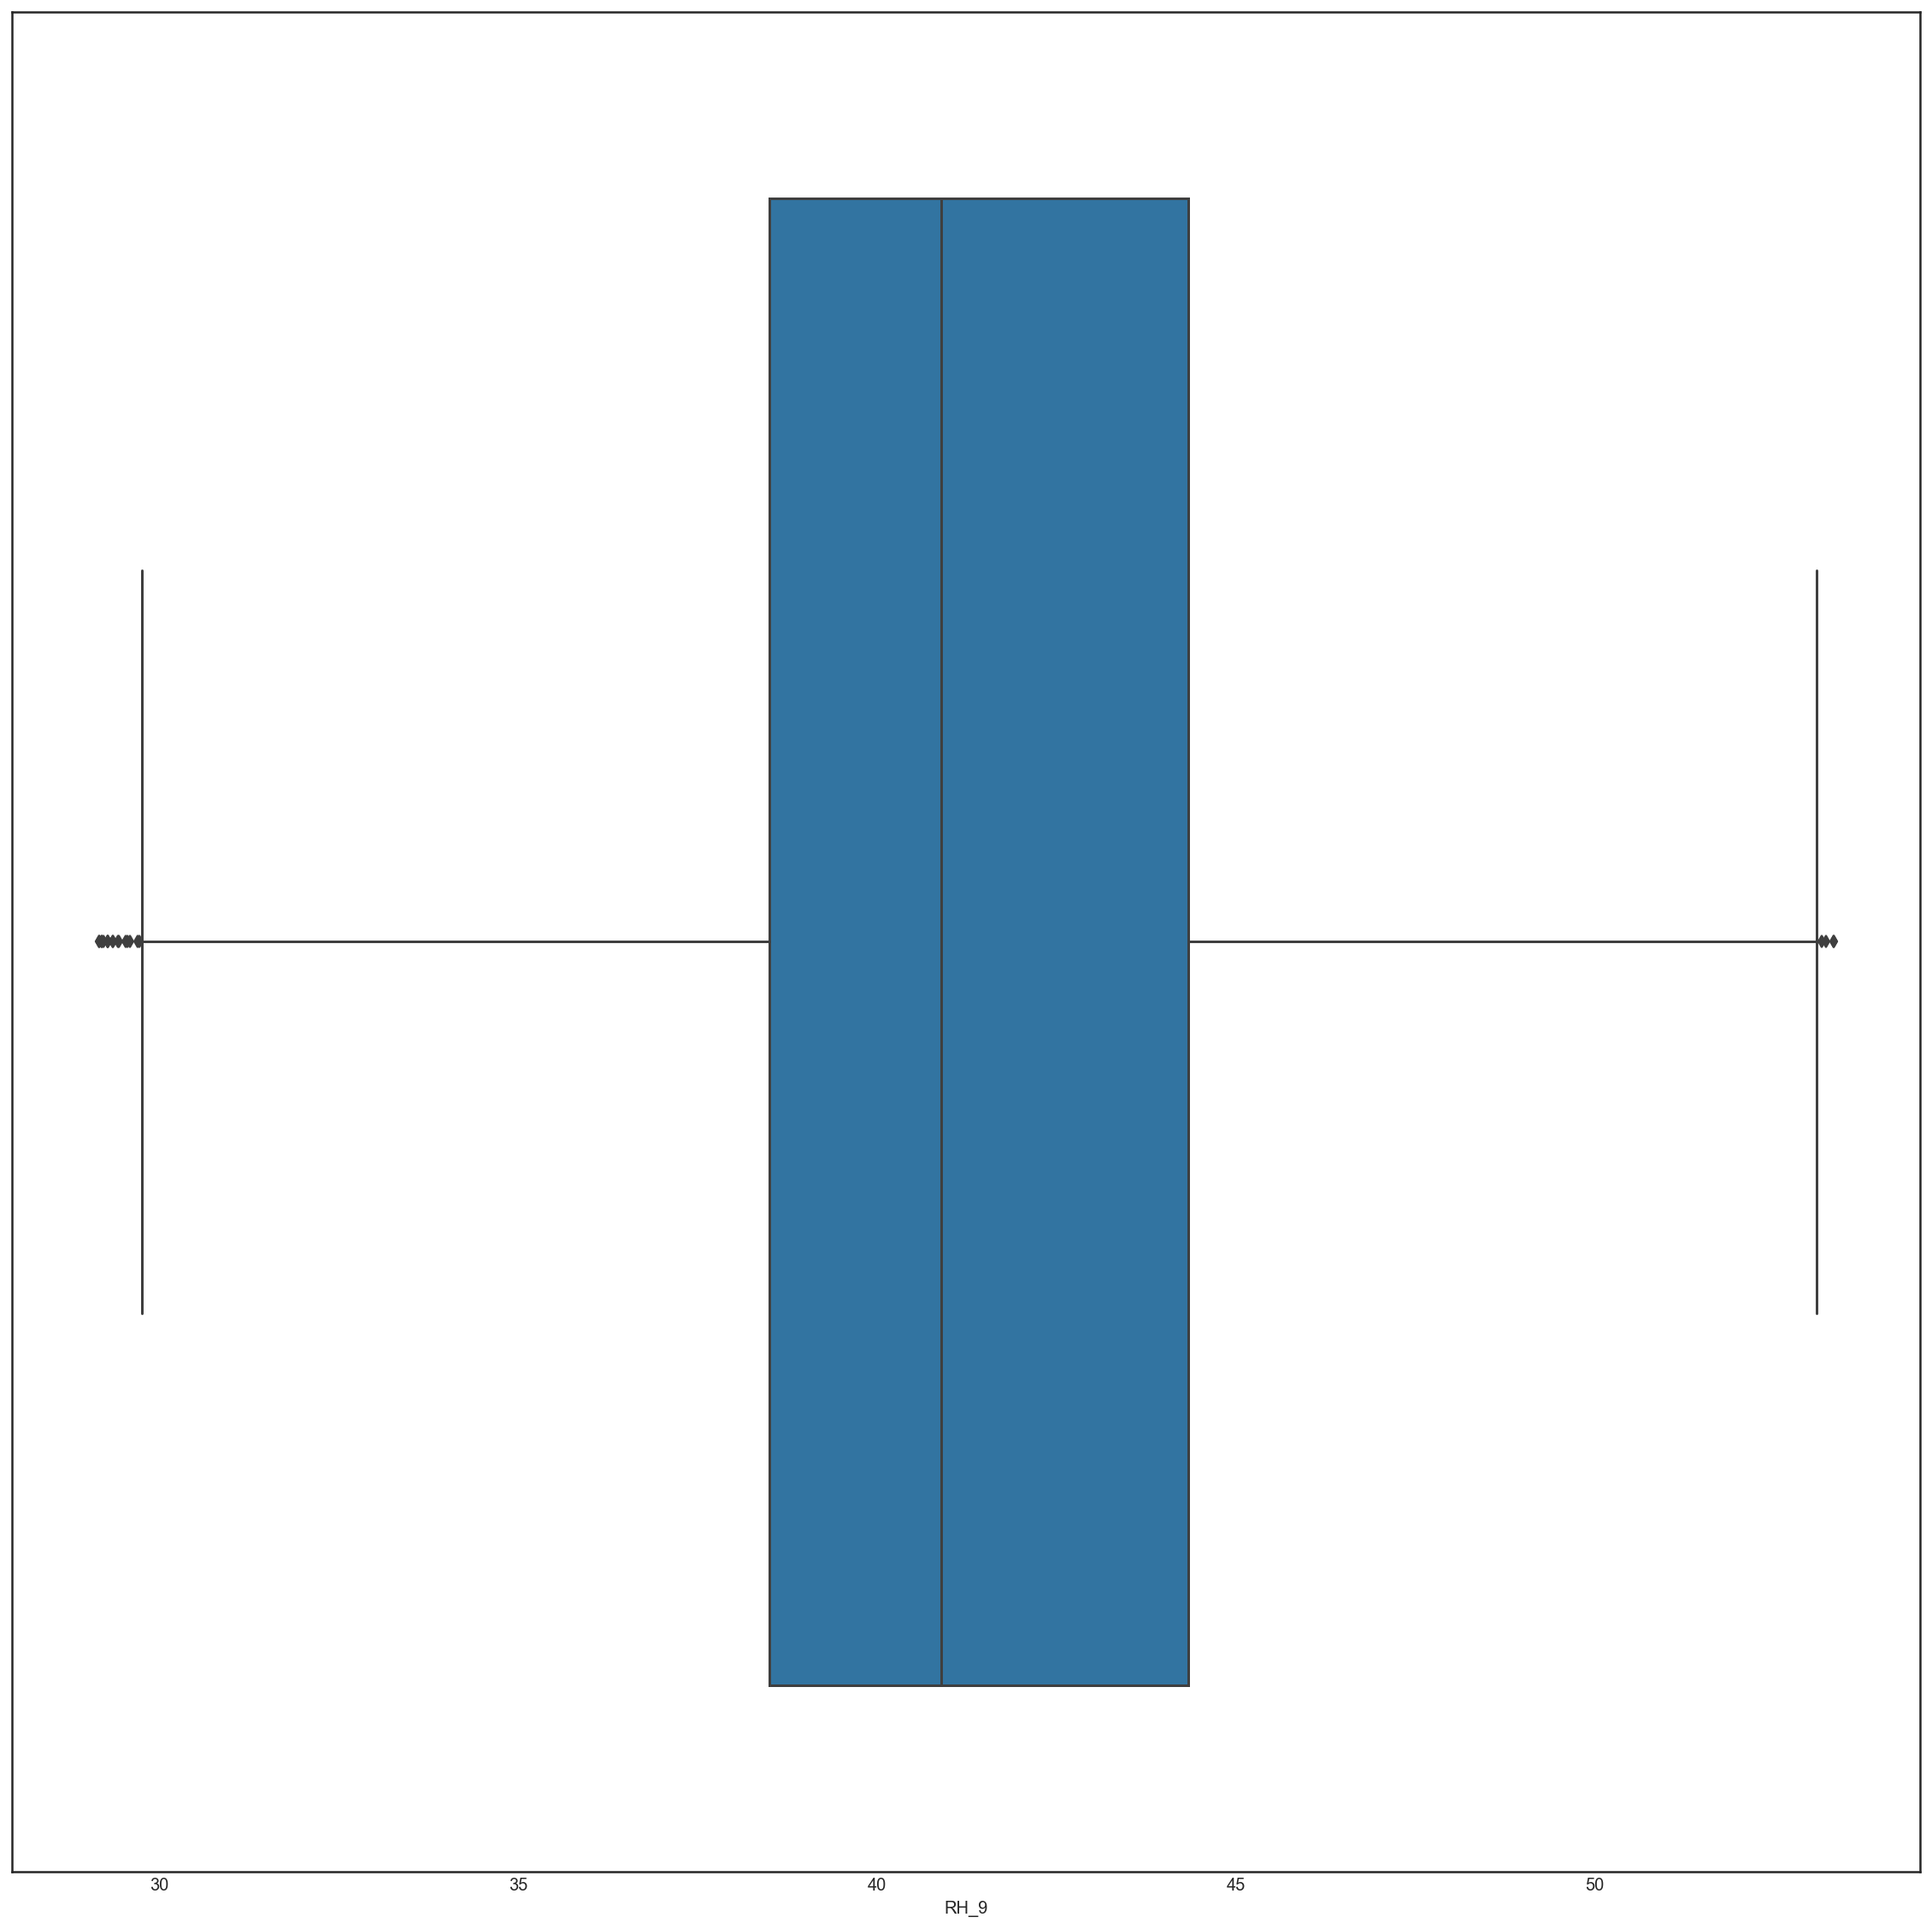

In [40]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax16 = sns.boxplot(x="RH_9", data=phase)

### T_out RH_out

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


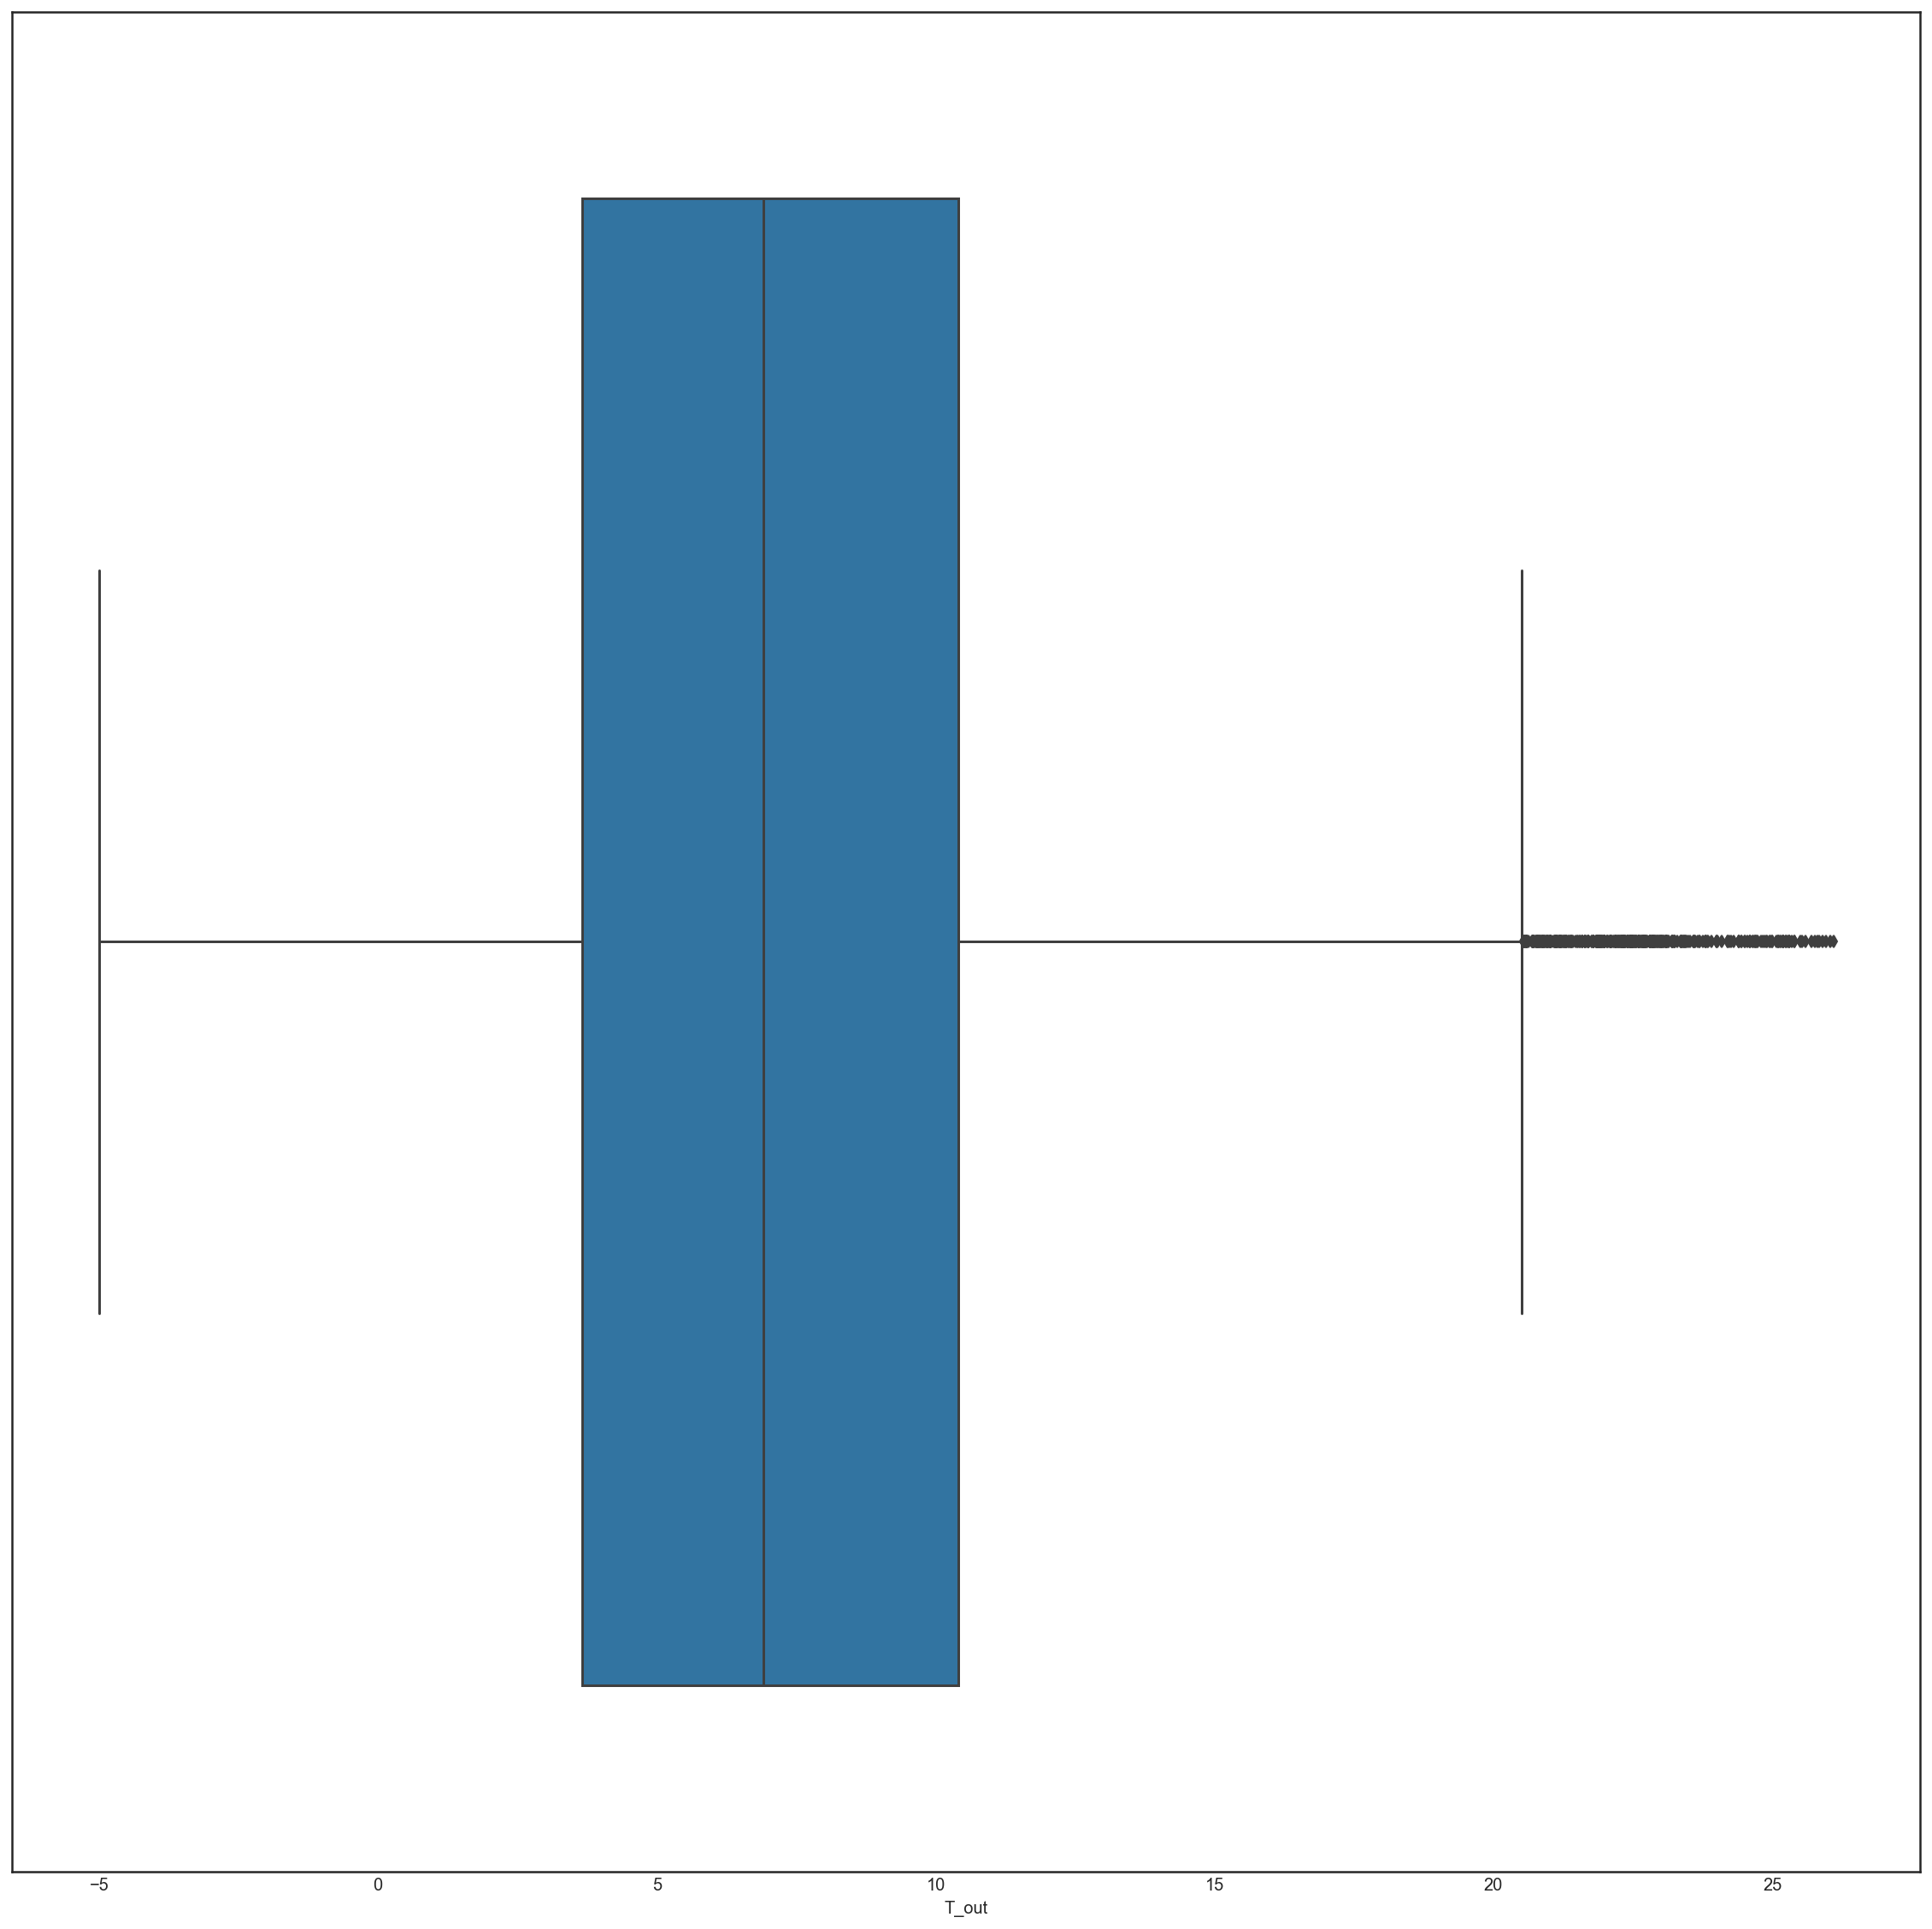

In [41]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax17 = sns.boxplot(x="T_out", data=phase)

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


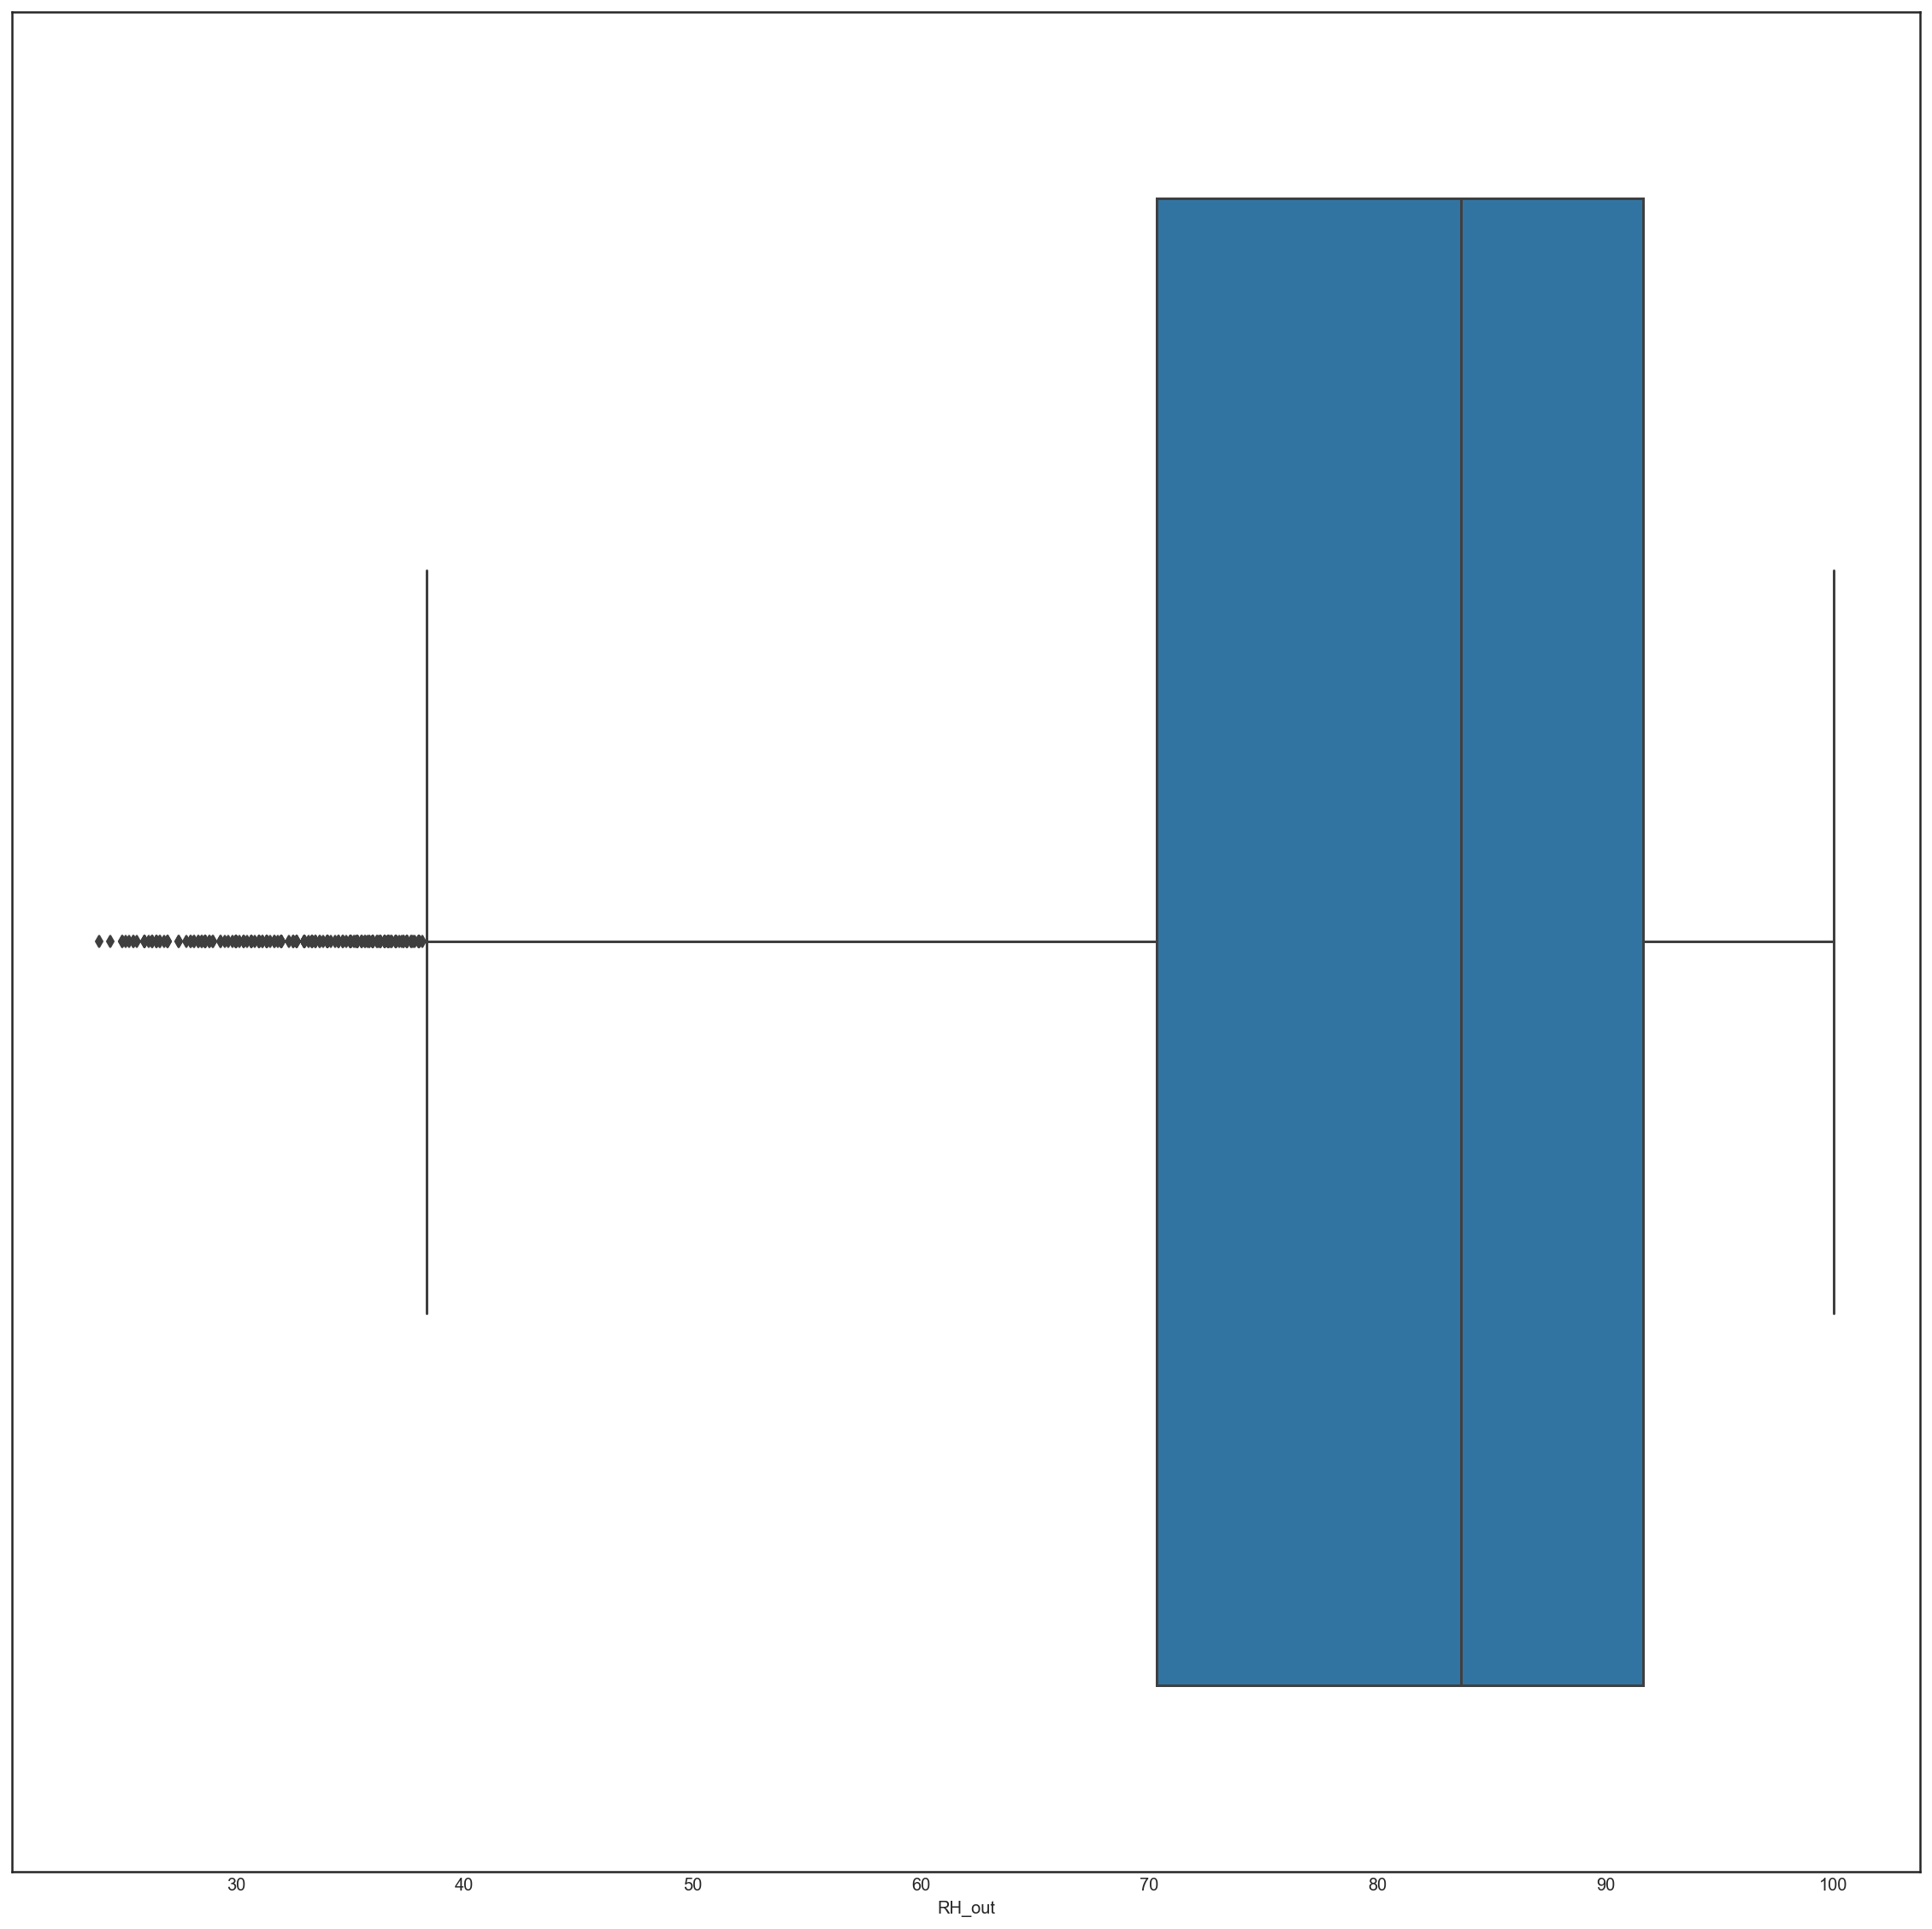

In [42]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax18 = sns.boxplot(x="RH_out", data=phase)

### Press_mm_hg

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


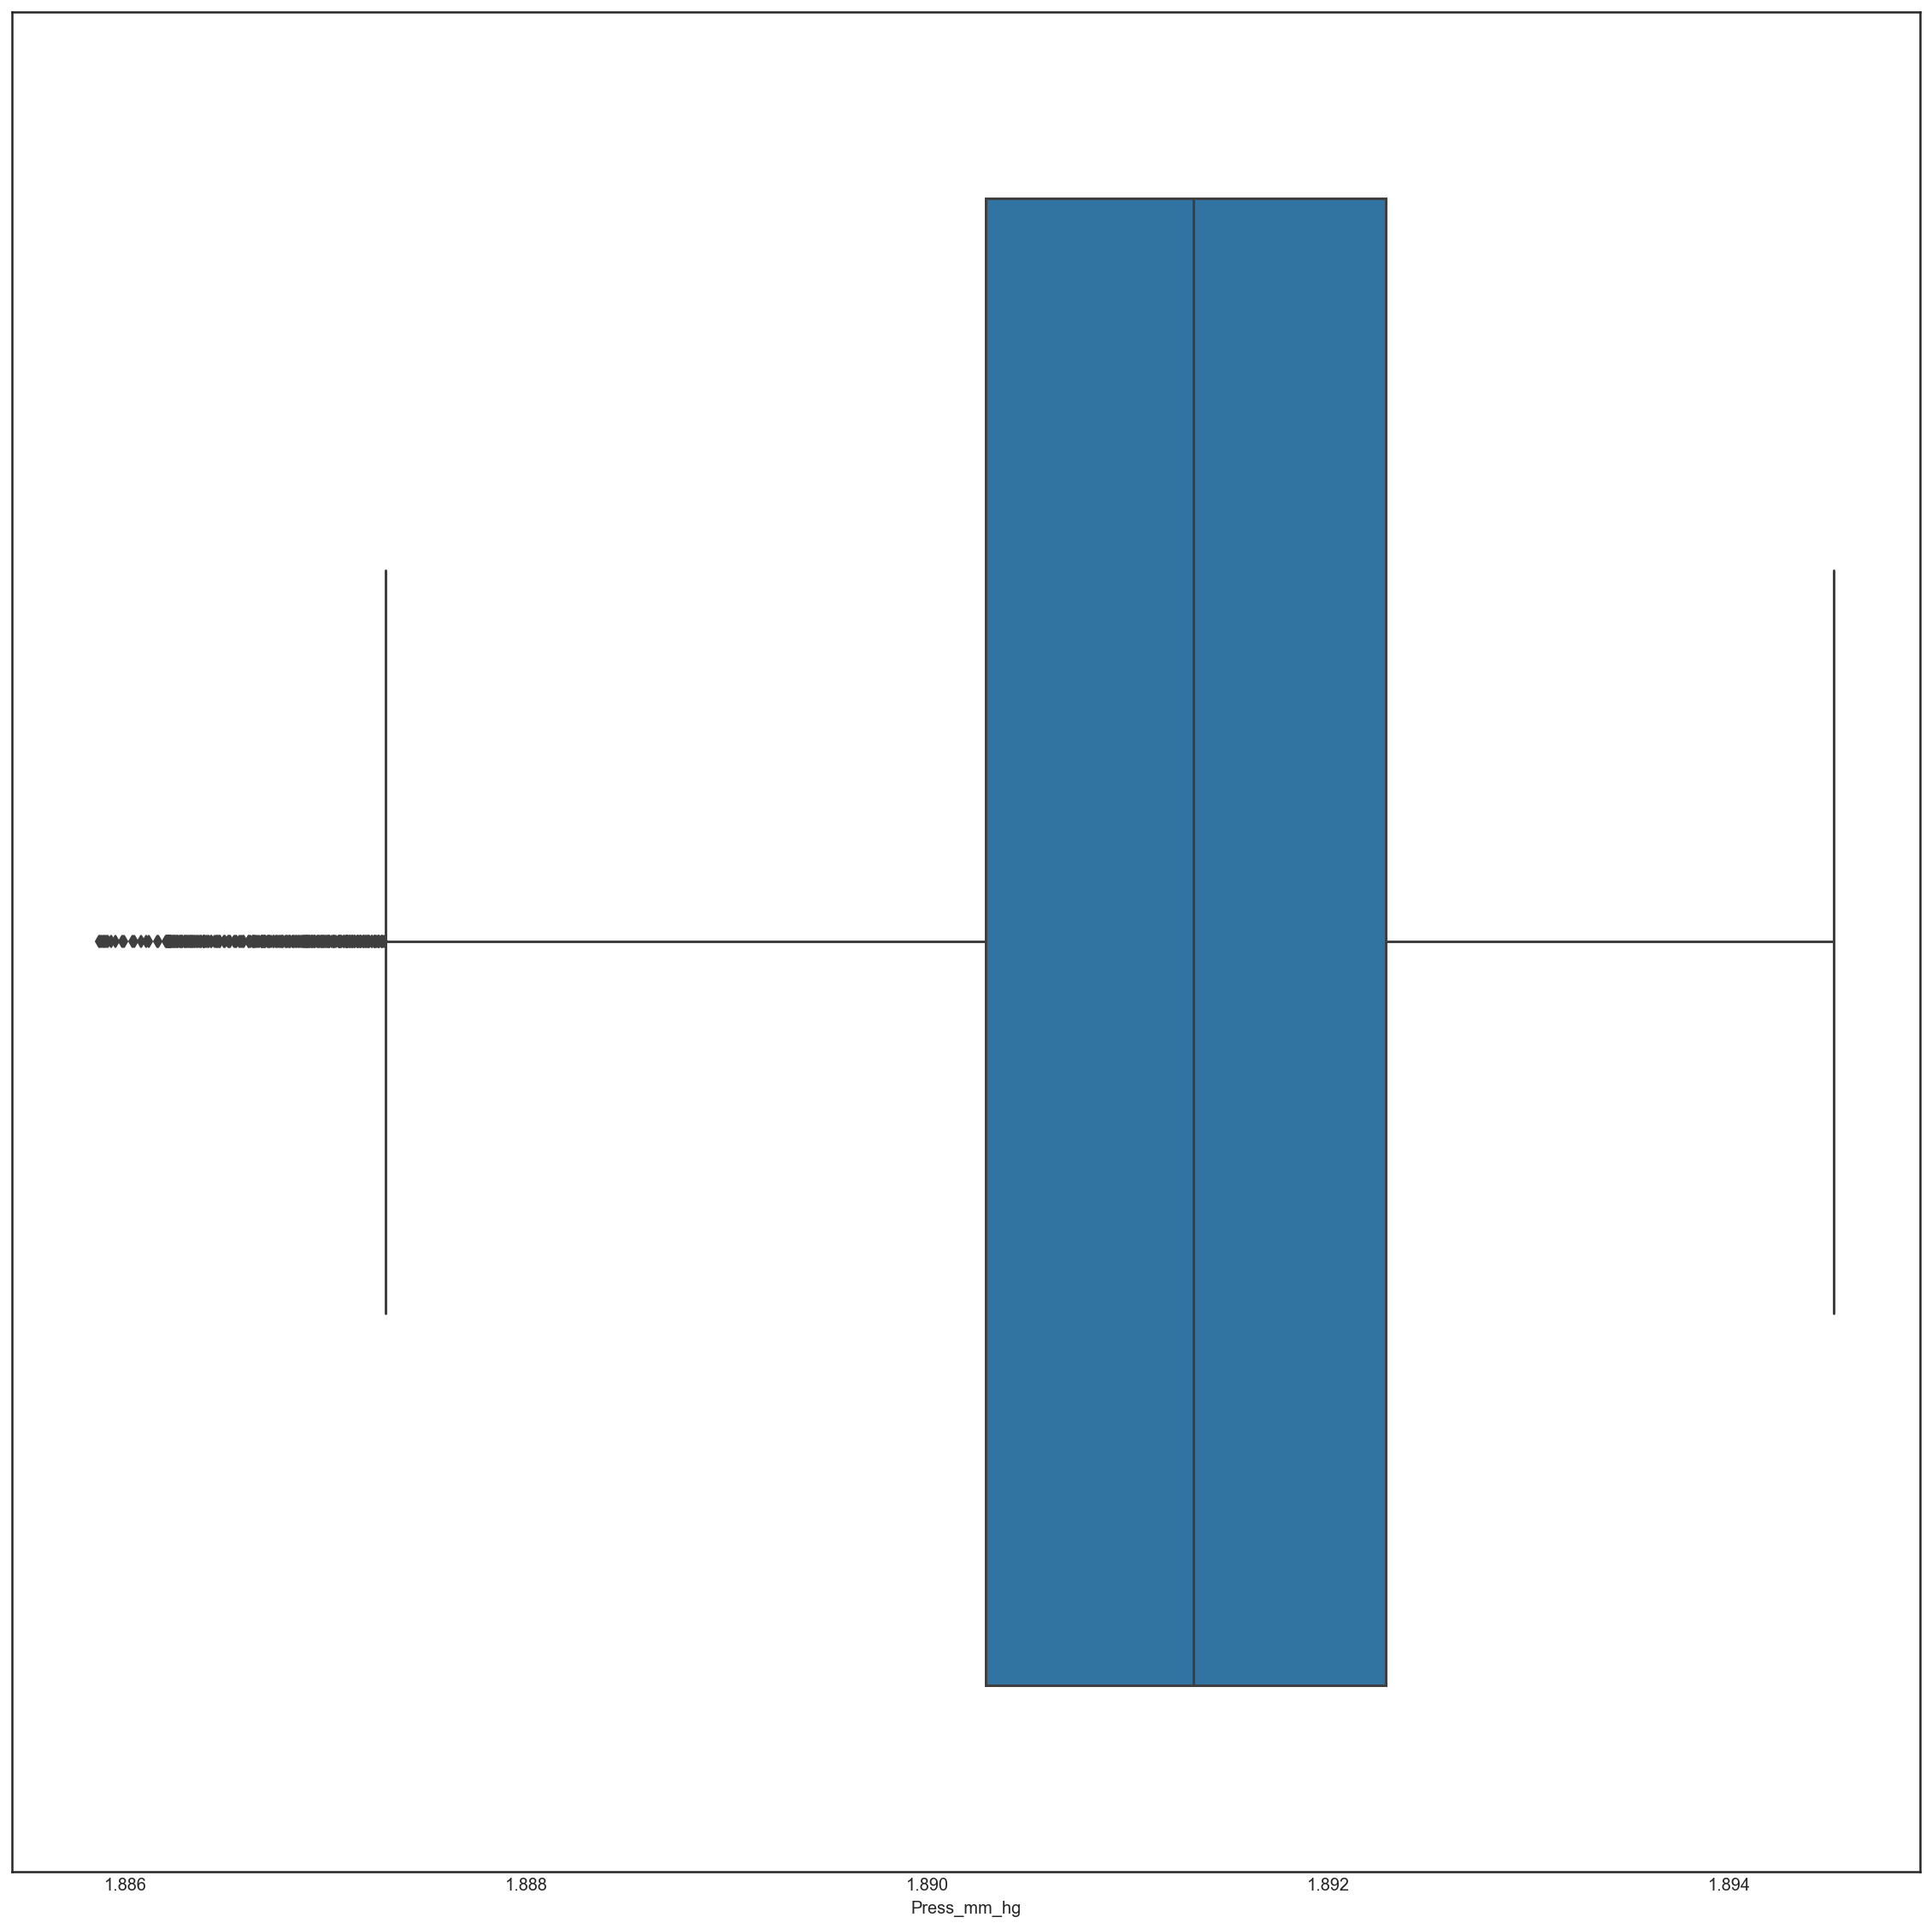

In [43]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax19 = sns.boxplot(x="Press_mm_hg", data=phase)

### Windspeed

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


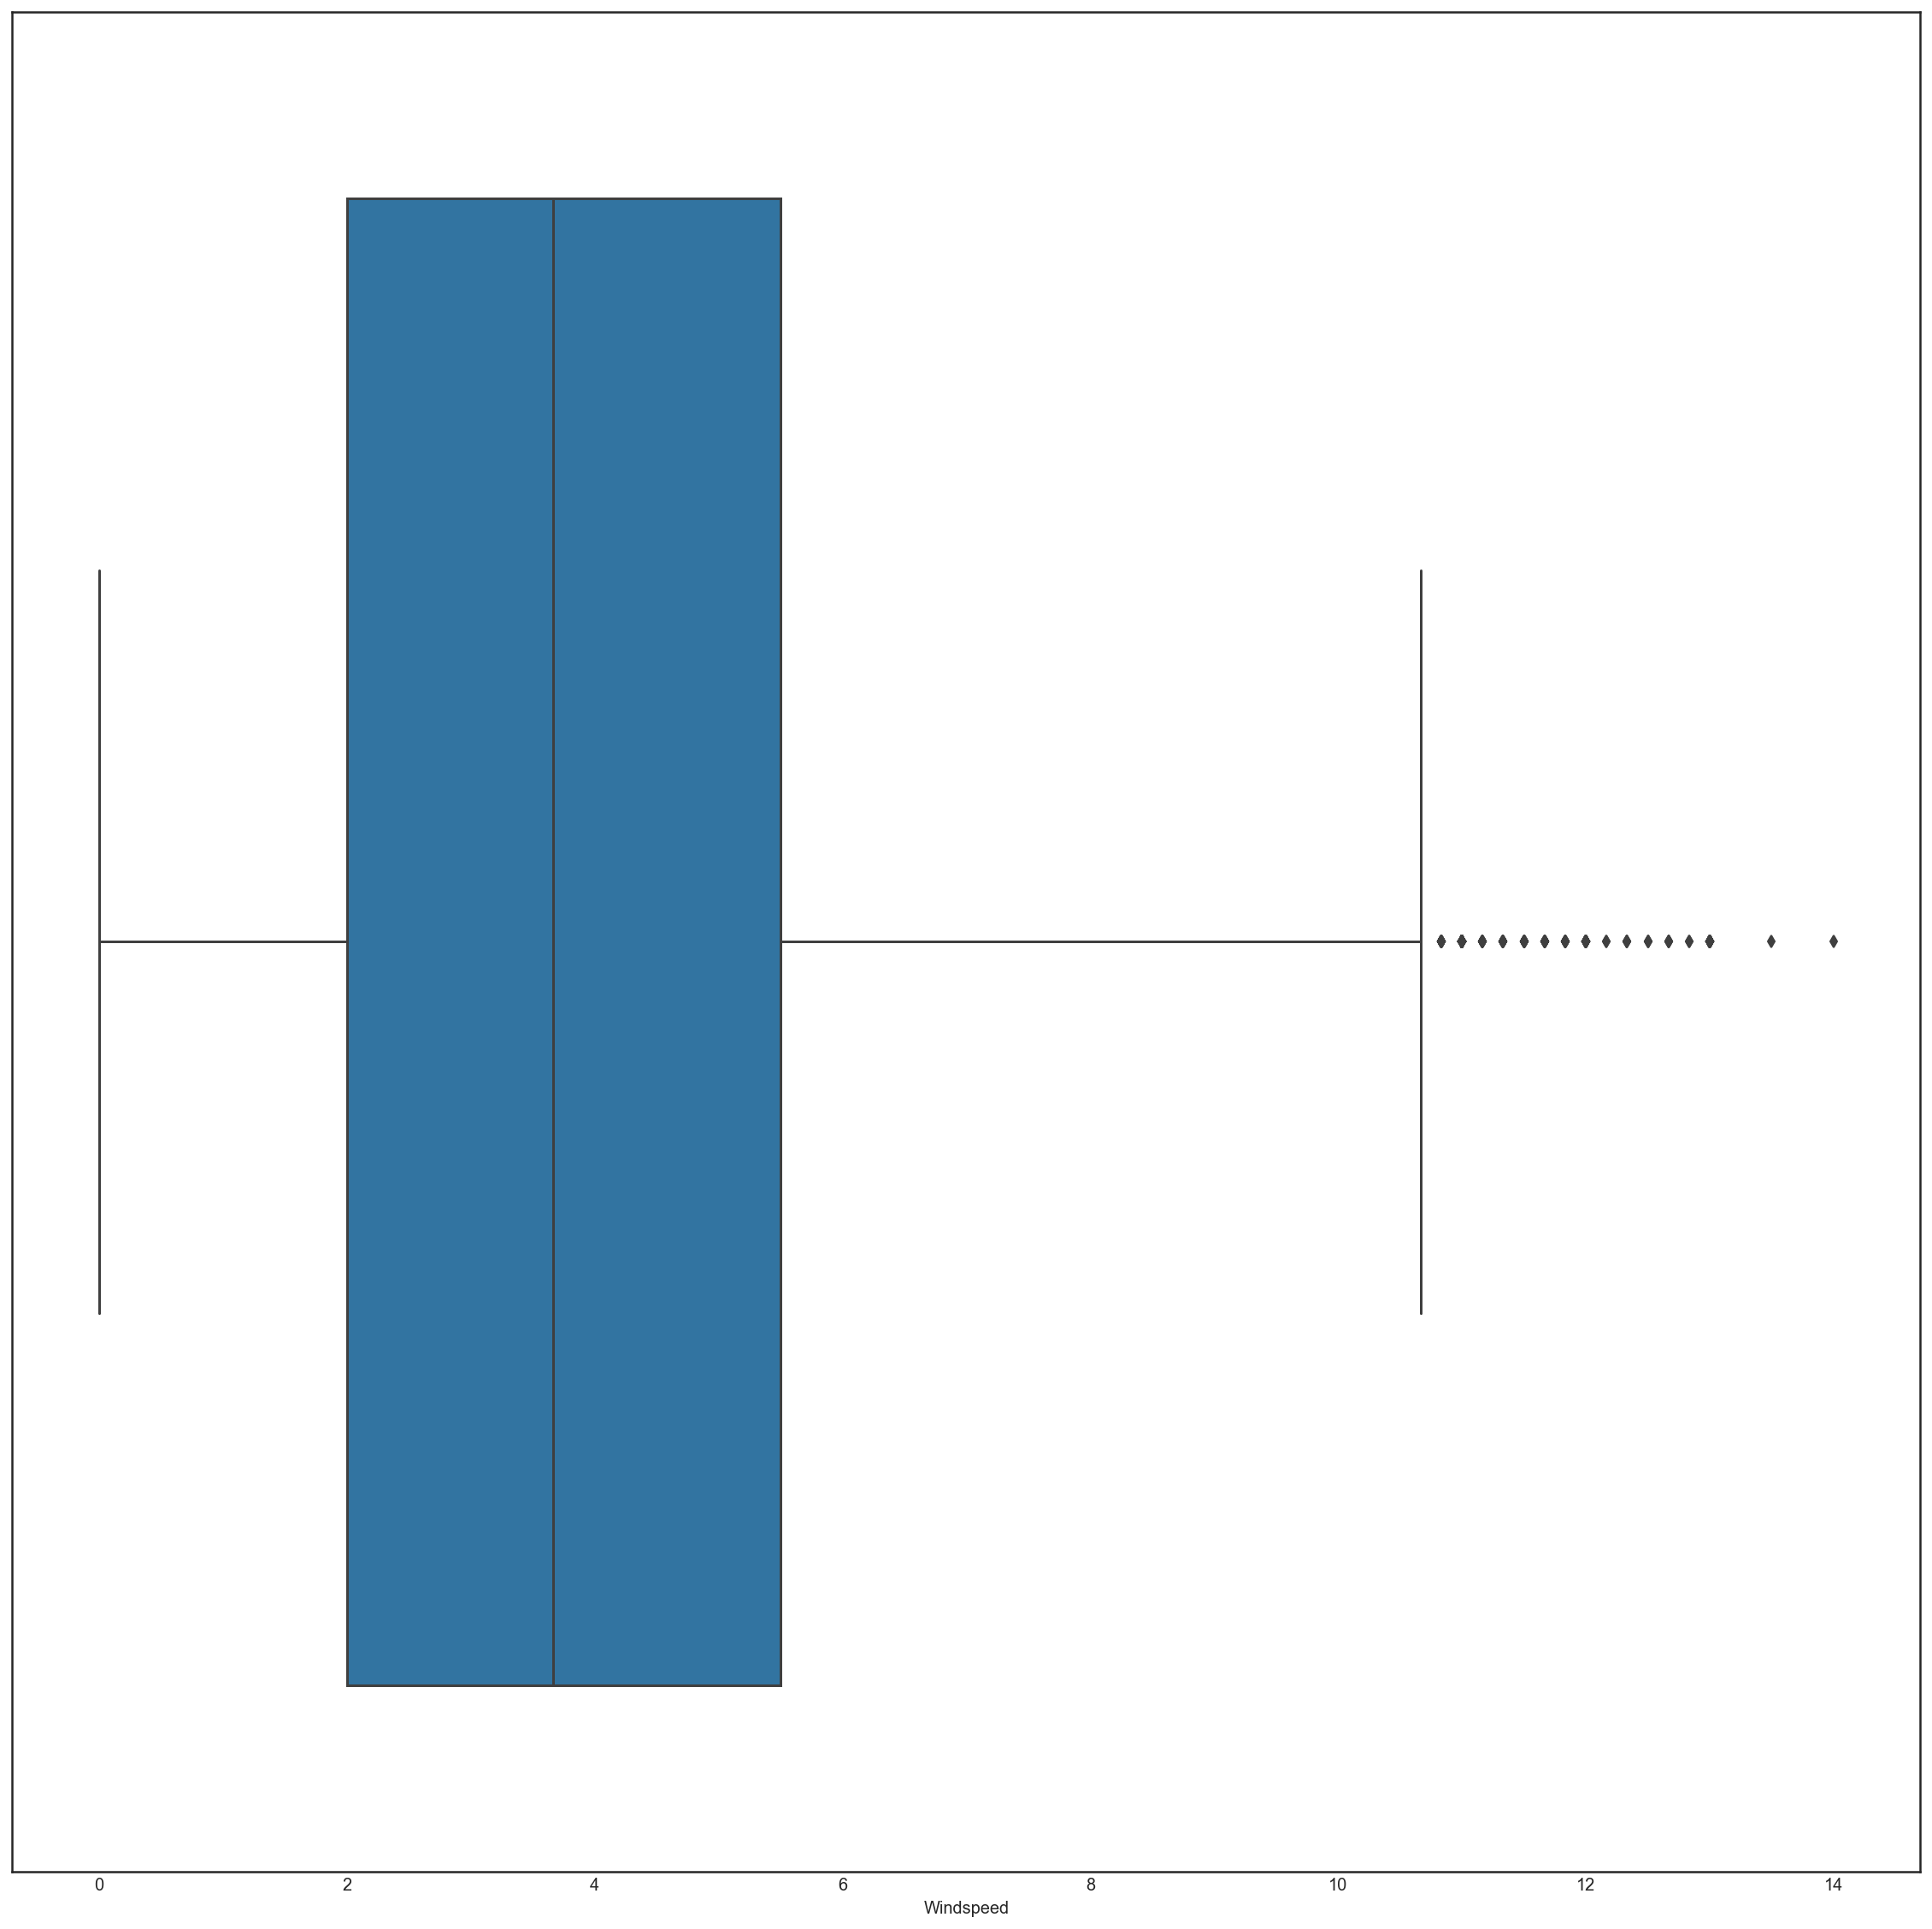

In [44]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax20 = sns.boxplot(x="Windspeed", data=phase)

### Visibility

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


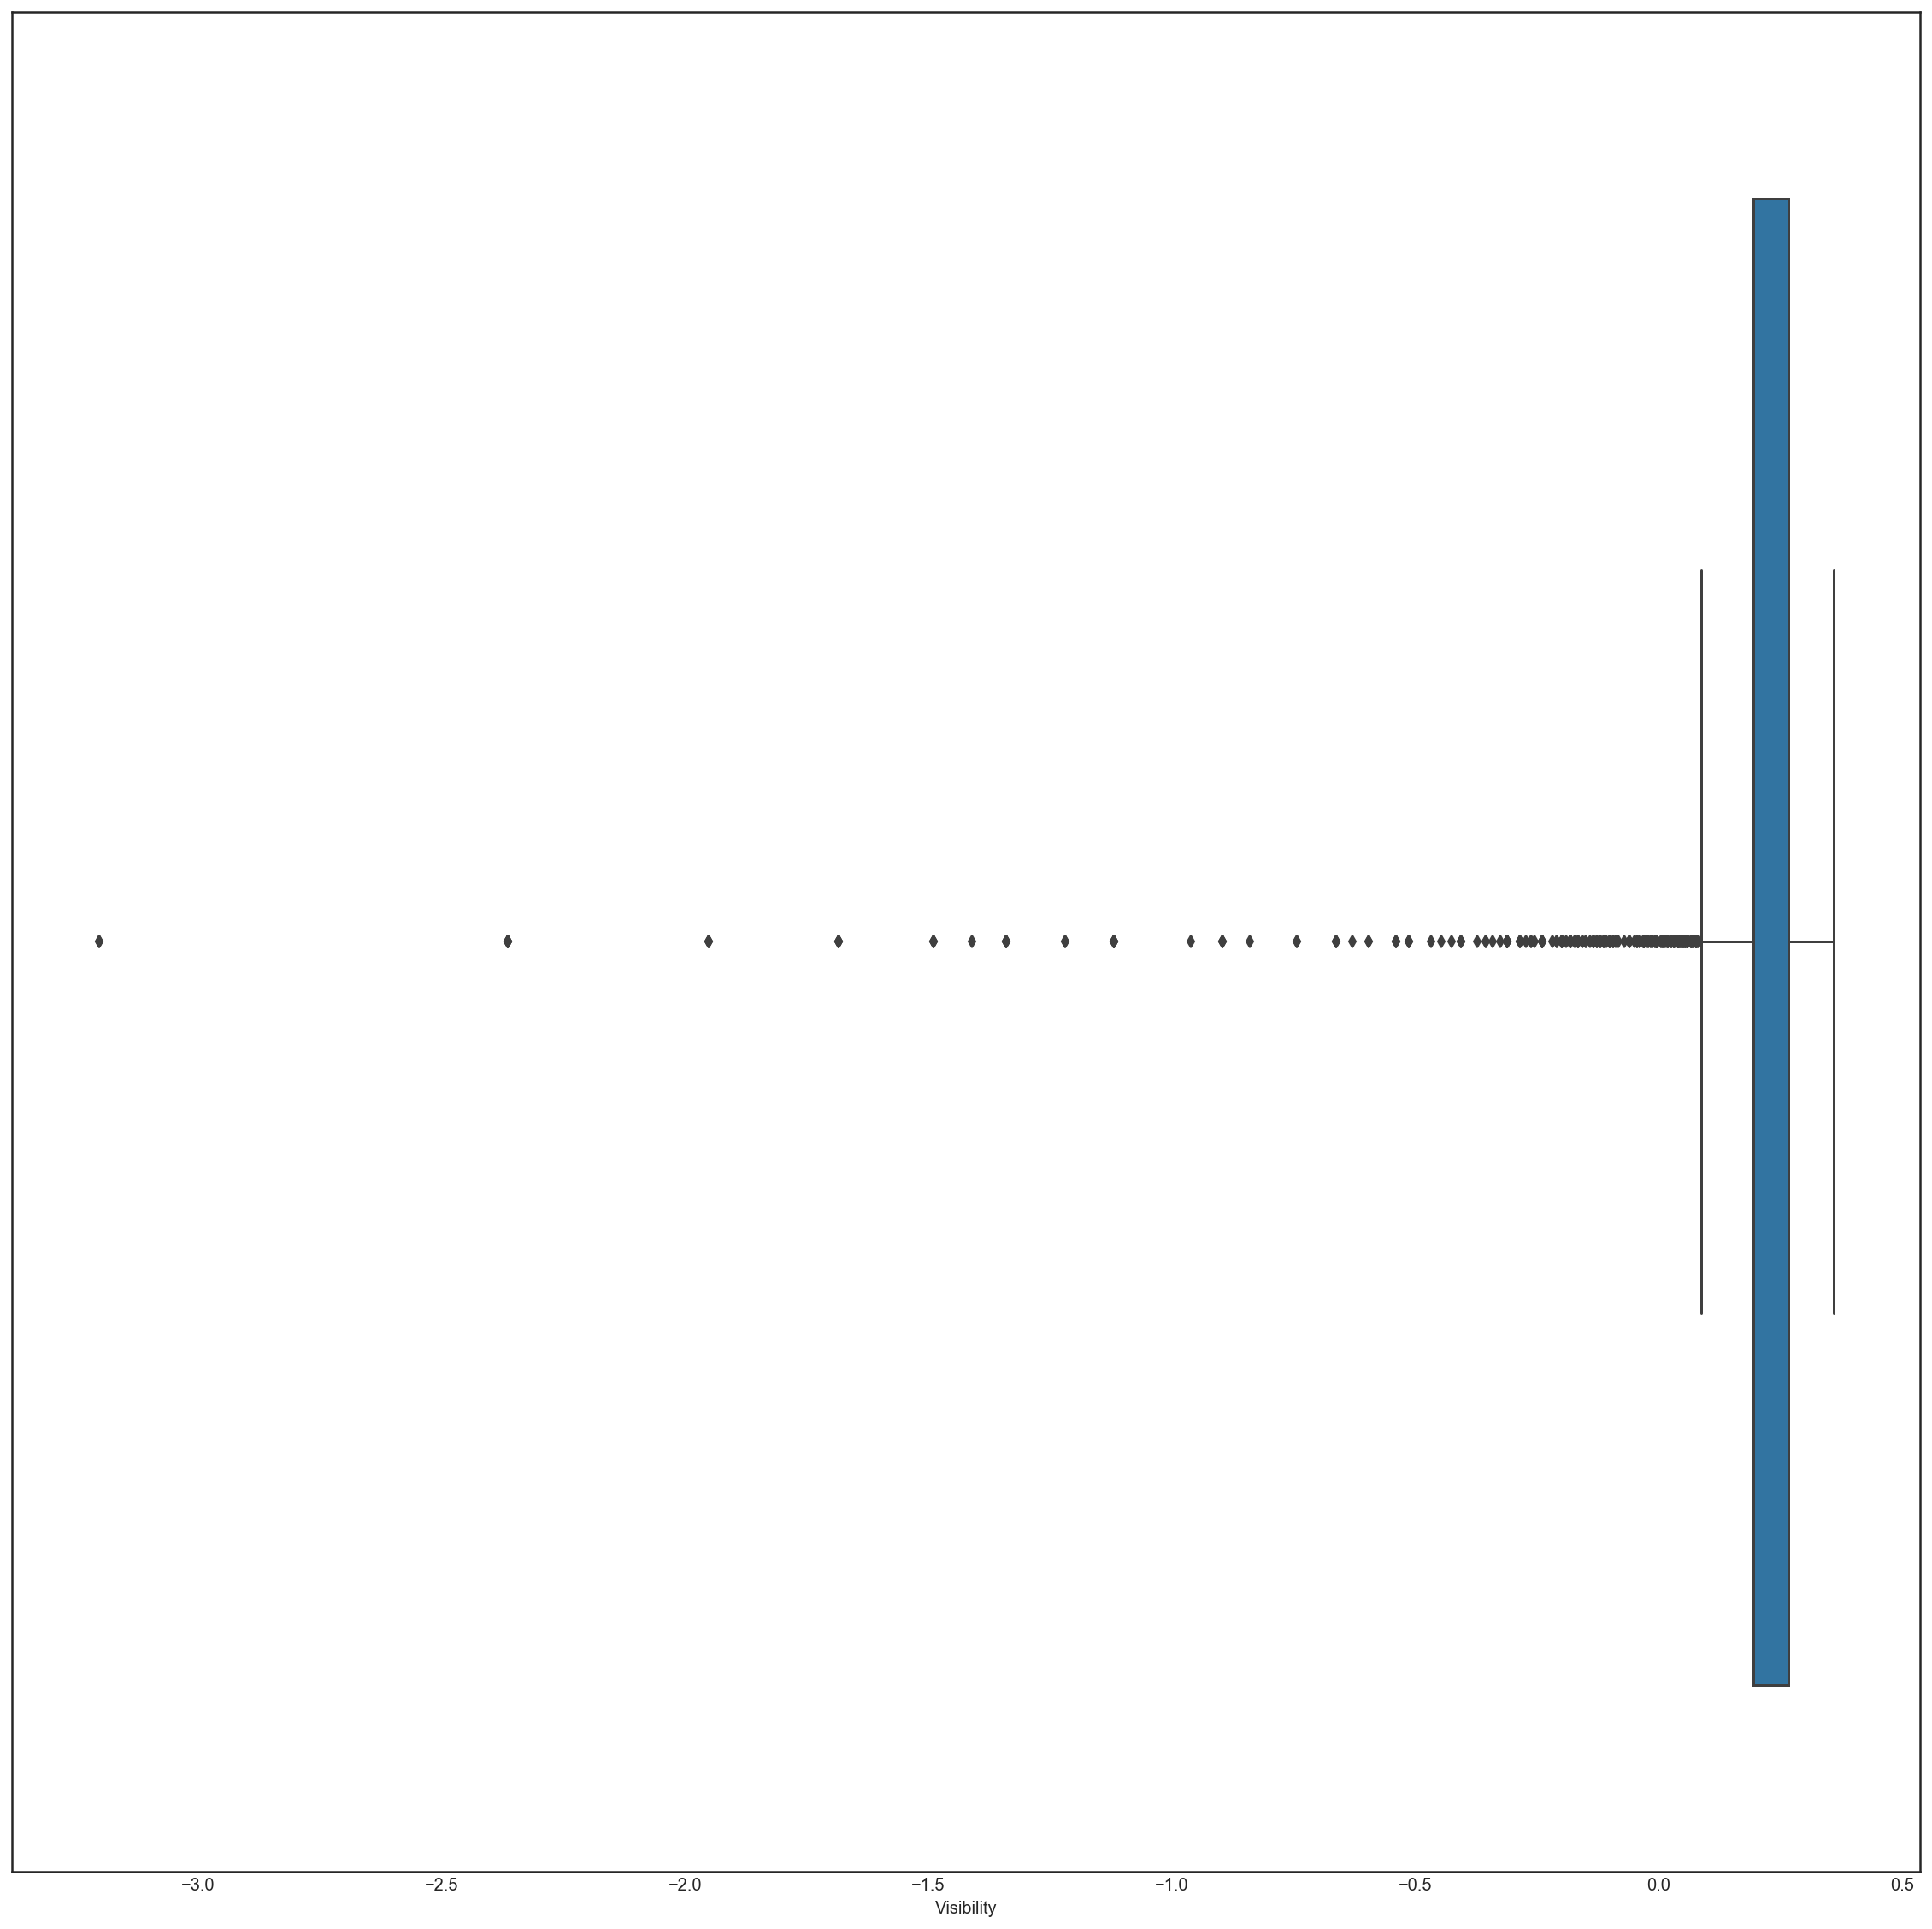

In [45]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax21 = sns.boxplot(x="Visibility", data=phase)

### Tdewpoint

/Users/rishabhjain/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


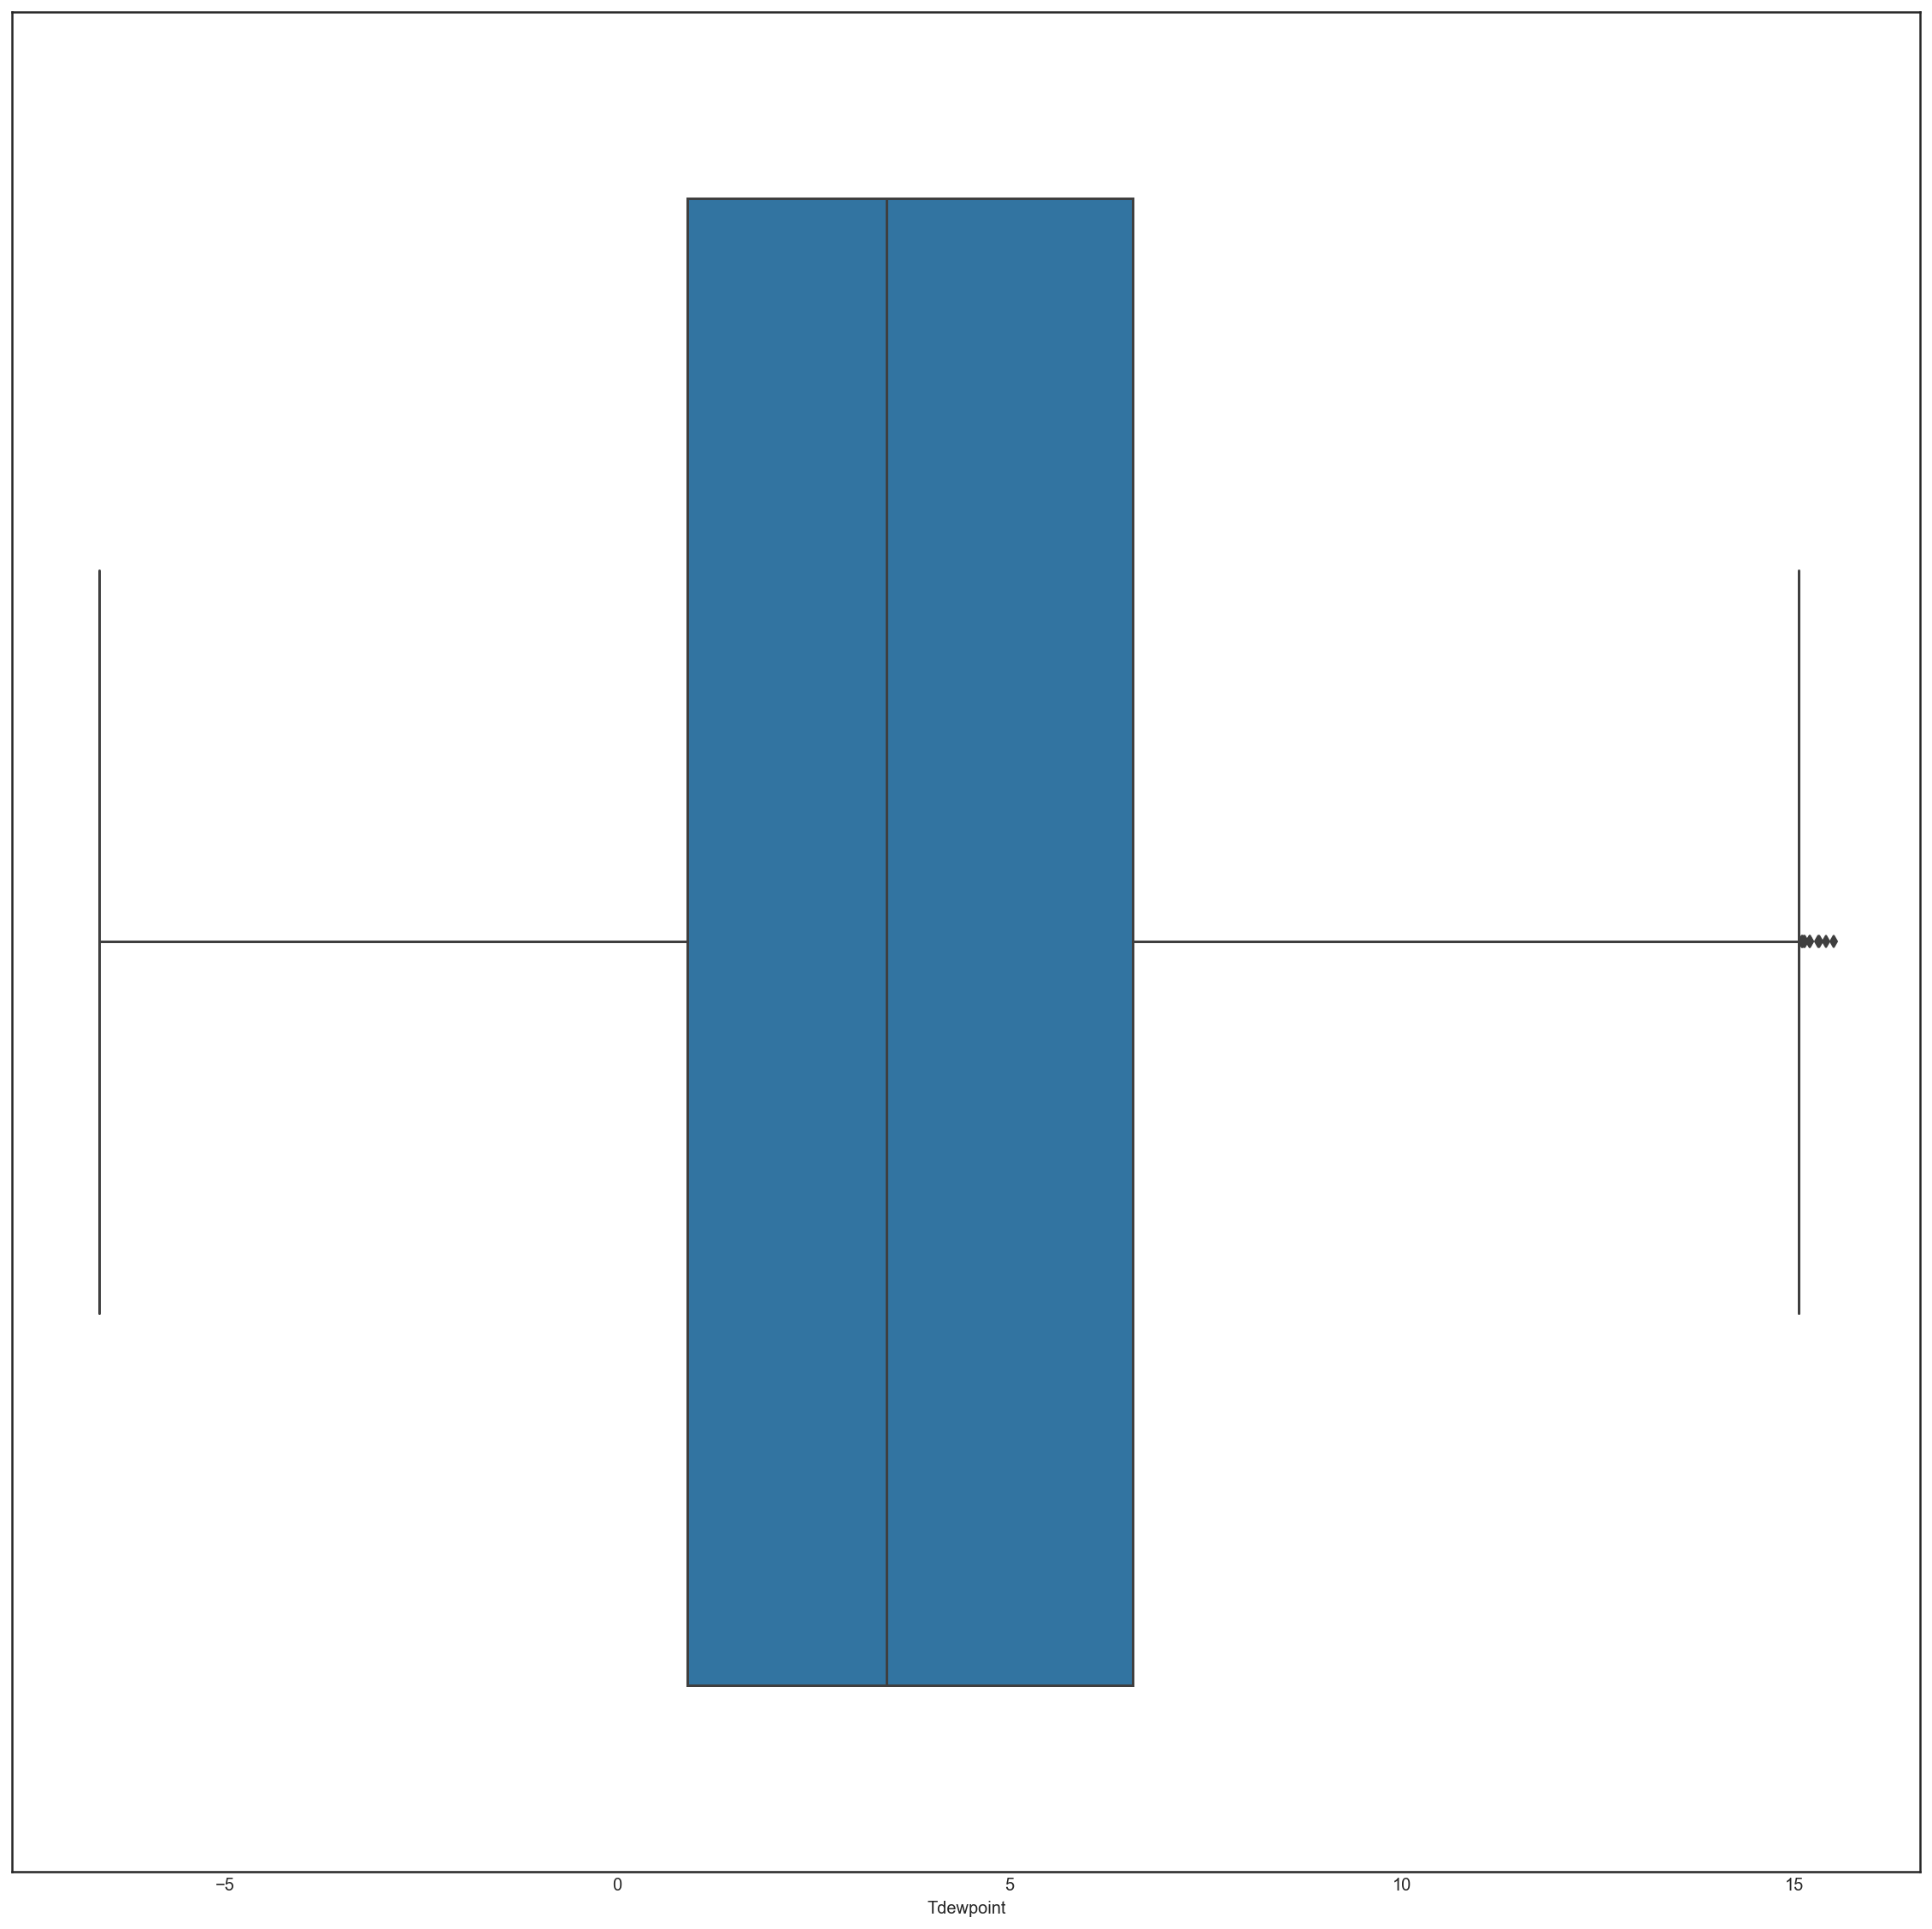

In [46]:
fig = plt.figure(1, figsize=(20, 20))
sns.set_style('white')
ax22 = sns.boxplot(x="Tdewpoint", data=phase)